In [27]:
# %load notebook_setup.py
#Use %load notebook_setup.py to load these commands at the top of your
#ipython notebook.  Includes running the std_libraries.py file. 

%load_ext autoreload
%autoreload 2
%run std_libraries.py

# %matplotlib 
# plt.ioff()
#%matplotlib inline
%matplotlib notebook

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
what computer are you on? a = Ben's laptop, b = gpucluster, c = Ben's desktop, d = othera
base directory is C:\Users\BMH_work\github\expression_broad_data
Importing expression plots and io_library and setting base_dir and data_processing_dir
are you online? Yes/No Yes


# Phylogeny of expression for regev data and GOIs


In [309]:
# # Needed to add these other species to the pre-made .csvs
# spec_list = ['Calb', 'Ylip', 'Sjap', 'Spom']
# io_library.make_data_tables(spec_list)

In [63]:
# #Only have to do this once - afterwards can load data from csv

# platform_prefixes = {'Klac': '10499', 'Scer': '9294',
#         'Cgla':'10497', 'Ncas' : '10501', 
#         'Sbay' : '10505', 'Smik': '10502', 
#         'Lwal': '10500', 'Spar': '10496', 
#         'Lklu': '10503', 'Dhan': '15298', 
#         'Vpol': '15297', 'Calb': '10498', 
#         'Ylip': '10495', 'Sjap': '15299',
#         'Spom': '15300' }

# spec_list = ['Scer', 'Klac',  'Cgla', 'Ncas', 'Sbay', 'Suva', 'Smik', 'Lwal', 'Spar', 'Lklu', 'Dhan', 'Vpol', 'Calb',  'Sjap', 'Spom']
# for spec in spec_list: #platform_prefixes.keys(): 
#     io_library.combine_growth_stress_datasets(spec)

C:\Users\BMH_work\github\expression_broad_data\expression_data\regev_data\GSE36253_Growth\Scer_growth.csv growth microarray dataset loaded
C:\Users\BMH_work\github\expression_broad_data\expression_data\regev_data\GSE38478_Stress\Scer_stress.csv stress microarray dataset loaded
Scer has some duplicate spots
combined dataset saved as C:\Users\BMH_work\github\expression_broad_data\expression_data\regev_data\Scer_growth_stress.csv


In [ ]:
#Only have to do this once - writes YGOB lookup table
#io_library.write_YGOB_orth_lookup_table('Scer', 'Vpol', 'ortholog_files_YGOB/YGOB_Pillars_bmh.txt')

In [6]:
#Order that we view the species (minus S.Cer)
spec_order_post_WGH = ['Spar','Smik', 'Sbay','Suva','Cgla', 'Ncas','Vpol']
spec_order_pre_WGH = ['Klac','Lwal','Lklu', 'Calb', 'Ylip','Sjap','Spom']  #removed Dhan from analysis - no way to map orthologs.  Possible that micrarray labels are wrong - can't find them in ncbi


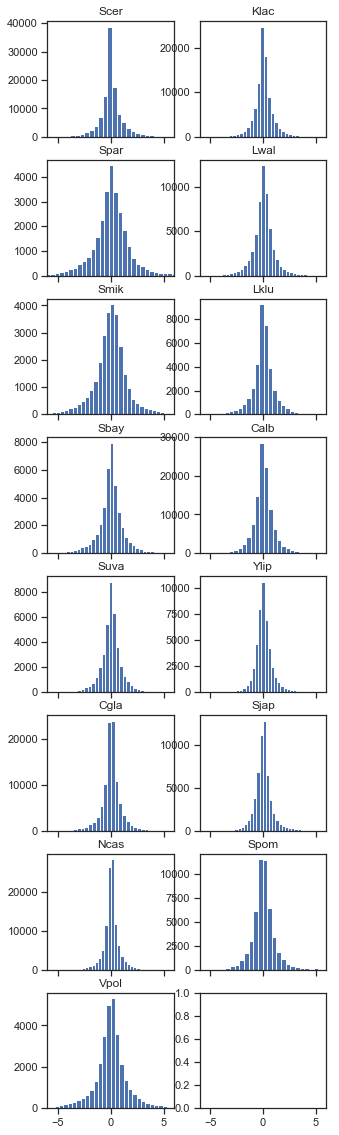

In [7]:
#Look at histogram of all regev data - do I need to do some kind of normalization? 

#Only need to do this once - output is saved as .csv

fig, axarr = plt.subplots(8,2, sharex = True, figsize = (5,20))

spec_sets = {'Post WGH' : ['Scer'] + spec_order_post_WGH, 
             'Pre WGH' : spec_order_pre_WGH} 

jj = 0
mean_std = {}
for spec_set_name, spec_set in spec_sets.items(): 
    for kk, spec in enumerate(spec_set): 
        ax = axarr[kk,jj]
        fname_array_data = os.path.normpath(data_processing_dir + 'regev_data/' + spec + '_growth_stress.csv')  
        spec_data = pd.read_csv(fname_array_data, index_col=0)
        conditions = spec_data.columns
        all_data_spec = []
        for condition in conditions: 
            all_data_spec = all_data_spec + list(spec_data[condition].dropna())
        ax.hist(all_data_spec, bins=50)
        ax.set_title(spec)
        ax.set_xlim([-6,6])
        mean_std[spec] = {'mean': np.mean(all_data_spec), 'std': np.std(all_data_spec)}
        spec_data_norm = (spec_data - mean_std[spec]['mean'])/(mean_std[spec]['std'])
        #  could use this to change name systematically but didn't end up needing to 
        # Changed the ortholog file instead. 
#         if spec=='Lwal':
#             spec_data_norm['orf_name_corrected'] = ['Kwal_' + Lwal_genename.split('Kwal')[1] for Lwal_genename in spec_data_norm.index]
#             spec_data_norm.reset_index(inplace=True)
#             spec_data_norm.drop(columns='orf_name', inplace=True)
#             spec_data_norm.rename(columns={'orf_name_corrected':'orf_name'}, inplace=True)
#             spec_data_norm.set_index('orf_name', inplace=True)
        fname_array_data_norm = os.path.normpath(data_processing_dir + 'regev_data/' + spec + '_growth_stress_norm.csv')
        spec_data_norm.to_csv(fname_array_data_norm)
        
    jj = jj+1
    



In [71]:
##Changing Lwal data_norm indexes back
# spec = 'Lwal'
# fname_array_data_norm = os.path.normpath(data_processing_dir + 'regev_data/' + spec + '_growth_stress_norm.csv')  
# spec_data_norm = pd.read_csv(fname_array_data_norm, index_col=0)
# #spec_data_norm['orf_name_corrected'] = ['Kwal_' + Lwal_genename.split('Kwal')[1] for Lwal_genename in spec_data_norm.index]
# spec_data_norm['orf_name_corrected'] = ['Kwal' + Lwal_genename.split('Kwal_')[1] for Lwal_genename in spec_data_norm.index]
# spec_data_norm.reset_index(inplace=True)
# spec_data_norm.drop(columns='orf_name', inplace=True)
# spec_data_norm.rename(columns={'orf_name_corrected':'orf_name'}, inplace=True)
# spec_data_norm.set_index('orf_name', inplace=True)

# spec_data_norm.to_csv(fname_array_data_norm)


### Map regev data onto a given set of gois

In [8]:
#Load GOI ohnolog data

fname = data_processing_dir + os.sep + os.path.normpath('kl_sc_PKA_as_m24_r1g1_20181017/gois_20181205.pkl')

with open(fname, 'rb') as file:
    [ohnologs_goi,ohnologs_expression_sorted,goi_criteria] = pickle.load(file)

ohnologs_goi.set_index('Ancestor', inplace=True)
ohnologs_expression_sorted.set_index('Ancestor', inplace=True)
ohnologs_goi.rename(columns={'sc_genename_' + level: 'genename_'+level for level in ['low','high']},inplace=True)


In [11]:
#Load regev data using goi list .

seed_spec = 'Scer'
sort_column = 'log2FoldChange'

#Order that we view the species (minus S.Cer)
spec_order_post_WGH = ['Spar','Smik', 'Sbay','Suva','Cgla', 'Ncas','Vpol']
spec_order_pre_WGH = ['Klac','Lwal','Lklu','Calb', 'Ylip','Sjap','Spom']

ohnologs_goi_array, spec_conditions = io_library.load_regev_data_gois(ohnologs_goi, sort_column, seed_spec, spec_order_post_WGH, spec_order_pre_WGH)

#Add SC_common_name_high, low and high_low columns to an ohnologs_file
#SC_common_name lookup function requires genename_low/high columns
orth_dir = data_processing_dir + 'orthologs_regev' + os.sep
for level in ['low', 'high']: 
    ohnologs_goi_array['genename_' + level] = ohnologs_goi_array[seed_spec + '_genename_' + level]
ohnologs_goi_array = io_library.SC_common_name_columns_ohnologs(ohnologs_goi_array, seed_spec, orth_dir)


Mismatch between goi index and expression data index Scer : YDR524C-B DS/LOG
Mismatch between goi index and expression data index Scer : YDR524C-B LAG/LOG
Mismatch between goi index and expression data index Scer : YDR524C-B LL/LOG
Mismatch between goi index and expression data index Scer : YDR524C-B PLAT/LOG
Mismatch between goi index and expression data index Scer : YDR524C-B PS/LOG
Mismatch between goi index and expression data index Scer : YDR524C-B NaCl_005
Mismatch between goi index and expression data index Scer : YDR524C-B NaCl_015
Mismatch between goi index and expression data index Scer : YDR524C-B NaCl_030
Mismatch between goi index and expression data index Scer : YDR524C-B NaCl_060
Mismatch between goi index and expression data index Scer : YDR524C-B heat shock_005
Mismatch between goi index and expression data index Scer : YDR524C-B heat shock_015
Mismatch between goi index and expression data index Scer : YDR524C-B heat shock_030
Mismatch between goi index and expression

YBR056W-A not present in orthogroup file for Suva
YHR174W has NONE listed in ortholog file for Suva
YCR075W-A has NONE listed in ortholog file for Suva
YIL113W has NONE listed in ortholog file for Suva
YDR034W-B has NONE listed in ortholog file for Suva
YGR243W has NONE listed in ortholog file for Suva
YDR342C has NONE listed in ortholog file for Suva
YOR186W has NONE listed in ortholog file for Suva
YPL240C has NONE listed in ortholog file for Suva
YIR016W has NONE listed in ortholog file for Suva
YDR524C-B has NONE listed in ortholog file for Cgla
Mismatch between ortholog file and expression data index Cgla : CAGL0C01325g DS/LOG
Mismatch between ortholog file and expression data index Cgla : CAGL0C01325g ELL/LOG
Mismatch between ortholog file and expression data index Cgla : CAGL0C01325g LAG/LOG
Mismatch between ortholog file and expression data index Cgla : CAGL0C01325g LL/LOG
Mismatch between ortholog file and expression data index Cgla : CAGL0C01325g PLAT/LOG
Mismatch between ort

YDR524C-B not present in orthogroup file for Ncas
YNL052W not present in orthogroup file for Ncas
YBR056W-A not present in orthogroup file for Ncas
YGR131W not present in orthogroup file for Ncas
YLR043C not present in orthogroup file for Ncas
YHR108W not present in orthogroup file for Ncas
YLR293C not present in orthogroup file for Ncas
YLR297W not present in orthogroup file for Ncas
YOR375C not present in orthogroup file for Ncas
YFL048C not present in orthogroup file for Ncas
YCL048W-A not present in orthogroup file for Ncas
YNR001C not present in orthogroup file for Ncas
YNL093W not present in orthogroup file for Ncas
YNL055C not present in orthogroup file for Ncas
YIL113W not present in orthogroup file for Ncas
YLR031W not present in orthogroup file for Ncas
YKL091C not present in orthogroup file for Ncas
YDL021W not present in orthogroup file for Ncas
YDR034W-B not present in orthogroup file for Ncas
YLR346C not present in orthogroup file for Ncas
YGR256W not present in orthogrou

YDR524C-B has NONE listed in ortholog file for Lwal
YIL114C has NONE listed in ortholog file for Lwal
YNL052W has NONE listed in ortholog file for Lwal
either YBR056W-A or YDR034W-Bis not in index for ortholog table in Lwal
YDR034W-B is in index for lookup table
YDR034W-B did have an ortholog in Lwal
YDR034W-B has NONE listed in ortholog file for Lwal
YGR035C has NONE listed in ortholog file for Lwal
YHR163W has NONE listed in ortholog file for Lwal
YGR169C-A has NONE listed in ortholog file for Lwal
YLR297W has NONE listed in ortholog file for Lwal
YMR182C has NONE listed in ortholog file for Lwal
YCR075W-A has NONE listed in ortholog file for Lwal
YER120W has NONE listed in ortholog file for Lwal
YPL130W has NONE listed in ortholog file for Lwal
YDR524C-B has NONE listed in ortholog file for Lklu
YJL110C has NONE listed in ortholog file for Lklu
either YBR056W-A or YDR034W-Bis not in index for ortholog table in Lklu
YDR034W-B is in index for lookup table
YDR034W-B did have an ortholo

In [6]:
spec_conditions

{'Scer': Index(['DS/LOG', 'LAG/LOG', 'LL/LOG', 'PLAT/LOG', 'PS/LOG', 'NaCl_005',
        'NaCl_015', 'NaCl_030', 'NaCl_060', 'heat shock_005', 'heat shock_015',
        'heat shock_030', 'heat shock_045', 'heat shock_060',
        'hydrogen peroxide_005', 'hydrogen peroxide_015',
        'hydrogen peroxide_030', 'hydrogen peroxide_060'],
       dtype='object'),
 'Spar': Index(['DS/LOG', 'LAG/LOG', 'LPS/LOG', 'PLAT/LOG', 'PS/LOG'], dtype='object'),
 'Smik': Index(['DS/LOG', 'LAG/LOG', 'LL/LOG', 'PLAT/LOG', 'PS/LOG'], dtype='object'),
 'Sbay': Index(['DS/LOG', 'ELL/LOG', 'LAG/LOG', 'LL/LOG', 'LPS/LOG', 'PLAT/LOG',
        'PS/LOG'],
       dtype='object'),
 'Suva': Index(['DS/LOG', 'EPS/LOG', 'LAG/LOG', 'LL/LOG', 'LPS/LOG', 'PLAT/LOG',
        'PS/LOG'],
       dtype='object'),
 'Cgla': Index(['DS/LOG', 'ELL/LOG', 'LAG/LOG', 'LL/LOG', 'PLAT/LOG', 'PS/LOG',
        'NaCl_005', 'NaCl_015', 'NaCl_030', 'NaCl_060', 'heat shock_005',
        'heat shock_015', 'heat shock_030', 'heat shock_045

In [7]:
list(ohnologs_goi_array['SC_common_name_high'])

['YCL048W-A',
 'ALP1',
 'TPK1',
 'PIR3',
 'DAL80',
 'PRY1',
 'YSC84',
 'CMK1',
 'HEF3',
 'CIT1',
 'CYC7',
 'PRM6',
 'ADY3',
 'YPT53',
 'POR1',
 'SDP1',
 'COX5B',
 'NDE2',
 'YLR031W',
 'ADE16',
 'PGM2',
 'YKL091C',
 'STB2',
 'RTC2',
 'GPD1',
 'GPM2',
 'YDR018C',
 'YDR034W-B',
 'PST1',
 'UBC5',
 'TKL2',
 'NCE102',
 'VPS62',
 'PHM8',
 'HVG1',
 'SAP4',
 'VMR1',
 'PEX30',
 'YLR346C',
 'NQM1',
 'ATG33',
 'YKL187C',
 'GND2',
 'ENO1',
 'SOL4',
 'FMP43',
 'PEX18',
 'TRX2',
 'YJR005C-A',
 'YJL045W',
 'YHR080C',
 'HXT7',
 'HXT5',
 'YHR097C',
 'GGA1',
 'BAG7',
 'VHS3',
 'YOR062C',
 'GSP2',
 'YOR186W',
 'SDS24',
 'TOS8',
 'USV1',
 'HSP82',
 'YNR034W-A',
 'GDH3',
 'PYK2',
 'FUN19',
 'FRT2',
 'PSK1',
 'YIR016W',
 'RNR3',
 'SNF3',
 'SHC1',
 'UBP9',
 'AVT6',
 'SCS22',
 'YPR172W',
 'EMP46',
 'YFL042C',
 'AFR1',
 'CRF1',
 'RTN2',
 'VHS1',
 'SSE2',
 'YOR214C',
 'ODC1',
 'HER1',
 'HES1',
 'URA10',
 'NGL3']

Text(0.5,0.98,'PGM1 PGM2')

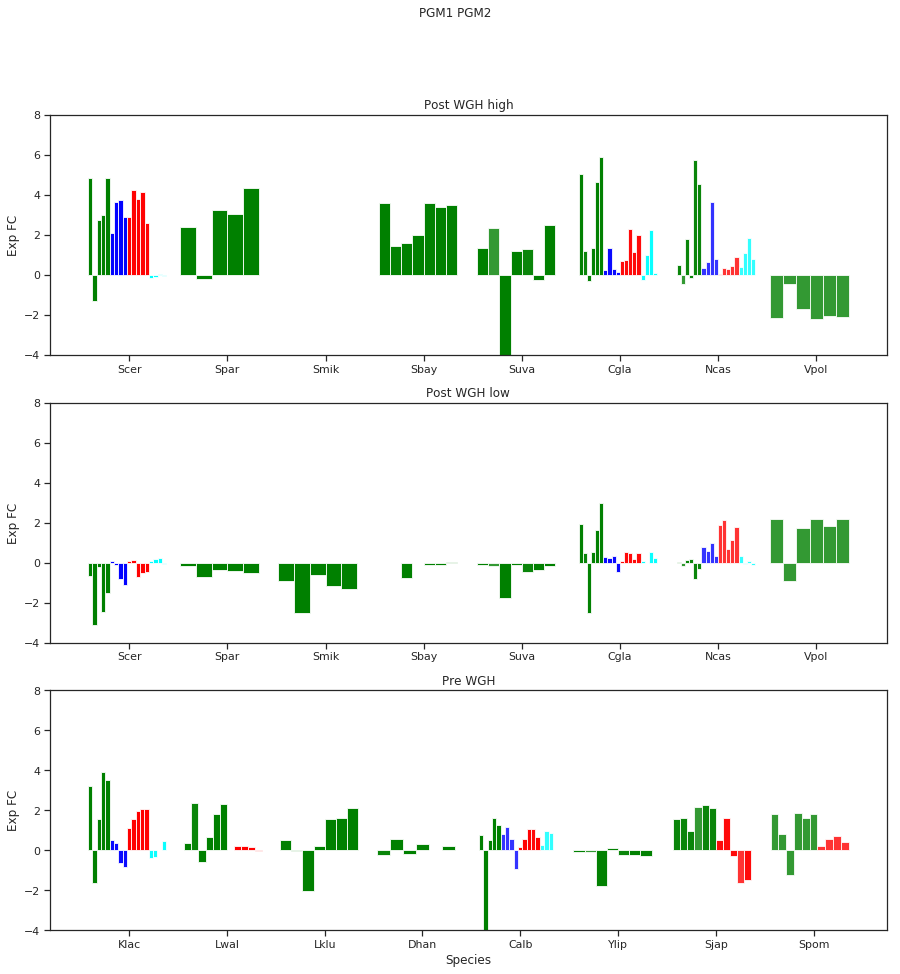

In [133]:
#For a given high_gene, plot expression across all conditions for all its orthologs

#Plot it in three subplots - high, low, pre_wgh

high_gene = 'PGM2'
row = ohnologs_goi_array[ohnologs_goi_array['SC_common_name_high']==high_gene]

fig, axarr = plt.subplots(3,1, figsize = (15,15))
spec_frac = 0.8  #fraction of distance between 1 and the next number a species takes up
opacity = 0.8

# spec_order_post_WGH = ['Spar','Sbay','Smik','Suva', 'Cgla', 'Ncas','Vpol']
# spec_order_pre_WGH = ['Klac','Lwal','Lklu','Dhan', 'Calb', 'Ylip','Sjap','Spom']

spec_sets = {'Post WGH low' : ['Scer'] + spec_order_post_WGH, 
             'Post WGH high' : ['Scer'] + spec_order_post_WGH, 
             'Pre WGH' : spec_order_pre_WGH} 


levels = {'Post WGH low': 'low', 
          'Post WGH high': 'high', 
          'Pre WGH' : ''}

for kk, spec_set_name in enumerate(spec_sets.keys()):
    
    ax = axarr[kk]
    level = levels[spec_set_name]
    spec_set = spec_sets[spec_set_name]
    
    if level == '': 
        level_sep = ''
    else: 
        level_sep = '_'

    #Build dicts to store data from all possible conditions that we want to consider

    #all_conds = list(set(list(chain.from_iterable([list(conditions) for spec, conditions in spec_conditions.items()]))))

    #this puts it in a better order
    all_conds = ['LAG/LOG','LL/LOG','ELL/LOG','DS/LOG','EPS/LOG','PS/LOG','LPS/LOG','PLAT/LOG',
     'NaCl_005',
     'NaCl_015',
     'NaCl_030',
     'NaCl_060', 
     'heat shock_005',
     'heat shock_015',
     'heat shock_030',
     'heat shock_045',
     'heat shock_060',
     'hydrogen peroxide_005',
     'hydrogen peroxide_015',
     'hydrogen peroxide_030',
     'hydrogen peroxide_060']

    #Build colordict to separate conditions
    colors = {}
    for condition in all_conds: 
        if ("/" in condition):
            colors[condition] = 'green'
        elif('heat shock' in condition):
            colors[condition] = 'red'
        elif('NaCl' in condition): 
            colors[condition] = 'blue'
        elif('hydrogen peroxide' in condition): 
            colors[condition] = 'cyan'

    index = {condition : [] for condition in all_conds} 
    bar_width = {condition : [] for condition in all_conds}
    data = {condition : [] for condition in all_conds}   


    for spec_ind, spec in enumerate(spec_set): 
        #If S.Cer always only one orth.  
        if spec== 'Scer': 
            N_orth = 1
        else: 
            N_orth = row[spec + '_N' + level_sep + level].iloc[0]

        conditions = spec_conditions[spec]
        N_cond = len(conditions)

        if N_orth==0:
            dw = spec_frac/N_cond
        else: 
            dw = spec_frac/(N_cond*N_orth)

        for condition_ind, condition in enumerate(conditions): 
            #append data for each condition to the set of bars to be plotted

            if N_orth ==0:
                index[condition].append(spec_ind + dw*condition_ind)
                bar_width[condition].append(dw)
                data[condition].append(np.nan)
            else: 
                for jj in range(0,N_orth): 
                    index[condition].append(spec_ind + dw*condition_ind + jj*dw/N_cond)
                    bar_width[condition].append(dw/N_orth)
                    data[condition].append(row[spec + '_' + condition + level_sep + level].values[0][jj])


            rects_pre_WGH = ax.bar(index[condition], np.array(data[condition]), bar_width[condition],
                             alpha=opacity,
                             color=colors[condition],
                             label=condition) 
                             #bottom = bottom)

    if kk==2: 
        ax.set_xlabel('Species')
    ax.set_ylabel('Exp FC')
    ax.set_ylim(-4,8)
    ax.set_title(spec_set_name)
    ax.set_xticks(np.arange(len(spec_set))+spec_frac/2.0)
    ax.set_xticklabels(spec_set)

fig.suptitle(row['SC_common_name_low'].values[0] + ' ' +  row['SC_common_name_high'].values[0])



In [15]:
fig.savefig(os.path.normpath('C:/Users/BMH_work/Google Drive/UCSF/ElSamad_Lab/PKA/Manuscript/MPC23.svg'))

In [12]:
#Go through each of my GOIs and replace lists with single value for each item. 
#This is mainly to combine any values for genes that had a small scale duplication. 

# spec_order_post_WGH = ['Spar','Sbay','Smik','Suva', 'Cgla', 'Ncas','Vpol']
# spec_order_pre_WGH = ['Klac','Lwal','Lklu', 'Calb', 'Ylip','Sjap','Spom']

spec_sets = {'Post WGH low' : ['Scer'] + spec_order_post_WGH, 
             'Post WGH high' : ['Scer'] + spec_order_post_WGH, 
             'Pre WGH' : spec_order_pre_WGH} 

expression_data_df = io_library.regev_ohnolog_expression_data_SSD_combine(ohnologs_goi_array,  spec_sets, spec_conditions, combine_method = 'mean')


In [13]:
# Organize species conditions by a given vector of all possible conditions

spec_order_post_WGH = ['Spar','Sbay','Smik','Suva', 'Cgla', 'Ncas','Vpol']
spec_order_pre_WGH = ['Klac','Lwal','Lklu', 'Calb', 'Ylip','Sjap','Spom']

spec_sets = {'Post WGH low' : ['Scer'] + spec_order_post_WGH, 
             'Post WGH high' : ['Scer'] + spec_order_post_WGH, 
             'Pre WGH' : spec_order_pre_WGH} 


#filter out a row if it has Ndrop or more missing orthologs
inds_to_drop = []
Ndrop = 130
for ind, row in enumerate(expression_data_df.values):
    if sum(np.isnan(row)) >= Ndrop:
        inds_to_drop.append(ind)
        
rows_to_drop = expression_data_df.index[inds_to_drop]
print('Dropped the following Paralog Pairs because there were more than ' + str(Ndrop) + ' orthologs missing.')
print(rows_to_drop)
expression_data_df_row_filter = expression_data_df.drop(index=rows_to_drop)

#Sort dataset by how long high expression for a PKA estimate column (PKAest) is retained in the high paralog in post WGH high gene
#Sort out rows by whether the averaged "PKAest" or PKA estimate columns are above a threshold.  
#Sort by the species farthes from original species first (so top row will be most conserved)

columns_to_combine = {'PS/LOG', 'PLAT/LOG', 'DS/LOG', 'heat shock_30', 'heat shock_45'}

#threshold for induction using the average of the combined columns that make up the PKA inhibition estimate.  
#All data is normalized already
induced_thresh = 2.5

expression_data_df_sorted = io_library.sort_conservaton_by_col_avg(expression_data_df_row_filter, spec_sets['Post WGH high'], columns_to_combine, induced_thresh )

#Sort conditions by defined order
all_conds = ['LAG/LOG','LL/LOG','ELL/LOG','DS/LOG','EPS/LOG','PS/LOG','LPS/LOG','PLAT/LOG',
     'NaCl_005',
     'NaCl_015',
     'NaCl_030',
     'NaCl_060', 
     'heat shock_005',
     'heat shock_015',
     'heat shock_030',
     'heat shock_045',
     'heat shock_060',
     'hydrogen peroxide_005',
     'hydrogen peroxide_015',
     'hydrogen peroxide_030',
     'hydrogen peroxide_060']

new_col_order = io_library.sort_regev_stress_conditions(all_conds, spec_sets, expression_data_df)

#add back in the new column order and drop out the extra columns that were added
expression_data_df_sorted = expression_data_df_sorted.loc[:,new_col_order]


Dropped the following Paralog Pairs because there were more than 130 orthologs missing.
Index(['YCL048W-A_YDR524C-B', 'YDR034W-B_YBR056W-A', 'CIS1_YGR035C',
       'YOR186W_YLR297W', 'EGO4_EGO2'],
      dtype='object')


In [15]:
# #Save expression data
# expression_data_df_sorted.to_csv(os.path.normpath(data_processing_dir + 'regev_data/20190204_expression_data_sorted.csv'))

#Load expression_data_df_sorted 
expression_data_df_sorted = pd.read_csv(os.path.normpath(data_processing_dir + 'regev_data/20190204_expression_data_sorted.csv'),index_col=0)

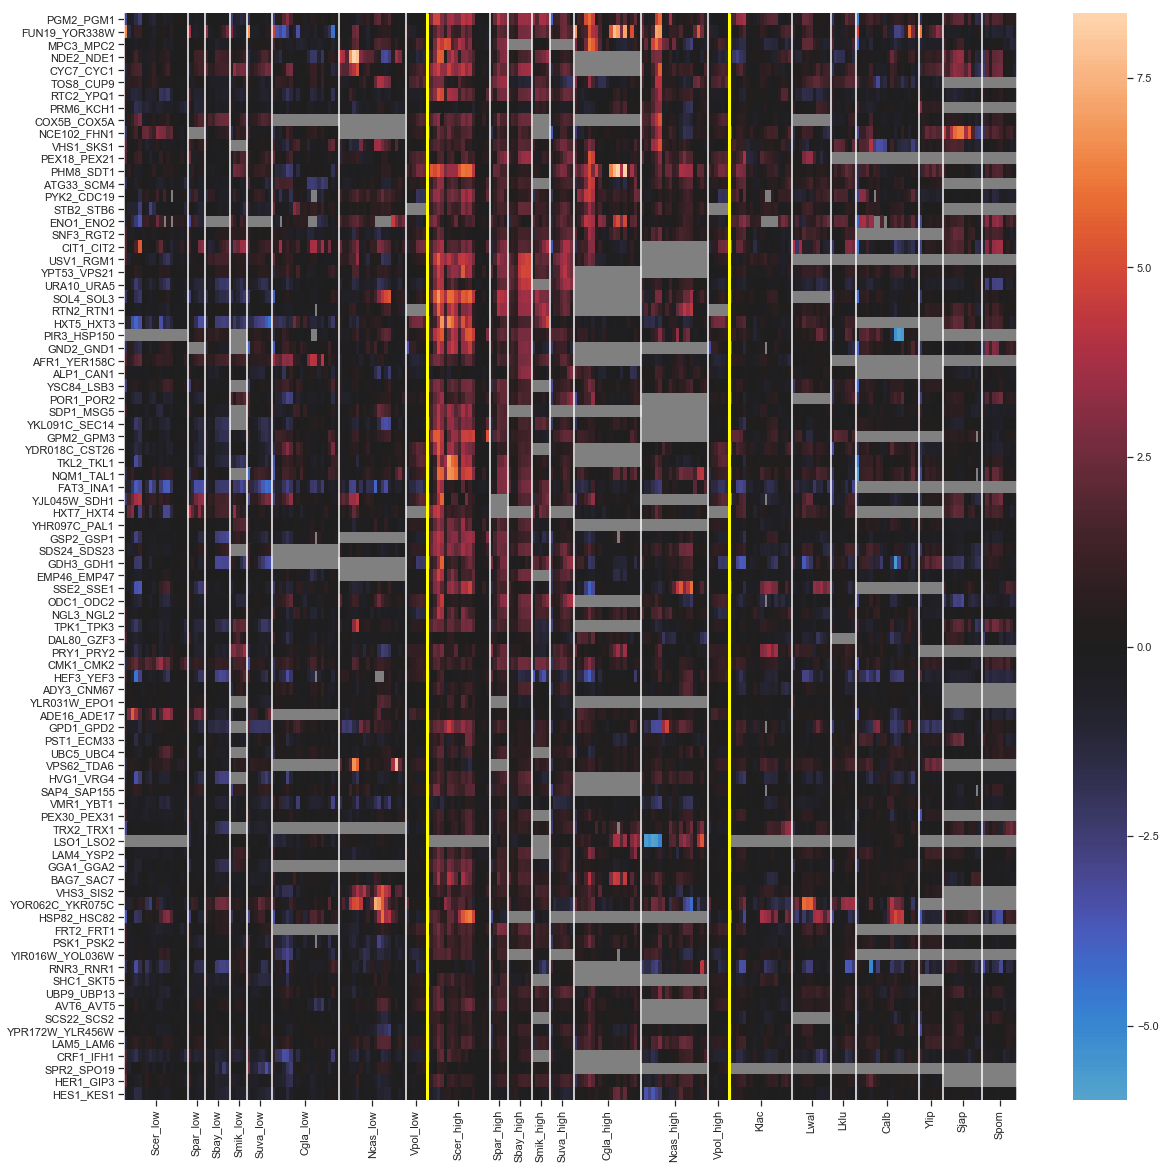

In [17]:
#heatmap after filtering and sorting - all conditions

fig_hmap_exp, ax_hmap_exp = plt.subplots(figsize=(20,20))

spec_order_post_WGH = ['Spar','Sbay','Smik','Suva', 'Cgla', 'Ncas','Vpol']
spec_order_pre_WGH = ['Klac','Lwal','Lklu', 'Calb', 'Ylip','Sjap','Spom']

spec_sets = {'Post WGH low' : ['Scer'] + spec_order_post_WGH, 
             'Post WGH high' : ['Scer'] + spec_order_post_WGH, 
             'Pre WGH' : spec_order_pre_WGH} 

# levels = {'Post WGH low': 'low', 
#           'Post WGH high': 'high', 
#           'Pre WGH' : ''}


#Make labels for each species, and separate out pre/post WGH and post WGH high/low with yellow lines
N_spec_level = {}

label_order = []
for level in ['low','high']:
    for spec in spec_sets['Post WGH ' + level]:
        label = spec + '_' + level
        N_spec_level[label] = 0
        label_order.append(label)
for spec in spec_sets['Pre WGH']: 
    label = spec
    N_spec_level[label] = 0 
    label_order.append(label)


for column in expression_data_df_sorted.columns: 
    spec = column.split('_')[0]
    if spec in set(spec_sets['Post WGH low']):
        level_sep = '_'
        level = column.split('_')[-1]
    else: 
        level_sep = ''
        level = ''
    label = spec + level_sep + level
    N_spec_level[label] = N_spec_level[label] + 1
    
new_ticks = []
sep_lines = [0]
new_tick_labels = []
big_lines = []
tick_tracker = 0
for label in label_order:
    N_tick_dist = N_spec_level[label]
    new_ticks.append(tick_tracker + N_tick_dist/2)
    new_tick_labels.append(label)
    sep_lines.append(tick_tracker + N_tick_dist)
    #new_tick_labels.append('')
    tick_tracker = tick_tracker + N_tick_dist
    if label in {'Vpol_low', 'Vpol_high'}:
        big_lines.append(tick_tracker)



sns.heatmap(expression_data_df_sorted, center = 0.0, xticklabels=False, ax = ax_hmap_exp)
ax_hmap_exp.set_facecolor('grey')
ax_hmap_exp.set_xticks(new_ticks)
ax_hmap_exp.set_xticklabels(new_tick_labels, rotation = 90)  #rotation=45, ha='right')
ax_hmap_exp.vlines(sep_lines, ymin = 0, ymax = len(expression_data_df_sorted), colors = 'white')
ax_hmap_exp.vlines(big_lines, ymin = 0, ymax = len(expression_data_df_sorted), colors = 'yellow',linewidth=3)
#ax_hmap_exp.set_rasterized(True)    #Had to do this because .svg took ages on inkscape to work with
#fig_hmap_exp.savefig(os.path.normpath('C:/Users/BMH_work/Google Drive/UCSF/ElSamad_Lab/PKA/Manuscript/exp_goi_regev.svg'))

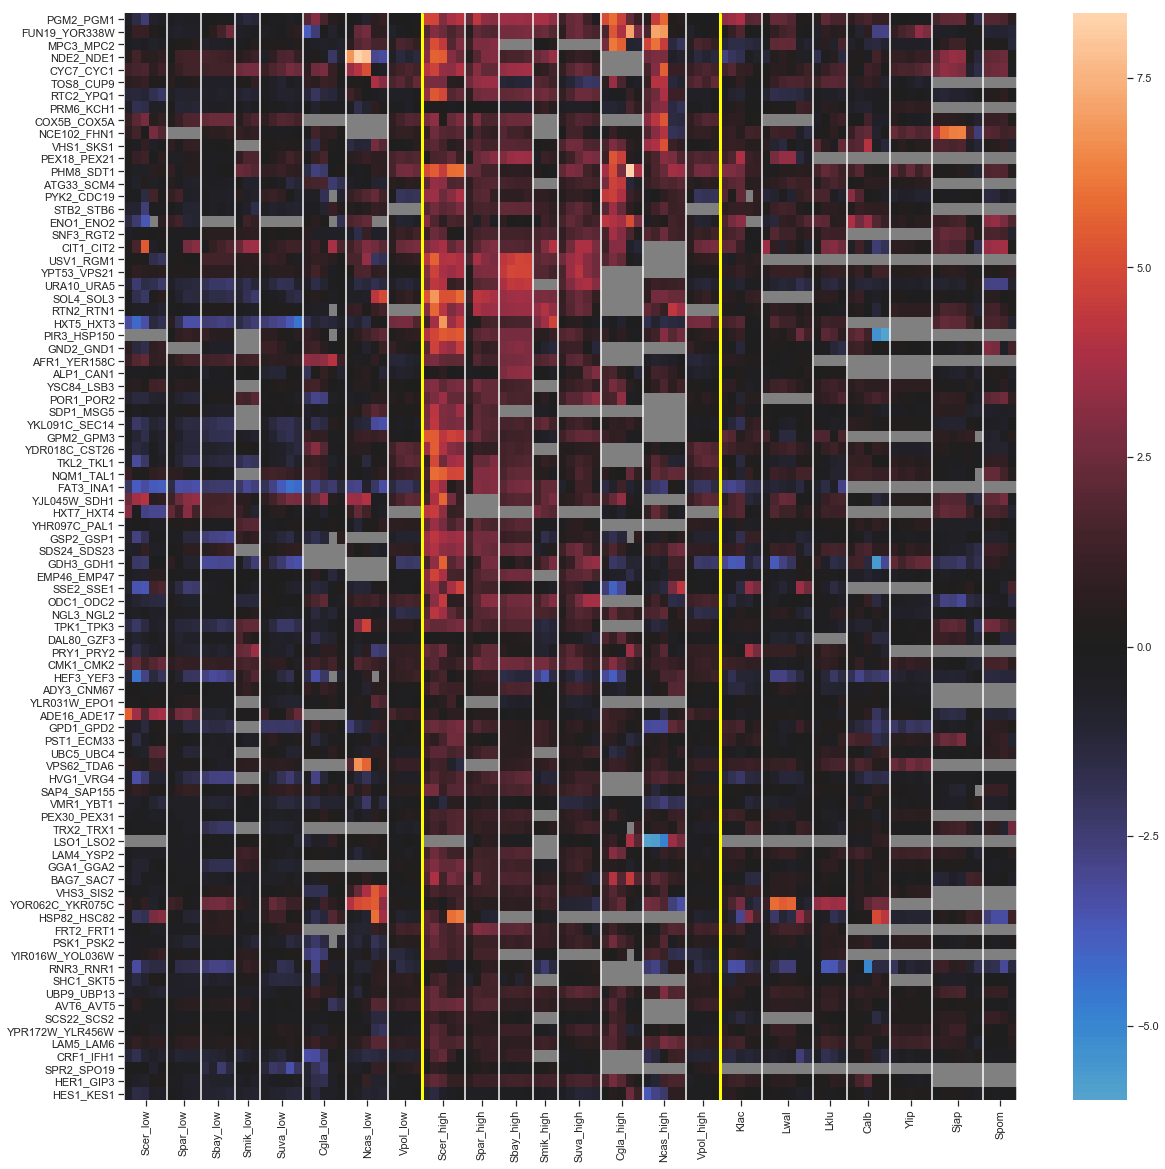

In [19]:
#heatmap after filtering and sorting - just top PKA conditions

fig_hmap_exp, ax_hmap_exp = plt.subplots(figsize=(20,20))

#Make subset that only has columns with appropriate conditions:
conds_pka_corr = ['DS/LOG', 'PS/LOG', 'PLAT/LOG',
                    'heat shock_030', 'heat shock_045']

new_columns = []
for column in expression_data_df_sorted.columns: 
    pass_test = False
    for cond in conds_pka_corr:
        if cond in column: 
            pass_test=True

    if pass_test:
        new_columns.append(column)
        
expression_data_df_pka_corr = expression_data_df_sorted.loc[:,new_columns]    
   

#Make labels for each species, and separate out pre/post WGH and post WGH high/low with yellow lines
N_spec_level = {}

label_order = []
for level in ['low','high']:
    for spec in spec_sets['Post WGH ' + level]:
        label = spec + '_' + level
        N_spec_level[label] = 0
        label_order.append(label)
for spec in spec_sets['Pre WGH']: 
    label = spec
    N_spec_level[label] = 0 
    label_order.append(label)


for column in expression_data_df_pka_corr.columns: 
    spec = column.split('_')[0]
    if spec in set(spec_sets['Post WGH low']):
        level_sep = '_'
        level = column.split('_')[-1]
    else: 
        level_sep = ''
        level = ''
    label = spec + level_sep + level
    N_spec_level[label] = N_spec_level[label] + 1
    
new_ticks = []
sep_lines = [0]
new_tick_labels = []
big_lines = []
tick_tracker = 0
for label in label_order:
    N_tick_dist = N_spec_level[label]
    new_ticks.append(tick_tracker + N_tick_dist/2)
    new_tick_labels.append(label)
    sep_lines.append(tick_tracker + N_tick_dist)
    #new_tick_labels.append('')
    tick_tracker = tick_tracker + N_tick_dist
    if label in {'Vpol_low', 'Vpol_high'}:
        big_lines.append(tick_tracker)



sns.heatmap(expression_data_df_pka_corr, center = 0.0, xticklabels=False, ax = ax_hmap_exp)
ax_hmap_exp.set_facecolor('grey')
ax_hmap_exp.set_xticks(new_ticks)
ax_hmap_exp.set_xticklabels(new_tick_labels, rotation = 90)  #rotation=45, ha='right')
ax_hmap_exp.vlines(sep_lines, ymin = 0, ymax = len(expression_data_df_pka_corr), colors = 'white')
ax_hmap_exp.vlines(big_lines, ymin = 0, ymax = len(expression_data_df_pka_corr), colors = 'yellow',linewidth=3)
ax_hmap_exp.set_rasterized(True)    #Had to do this because .svg took ages on inkscape to work with
#fig_hmap_exp.savefig(os.path.normpath('/home/heineike/scratch/induction_conservation_all.svg'))
fig_hmap_exp.savefig(os.path.normpath('C:/Users/BMH_work/Google Drive/UCSF/ElSamad_Lab/PKA/Manuscript/induction_conservation_all.svg'))

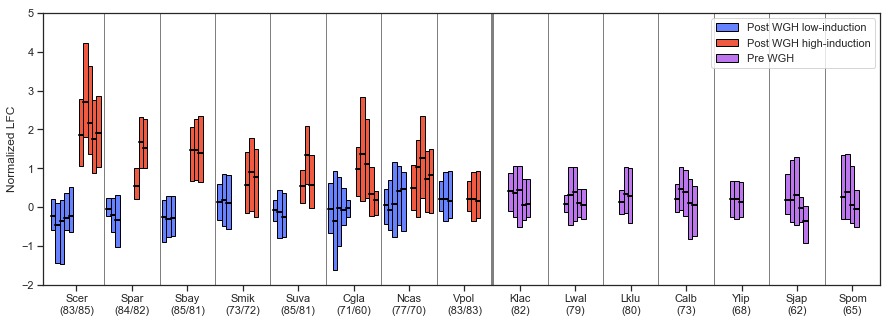

In [23]:
#Plot mean and variance of gene expression for each species 
#add text for total number of orthologs? 

fig_induction, ax_induction = plt.subplots(figsize=(15,5))
bw = 0.08
margin = 0.04
opacity = 0.8

spec_sets = {'Post WGH low' : ['Scer'] + spec_order_post_WGH, 
             'Post WGH high' : ['Scer'] + spec_order_post_WGH, 
             'Pre WGH' : spec_order_pre_WGH} 
#a8d6f4
colors = {'low': '#6682ff', 'high':'#ef5a40', 'Pre WGH': '#bd76ed'}
legend_label_dict = {'low': 'Post WGH low-induction', 
                 'high': 'Post WGH high-induction', 
                 'Pre WGH': 'Pre WGH'}
index = {'low':[],'high':[], 'Pre WGH':[]}
data_mean = {'low':[],'high':[], 'Pre WGH':[]}
data_std = {'low':[],'high':[], 'Pre WGH':[]}
data_N = {'low':{},
          'high':{}, 
          'Pre WGH':{}}
data = {'low':[],'high':[], 'Pre WGH':[]}
level_space = {'low':0.0, 'high':0.5}
label_order = []
label_ind = []

conds_pka_corr = ['DS/LOG', 'PS/LOG', 'PLAT/LOG','heat shock_030', 'heat shock_045']



all_conds = set(expression_data_df_pka_corr.columns)


#Post WGH Species
#assumes the same species sets are in both
jj = 0
spacer = bw/2 + margin
for spec in spec_sets['Post WGH high']: 
    for level in ['low','high']:
        data_N[level][spec]=np.inf 
    label_ind.append(jj+0.5)
    for kk, cond_base in enumerate(conds_pka_corr): 
        if spec + '_' + cond_base + '_high' in all_conds: 
            for level in ['low', 'high']:
                index[level].append(spacer + jj+bw*kk +level_space[level])
                column = expression_data_df_pka_corr[spec + '_' + cond_base + '_' + level]
                data[level].append(column[~column.isna()])
                #data_mean[level].append(column.mean())
                #data_std[level].append(column.std())
                N_spec_cond = sum(~(np.isnan(column)))
                N_spec_old = data_N[level][spec]
                data_N[level][spec] = min(N_spec_old, N_spec_cond)
    label_order.append(spec + '\n(' + str(data_N['low'][spec]) + '/' + str(data_N['high'][spec]) + ')')  
    jj = jj+1

#pre WGH Species
#assumes the same species sets are in both
for spec in spec_sets['Pre WGH']: 
    data_N['Pre WGH'][spec]=np.inf
    label_ind.append(jj+0.5)    
    for kk, cond_base in enumerate(conds_pka_corr): 
        if spec + '_' + cond_base in all_conds: 
            index['Pre WGH'].append(spacer + 0.25 + jj+bw*kk)
            column = expression_data_df_pka_corr[spec + '_' + cond_base]
            data['Pre WGH'].append(column[~column.isna()])
            #data_mean['Pre WGH'].append(column.mean())
            #data_std['Pre WGH'].append(column.std())
            N_spec_cond = sum(~(np.isnan(column)))
            N_spec_old = data_N['Pre WGH'][spec]
            data_N['Pre WGH'][spec] = min(N_spec_old, N_spec_cond)   
    label_order.append(spec + '\n(' + str(data_N['Pre WGH'][spec]) + ')')    
    jj = jj+1
    

legend_handles = []
legend_labels = []
for subset_name in ['low', 'high', 'Pre WGH']: 
    
    subset_data = data[subset_name]
    
    induction_bp = ax_induction.boxplot(subset_data, patch_artist=True, showfliers=False, 
                                          positions = index[subset_name], 
                                          widths = bw, 
                                          whis = 0.0
                                       )
    jj = 0
    for patch in induction_bp['boxes']:
        patch.set(facecolor=colors[subset_name])  
        if jj == 0: 
            legend_handles.append(patch)
        jj = jj+1
        
    plt.setp(induction_bp['medians'], color='black', linewidth=2.0)
    
    legend_labels.append(legend_label_dict[subset_name])
    
#     induction_plot = ax_induction.bar(index[subset_name],subset_data, bw,
#                  alpha=opacity,
#                  color=colors[subset_name],
#                  label=legend_labels[subset_name], 
#                  yerr = data_std[subset_name]) 
#                  #bottom = bottom)

ymax = 5.0
ymin = -2.0
ax_induction.vlines([len(spec_sets['Post WGH high'])], ymin = ymin, ymax = ymax, colors = 'gray',linewidth=3)
ax_induction.vlines(list(range(len(spec_sets['Post WGH high']) + len(spec_sets['Pre WGH'])))[1:], ymin=ymin, ymax = ymax, colors = 'gray', linewidth = 1)
ax_induction.set_xticklabels(label_order)
ax_induction.set_xlim(0, len(spec_sets['Post WGH high']) + len(spec_sets['Pre WGH']))
ax_induction.set_xticks(label_ind)
ax_induction.set_ylim(ymin,ymax)
ax_induction.set_xlim(-0.1, len(label_ind))
ax_induction.set_ylabel('Normalized LFC')
ax_induction.legend(legend_handles, legend_labels )

fig_induction.savefig(os.path.normpath('C:/Users/BMH_work/Google Drive/UCSF/ElSamad_Lab/PKA/Manuscript/induction_conservation_summary.svg'))

Figure [Induction conservation_summary]: Boxplots showing median and variation of relative expression of genes orthologous to DE_PKA for different stress conditions.  Where there are three bars, the conditions are 'DS/LOG',  'PS/LOG', and 'PLAT/LOG' from ref [Thompson et al 2013] and where there are five bars, the conditions are those three conditions plus 'heat shock_030' and 'heat shock_045' from [Roy et al 2013].  The thick grey line separates data for post-WGH species (left) from data for pre-WGH species (right).  Blue indicates orthologs of the low induction paralogs from DE_PKA (based on the Yeast Gene Order Browser [Byrne and Wolfe 2005] and red indicates orthologs of the high induction paralogs from DE_PKA.  Purple indicates the shared ortholog in the pre-WGH species. Dhan LL and Plat only.  Spom missing heat shock 45 min   

### Start with Differential expression for other species and look at conservation in Pre-WGH species. 

In [ ]:
#DEpka for S.Cer compared to DEstress
#DEstress for different species
#Plot against orthologs in Pre-WGH species

## Raw Expression data 

In [24]:
# #Load GOI ohnolog data

# fname = data_processing_dir + os.sep + os.path.normpath('kl_sc_PKA_as_m24_r1g1_20181017/gois_20181205.pkl')

# with open(fname, 'rb') as file:
#     [ohnologs_goi,ohnologs_expression_sorted,goi_criteria] = pickle.load(file)

# ohnologs_goi.set_index('Ancestor', inplace=True)
# ohnologs_expression_sorted.set_index('Ancestor', inplace=True)
# ohnologs_goi.rename(columns={'sc_genename_' + level: 'genename_'+level for level in ['low','high']},inplace=True)



#Load GOI ohnolog data

fname = data_processing_dir + os.sep + os.path.normpath('kl_sc_PKA_as_m24_r1g1_20181017/gois_20181205.pkl')

with open(fname, 'rb') as file:
    [ohnologs_goi,ohnologs_expression_sorted,goi_criteria] = pickle.load(file)

ohnologs_goi.set_index('Ancestor', inplace=True)
ohnologs_expression_sorted.set_index('Ancestor', inplace=True)
    
    
#Load kl_sc_PKA data
fname_cross_spec_comparison = data_processing_dir + os.path.normpath("kl_sc_PKA_as_m24_r1g1_20181017/cross_species_compare_ASminus_ASplus_YPD_20181204.csv")
kl_sc_PKA_data = pd.read_csv(fname_cross_spec_comparison, index_col=0)

#Merge LFC data from KL with rest of ohnolog data
ohnologs_goi_kl_data = ohnologs_goi.merge(kl_sc_PKA_data.loc[:,
                    ['N SCer Orthologs', 'kl_genename', 'sc_genename', 'baseMean_KL',
                    'log2FoldChange_KL', 'lfcSE_KL', 'stat_KL', 'pvalue_KL', 'padj_KL']],
                    how='left', left_on = 'sc_genename_high', right_on = 'sc_genename')


#Load KL ortholog data
kl_orthologs = pd.read_pickle(data_processing_dir + "ortholog_files_YGOB/kl_orthologs.pkl")

#load average rlog data
rlog_data_mean_var = {}
for spec in ['SC', 'KL']:
    rlog_data_mean_var[spec] = pd.read_csv(data_processing_dir + os.path.normpath('kl_sc_PKA_as_m24_r1g1_20181017/20181017_rlog_mean_' + spec + '.csv' ),index_col=0)

#Rename KL rlog data columns: 
new_kl_columns = [column + '_kl' for column in rlog_data_mean_var['KL'].columns]
rlog_data_mean_var['KL'].columns = new_kl_columns

#Merge k.lac rlog data with ohnolog_gois
ohnologs_goi_klorth = ohnologs_goi.merge(kl_orthologs, how='left', left_on='sc_genename_low',right_on='sc_genename')
ohnologs_goi_rlog = ohnologs_goi_klorth.merge(rlog_data_mean_var['KL'], how = 'left', left_on='kl_genename', right_index = True)
    

In [64]:
# #Build platform dicts, raw exp data sets and expression datasets

# id_source_data_inds = {'Klac': 'GSE22198', 'Scer': 'GSE22204', 
#                         'Cgla':'GSE22194', 'Ncas' : 'GSE22200', 
#                         'Sbay' : 'GSE22205', 'Smik': 'GSE22201', 
#                         'Lwal': 'GSE22199', 'Spar': 'GSE22193', 
#                         'Lklu': 'GSE22202', 'Dhan': 'GSE22191', 
#                         'Calb': 'GSE22197', 'Ylip': 'GSE22192'}

# spec_list =   list(id_source_data_inds.keys()) + ['Vpol','Sjap','Spom', 'Suva'] 
# io_library.make_data_tables(spec_list)

In [4]:
#S.Cer

spec = 'Scer'

#Load expression data
fname = data_processing_dir +  os.path.normpath('regev_data/raw_exp/' + spec + '_raw_exp.csv')
raw_exp_tsankov = pd.read_csv(fname, index_col='orf_name')

# #Take mean of all data that has more than one spot per orf
# #Also only select out column of mean expression across replicates
# grouped = raw_exp_tsankov.groupby('orf_name')
# raw_exp_tsankov_mean = grouped.mean().loc[:,'Mean']

for level in ['low','high']: 
    raw_exp_tsankov_mean_level = raw_exp_tsankov['med_qnorm'].reindex(list(ohnologs_goi_rlog['sc_genename_' + level]))
    ohnologs_goi_rlog[spec + '_raw_exp_tsankov_' + level] = list(raw_exp_tsankov_mean_level)

    
#K.Lac
spec = 'Klac'

fname = data_processing_dir + os.path.normpath('regev_data/raw_exp/' + spec + '_raw_exp.csv')
raw_exp_tsankov = pd.read_csv(fname, index_col = 'orf_name')

#Take mean of all data that has more than one spot per orf
#Also only select out column of mean expression across replicates

#add data to dataframe
raw_exp_tsankov_mean_goi = raw_exp_tsankov['med_qnorm'].reindex(list(ohnologs_goi_rlog['kl_genename']))
ohnologs_goi_rlog[spec + '_raw_exp_tsankov_YGOB'] = list(raw_exp_tsankov_mean_goi)


In [5]:
colors = {'low': 'blue', 'high': 'red'}

hover_text = []
#might be nice to add kl LFC to this
for ind, row in ohnologs_goi_rlog.iterrows():
    hover_text.append(('Low Paralog: {SC_common_name_low}<br>  LFC: {LFC_low:.2f}<br>  -log10(pval): {pval_low:.2f}<br>' +
                       'High Paralog: {SC_common_name_high}<br>  LFC: {LFC_high:.2f}<br>  -log10(pval): {pval_high:.2f}<br>' +
                       'KL genename: {kl_genename}').format(
                        SC_common_name_low = row['SC_common_name_low'],
                        LFC_low = row['log2FoldChange_low'],
                        pval_low = -np.log10(row['pvalue_low']),
                        SC_common_name_high = row['SC_common_name_high'],
                        LFC_high = row['log2FoldChange_high'],
                        pval_high = -np.log10(row['pvalue_high']),
                        kl_genename = row['kl_genename'])
                      )
data = []
corr_coef = {}
for level in ['low','high']:
    xdata = ohnologs_goi_rlog['AS_WT_cont_mean_' + level]
    ydata = ohnologs_goi_rlog['Scer_raw_exp_tsankov_' + level]
    
    trace = pygo.Scatter(
                x = xdata, 
                y = ydata,
                text = hover_text,
                mode = 'markers',
                marker = {'opacity': 0.9,  
                          'color': colors[level],
                          'size': 10}, 
                name = 'SCer ' + level + ' induction paralogs'
            )

    data.append(trace)
    
    #Remove NA and get correlation coefficient
    xy_data = pd.DataFrame()
    xy_data['xdata']=xdata
    xy_data['ydata']=ydata
    xy_data_nanrm = xy_data[((~xy_data['xdata'].isna()) & (~xy_data['ydata'].isna()) )]
    corr_coef['Scer_'+level] = np.corrcoef(xy_data_nanrm.T)[0][1]
    
    
    
xdata = ohnologs_goi_rlog['AS_WT_cont_mean_kl']
ydata = ohnologs_goi_rlog['Klac_raw_exp_tsankov_YGOB']
trace = pygo.Scatter(
                x = xdata , 
                y = ydata ,
                text = hover_text,
                mode = 'markers',
                marker = {'opacity': 0.9,  
                          'color': 'green',
                          'size': 10}, 
                name = 'KLac orthologs'
            )

data.append(trace)

#Remove NA and get correlation coefficient
xy_data = pd.DataFrame()
xy_data['xdata']=xdata
xy_data['ydata']=ydata
xy_data_nanrm = xy_data[((~xy_data['xdata'].isna()) & (~xy_data['ydata'].isna()) )]
corr_coef['Klac'] = np.corrcoef(xy_data_nanrm.T)[0][1]

annotation_text = 'Correlation Coeff <br>'
for gene_set, corr in corr_coef.items():
    annotation_text = annotation_text + '{} : {:.2f} <br>'.format(gene_set,corr)

layout = pygo.Layout(
    xaxis= {
        #"range":[-20, 20],
        "title": 'rlog'
    },
    yaxis= {
        #"range":[-10, 10],
        "title": 'LFC mRNA / gDNA'
    },
    annotations=[
        dict(
            x=13,
            y=-5,
            xref='x',
            yref='y',
            text=annotation_text,
            showarrow=False
        )
    ]
)


fig = pygo.Figure(data=data, layout = layout)
py.iplot(fig, filename= 'rlog_vs_tsankov')

Supp Figure [rlog vs tsankov] The raw expression data from Tsankov et al [ref ??] is correlated with our rlog data.  rlog data for our differentially expressed paralogs in PKA(AS) cells grown for 45 min with DMSO are shown on the x axis.  Data from microarrays in which mRNA in cells in exponential growth phase in ??? media were competitively hybridized against genomic DNA.  NA values are removed.  

<IPython.core.display.Javascript object>


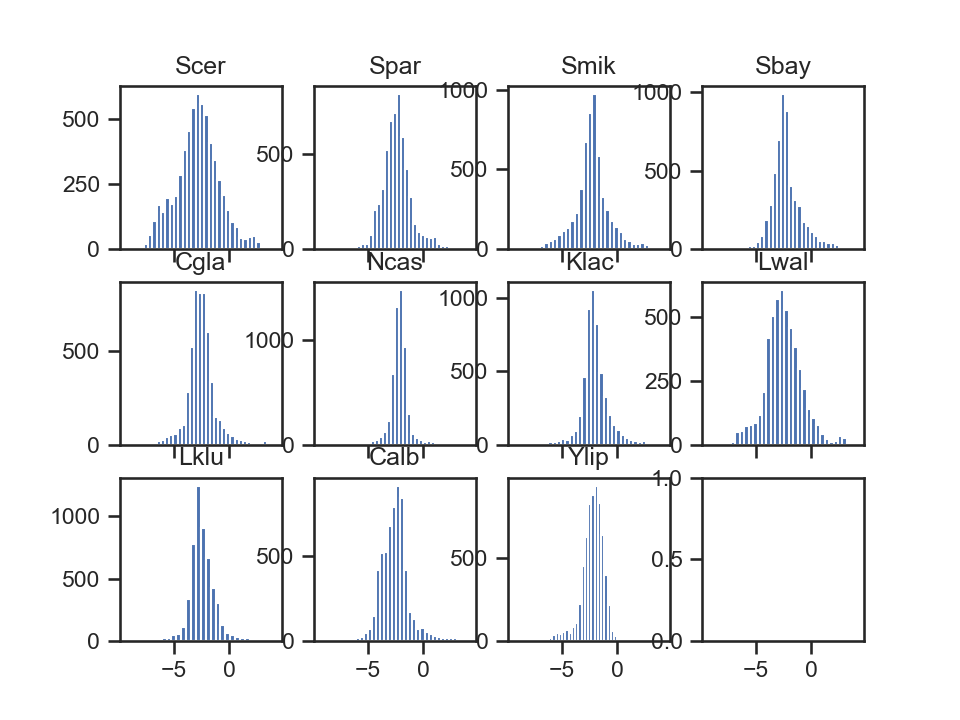

<IPython.core.display.Javascript object>


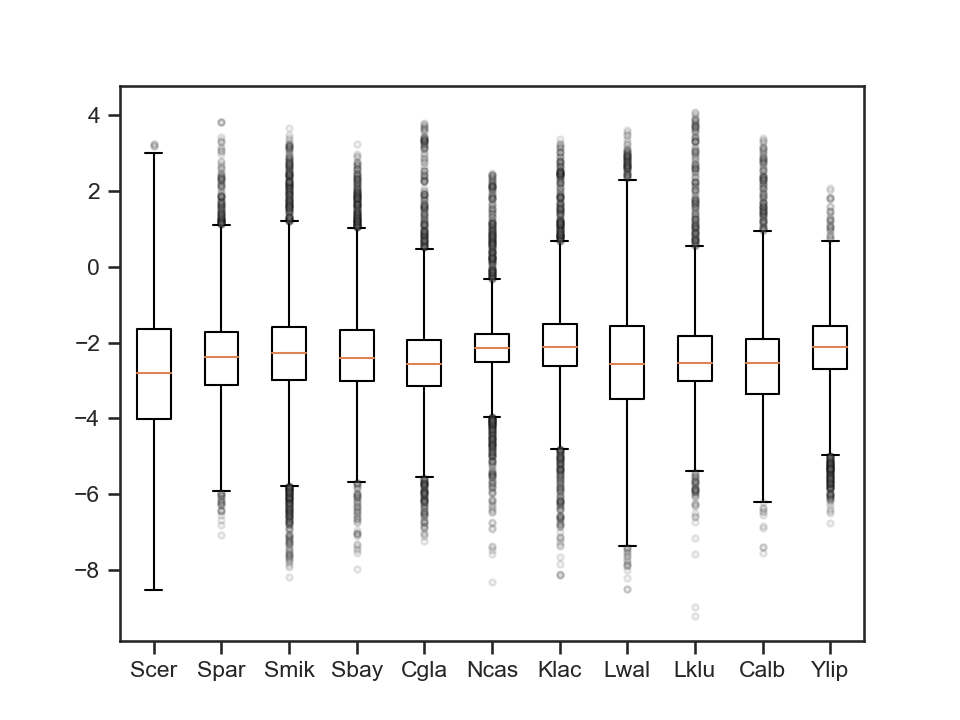

<IPython.core.display.Javascript object>


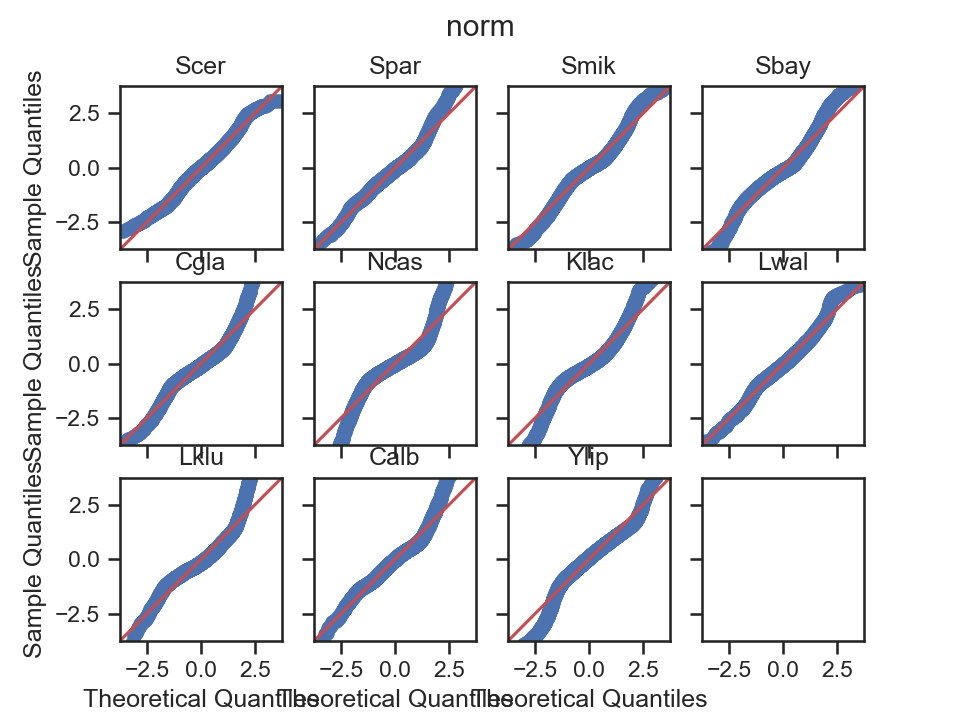

<IPython.core.display.Javascript object>


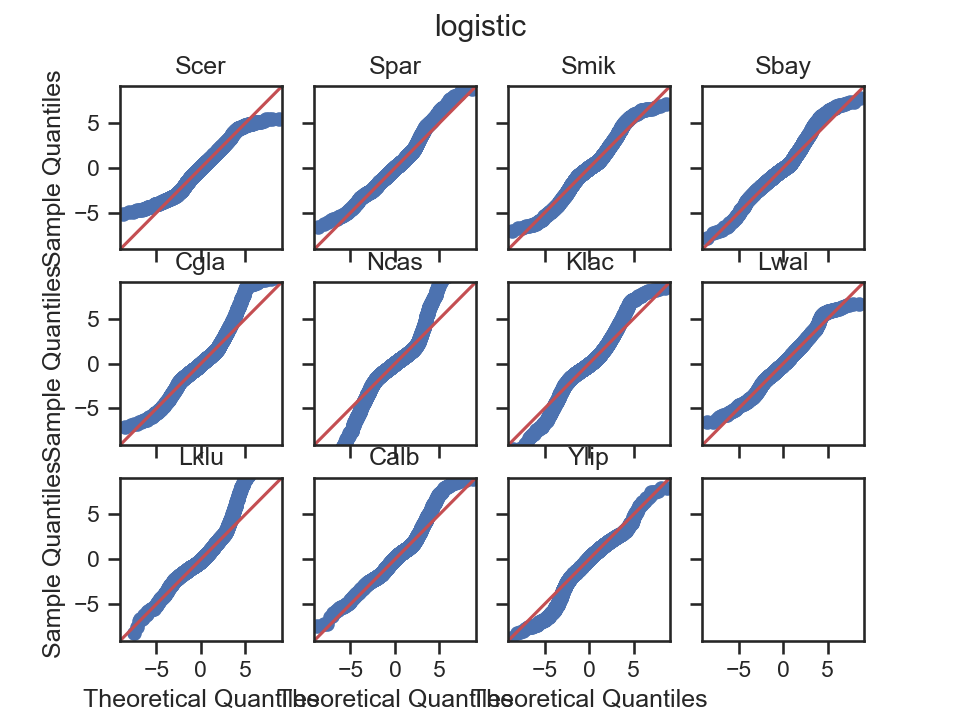

{'whiskers': [<matplotlib.lines.Line2D at 0x1e8060ab780>,
 'caps': [<matplotlib.lines.Line2D at 0x1e80616abe0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e80172f208>,
 'medians': [<matplotlib.lines.Line2D at 0x1e806171320>,
 'fliers': [<matplotlib.lines.Line2D at 0x1e8061716a0>,
 'means': []}

In [28]:
#Load all the data and check the distribution

fig_hist, axarr_hist = plt.subplots(3,4, sharex = True)

fig_boxplot, ax_boxplot = plt.subplots()

figs_qq = {}
axarr_qq = {}
dist_dict = dist_dict = {'norm': stats.norm , 'logistic': stats.logistic}

for dist_name in dist_dict.keys():
    figs_qq[dist_name], axarr_qq[dist_name] = plt.subplots(3,4, sharex = True, sharey = True)
    figs_qq[dist_name].suptitle(dist_name)
                                                           
spec_order_post_WGH = ['Scer','Spar','Smik','Sbay', 'Cgla', 'Ncas']
spec_order_pre_WGH = ['Klac','Lwal','Lklu', 'Calb', 'Ylip'] #Removed Dhan

raw_exp_tsankov_all = {}

boxplot_data = []

for jj, spec in enumerate(spec_order_post_WGH+spec_order_pre_WGH) : 
    #Load expression data
    fname = data_processing_dir + os.sep + os.path.normpath('regev_data/raw_exp/' + spec + '_raw_exp.csv')
    raw_exp_tsankov = pd.read_csv(fname, index_col = 'orf_name')
    raw_exp_tsankov_all[spec] = raw_exp_tsankov['med_qnorm']
    boxplot_data.append(raw_exp_tsankov_all[spec])
    ax_hist = axarr_hist.flatten()[jj]
    ax_hist.hist(raw_exp_tsankov_all[spec], bins=30)
    ax_hist.set_title(spec)
    
    
    for dist_name, dist in dist_dict.items(): 
        ax_qq = axarr_qq[dist_name].flatten()[jj]
        sm.qqplot(raw_exp_tsankov_all[spec], dist = dist, fit = True, line = '45', ax = ax_qq )
        ax_qq.set_title(spec)
    
        ax_qq.set_ylabel('')
        ax_qq.set_xlabel('')
        if jj in [0,4,8]:
            ax_qq.set_ylabel('Sample Quantiles')
        if jj in [8,9,10,11]: 
            ax_qq.set_xlabel('Theoretical Quantiles')

flierprops = dict(marker='o', markerfacecolor='grey', markersize=3,
                  linestyle='none', alpha = 0.1)
ax_boxplot.boxplot(boxplot_data, whis=2.0, labels = spec_order_post_WGH+spec_order_pre_WGH, flierprops=flierprops)    



The distributions of expression between the different species seems different.  Some are more normal than others (SCer, LWal)  and some look more logistic than others  (SPar, SBay, Dhan, YLip).  As a rough comparison, I will just assume a standard normal distribution and scale by mean and variance.  In particular S.Cer seems to have a much wider variance - I am imagining that the microarray for S.Cer had a lot more probes for lower expressing genes - and maybe the probes for the other species were constrained to those that were highest expressing?   

<IPython.core.display.Javascript object>


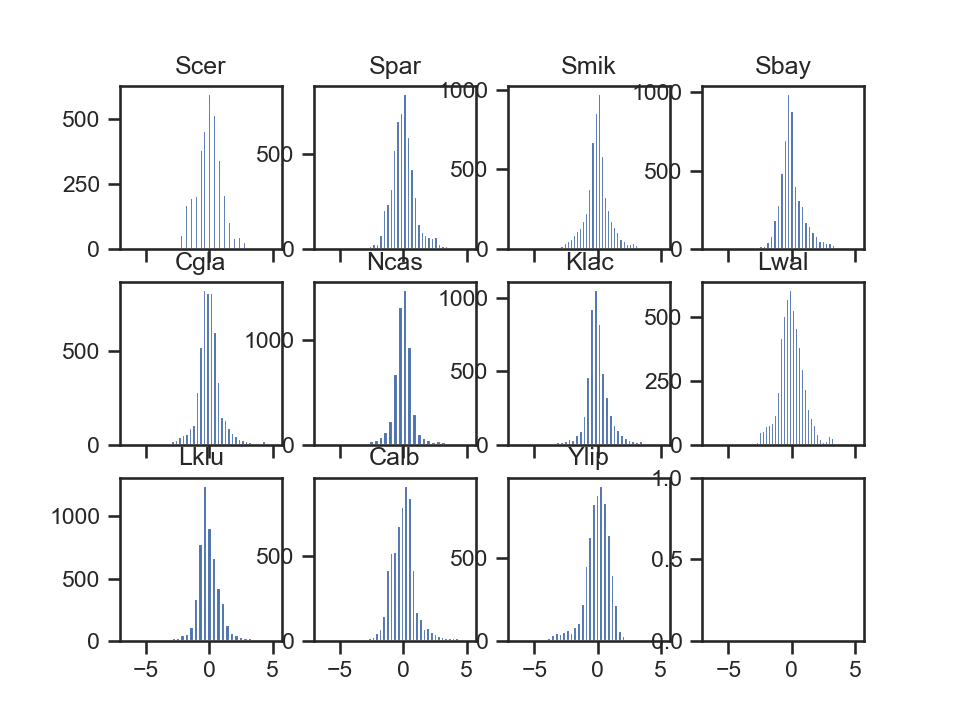

<IPython.core.display.Javascript object>


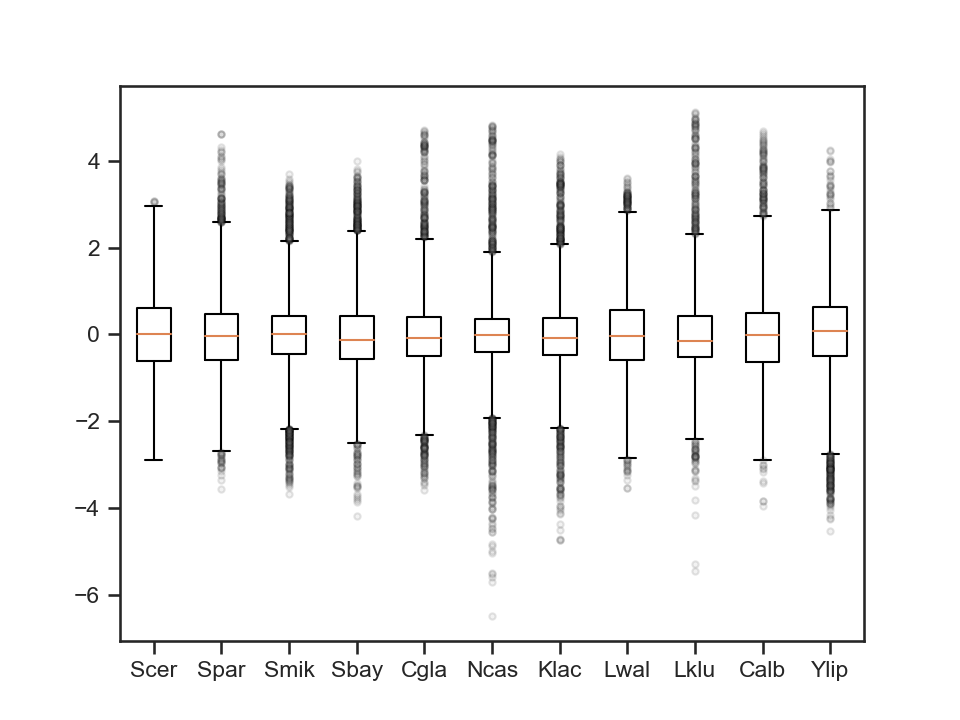

{'whiskers': [<matplotlib.lines.Line2D at 0x1e8028fe5c0>,
 'caps': [<matplotlib.lines.Line2D at 0x1e8028fd748>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e804c0bf60>,
 'medians': [<matplotlib.lines.Line2D at 0x1e8028fde48>,
 'fliers': [<matplotlib.lines.Line2D at 0x1e8028fdf60>,
 'means': []}

In [29]:
#Normalize all the raw expression data by mean and std (although we know they are not all normal)
#Note: the raw data value is already the median of the quantile normalized replicates per tsankov methods. 


fig_hist, axarr_hist = plt.subplots(3,4, sharex = True)

fig_boxplot, ax_boxplot = plt.subplots()


raw_exp_tsankov_all_norm = {}

boxplot_data = []
for jj, spec in enumerate(spec_order_post_WGH+spec_order_pre_WGH) : 
    std = raw_exp_tsankov_all[spec].std()
    mu = raw_exp_tsankov_all[spec].mean()
    raw_exp_tsankov_all_norm[spec] = (raw_exp_tsankov_all[spec]-mu)/std

    boxplot_data.append(raw_exp_tsankov_all_norm[spec])
    ax_hist = axarr_hist.flatten()[jj]
    ax_hist.hist(raw_exp_tsankov_all_norm[spec], bins=30)
    ax_hist.set_title(spec)

flierprops = dict(marker='o', markerfacecolor='grey', markersize=3,
                  linestyle='none', alpha = 0.1)
ax_boxplot.boxplot(boxplot_data, whis=2.0, labels = spec_order_post_WGH+spec_order_pre_WGH, flierprops=flierprops)    


In [30]:
# # Save normalized tsankov data (only need to do this once)
# for spec, data in raw_exp_tsankov_all_norm.items(): 
#     fname_array_data = data_processing_dir + os.path.normpath('regev_data/raw_exp/' + spec + '_raw_exp_norm.csv')
#     data.to_csv(fname_array_data)

### Check correlation between raw expression and rlog for S.Cer and K.Lac


In [31]:
#load average rlog data
rlog_data_mean_var = {}
for spec in ['SC', 'KL']:
    rlog_data_mean_var[spec] = pd.read_csv(data_processing_dir + os.path.normpath('kl_sc_PKA_as_m24_r1g1_20181017/20181017_rlog_mean_' + spec + '.csv' ),index_col=0)

<IPython.core.display.Javascript object>


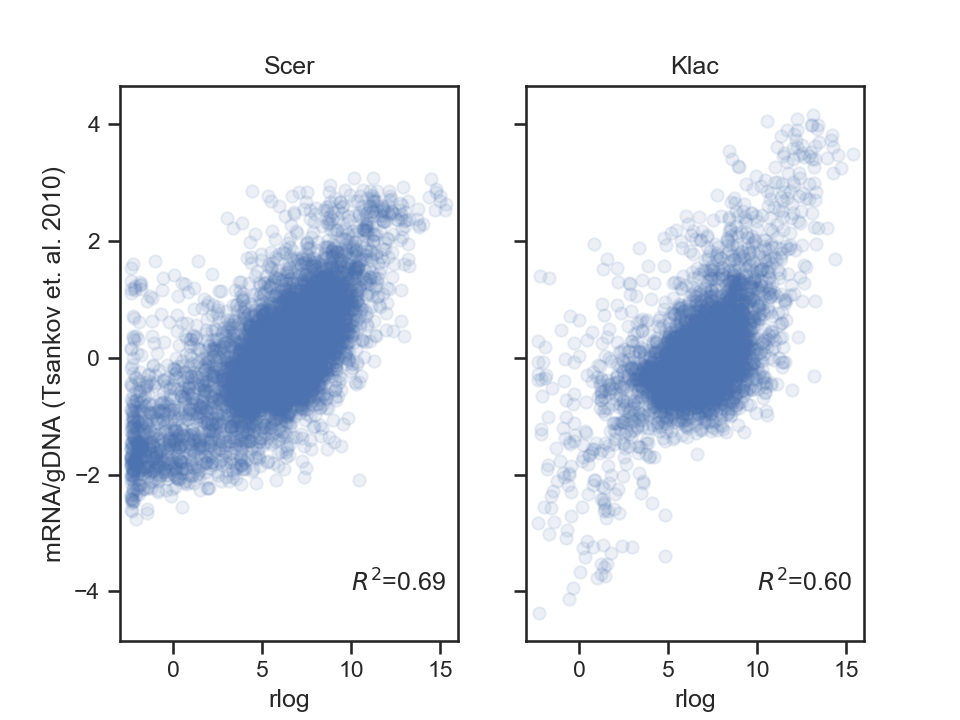

In [32]:
fig_sckl_raw_all, ax_sckl_raw_all = plt.subplots(1,2, sharey=True)

spec_SCKL = {'Scer':'SC', 'Klac': 'KL'}


for jj, spec in enumerate(['Scer', 'Klac']):
    fname_raw_exp_data = data_processing_dir + os.path.normpath('regev_data/raw_exp/' + spec + '_raw_exp_norm.csv')
    raw_exp_data = pd.read_csv(fname_raw_exp_data, header=None, index_col=0)


    raw_exp_rlog = raw_exp_data.merge(rlog_data_mean_var[spec_SCKL[spec]].loc[:,['AS_WT_cont_mean']], how='inner', left_index = True, right_index=True)

    raw_exp_rlog.rename(columns={1:'Tsankov', 'AS_WT_cont_mean': 'rlog'}, inplace=True)
    
    raw_exp_rlog_nanrm = raw_exp_rlog[((~raw_exp_rlog.isna()) & (~raw_exp_rlog.isna()) )]
    corr_coef = np.corrcoef(raw_exp_rlog_nanrm.T)[0][1]    
    
    ax = ax_sckl_raw_all[jj]
    ax.scatter(raw_exp_rlog['rlog'], raw_exp_rlog['Tsankov'], alpha = 0.1)
    ax.set_title(spec)
    ax.set_xlim([-3,16])
    ax.set_xlabel('rlog')
    if jj == 0: 
        ax.set_ylabel('mRNA/gDNA (Tsankov et. al. 2010)')
    ax.text(10,-4, '$R^2$={:.2f}'.format(corr_coef))
    
    
    
fig_sckl_raw_all.savefig(os.path.normpath('C:/Users/BMH_work/Google Drive/UCSF/ElSamad_Lab/PKA/Manuscript/rlog_vs_tsankov_all.svg'))


### Look at raw expression for GOIs only

In [33]:
#Load GOI ohnolog data

fname = data_processing_dir + os.sep + os.path.normpath('kl_sc_PKA_as_m24_r1g1_20181017/gois_20181205.pkl')

with open(fname, 'rb') as file:
    [ohnologs_goi,ohnologs_expression_sorted,goi_criteria] = pickle.load(file)

ohnologs_goi.set_index('Ancestor', inplace=True)
ohnologs_expression_sorted.set_index('Ancestor', inplace=True)
ohnologs_goi.rename(columns={'sc_genename_' + level: 'genename_'+level for level in ['low','high']},inplace=True)


<IPython.core.display.Javascript object>


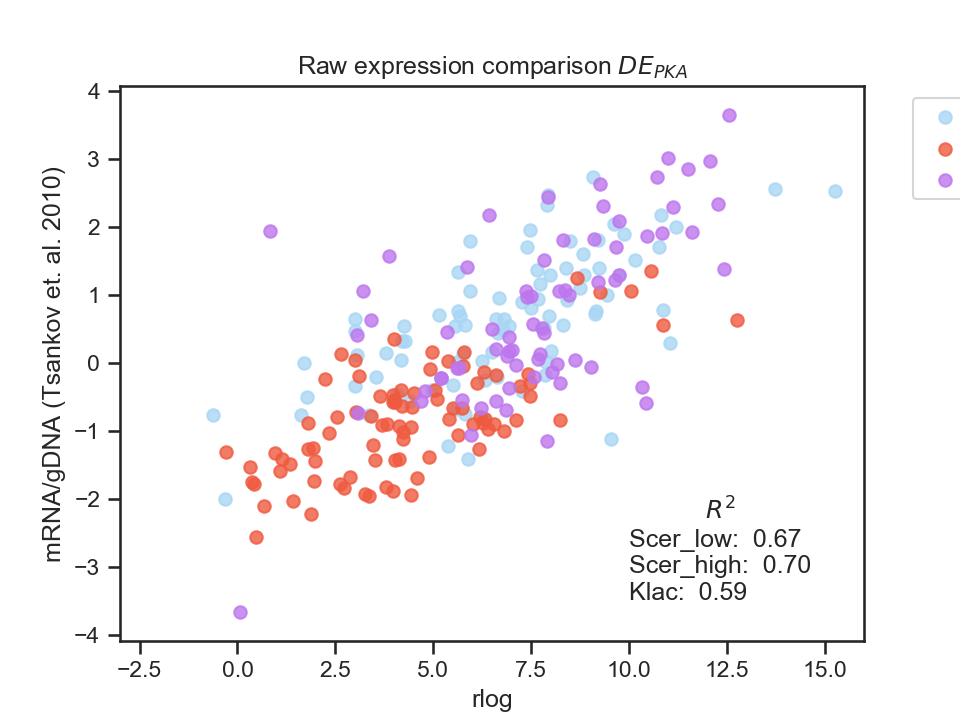

In [34]:
## Look at correlation between tsankov data and DEpka genes in S.Cer and K.Lac

#Add SCer prefix to genename columns
ohnologs_goi['Scer_genename_low'] = ohnologs_goi['genename_low']
ohnologs_goi['Scer_genename_high'] = ohnologs_goi['genename_high']

#Add KLac_genename column
orth_dir = data_processing_dir + 'ortholog_files_YGOB' + os.sep
scer_klac_lookup = io_library.read_orth_lookup_table('Scer', 'Klac', orth_dir)
ohnologs_goi['Klac_genename'] = [scer_klac_lookup[gene][0] for gene in ohnologs_goi['Scer_genename_low']]



fig_sckl_raw_goi, ax_sckl_raw_goi = plt.subplots()

orth_set_dict = {'Scer low': ('Scer','SC','_low','#a8d6f4'),  #(spec, rlog spec, level suffix, color) 
            'Scer high': ('Scer','SC','_high','#ef5a40'),
            'Klac': ('Klac','KL','','#bd76ed'),
           }

corr_coefs = {}
for jj, orth_set in enumerate(['Scer low', 'Scer high', 'Klac']):
    spec = orth_set_dict[orth_set][0]
    level_suff = orth_set_dict[orth_set][2]
    rlog_spec = orth_set_dict[orth_set][1]
    
    fname_raw_exp_data = data_processing_dir + os.path.normpath('regev_data/raw_exp/' + spec + '_raw_exp_norm.csv')
    raw_exp_data = pd.read_csv(fname_raw_exp_data, header=None, index_col=0)
    
    #picks out goi that are not mapped to none in ortholog mapping for depka
    goi_spec = [gene for gene in ohnologs_goi[spec + '_genename' + level_suff] if gene != 'NONE']
    rlog_data = rlog_data_mean_var[rlog_spec].loc[goi_spec,['AS_WT_cont_mean']] 
    
    raw_exp_rlog = raw_exp_data.merge(rlog_data, how='inner', left_index=True, right_index = True)

    raw_exp_rlog.rename(columns={1: 'Tsankov', 'AS_WT_cont_mean': 'rlog'}, inplace=True)
    
    raw_exp_rlog_nanrm = raw_exp_rlog[((~raw_exp_rlog.isna()) & (~raw_exp_rlog.isna()) )]
    corr_coefs[orth_set] = np.corrcoef(raw_exp_rlog_nanrm.T)[0][1]    
    
    ax_sckl_raw_goi.scatter(raw_exp_rlog['rlog'], raw_exp_rlog['Tsankov'], alpha = 0.8, color = orth_set_dict[orth_set][3], label=orth_set)

    
ax_sckl_raw_goi.set_title('Raw expression comparison $DE_{PKA}$')
ax_sckl_raw_goi.set_xlim([-3,16])
ax_sckl_raw_goi.set_xlabel('rlog')
ax_sckl_raw_goi.set_ylabel('mRNA/gDNA (Tsankov et. al. 2010)')
ax_sckl_raw_goi.legend(loc='upper left', bbox_to_anchor=(1.05,1.0))
ax_sckl_raw_goi.text(10,-3.5, 
                     '           $R^2$\nScer_low:  {0:.2f}\nScer_high:  {1:.2f}\nKlac:  {2:.2f}'.format(*[corr_coefs[orth_set] for orth_set in ['Scer low', 'Scer high', 'Klac']])
                    )
    
    
    
fig_sckl_raw_goi.savefig(os.path.normpath('C:/Users/BMH_work/Google Drive/UCSF/ElSamad_Lab/PKA/Manuscript/rlog_vs_tsankov_goi.svg'))

In [39]:
# given genes of interest load raw expression data 

seed_spec = 'Scer'
sort_column = 'log2FoldChange'

#Post WGH data (minus seed spec)
spec_order_post_WGH = ['Spar','Smik','Sbay', 'Cgla', 'Ncas']
spec_order_pre_WGH = ['Klac','Lwal','Lklu','Calb', 'Ylip']

#Smik missing mapping from ygob names to Regev lab orthogroups.  C.Gla mapping for Sec14 seems better with orthogroups than YGOB
#Going to start with orthogroup mapping from Regev lab for all of them. 
#K.Lac had a major discrepancy with annotation in regev lab data.   


ohnologs_goi_array = io_library.load_tsankov_data_gois(ohnologs_goi, sort_column, seed_spec, spec_order_post_WGH, spec_order_pre_WGH)

#Add SC_common_name_high, low and high_low columns to an ohnologs_file
#SC_common_name lookup function requires genename_low/high columns
orth_dir = data_processing_dir + 'orthologs_regev'
for level in ['low', 'high']: 
    ohnologs_goi_array['genename_' + level] = ohnologs_goi_array[seed_spec + '_genename_' + level]
ohnologs_goi_array = io_library.SC_common_name_columns_ohnologs(ohnologs_goi_array, seed_spec, orth_dir)



YDR524C-B has no data in tsankov experiment for Scer
YJL159W has no data in tsankov experiment for Scer
YBR056W-A has no data in tsankov experiment for Scer
YGR169C-A has no data in tsankov experiment for Scer
YCR075W-A has no data in tsankov experiment for Scer
YCL048W-A has no data in tsankov experiment for Scer
YJR005C-A has no data in tsankov experiment for Scer
YBR056W-A is not in orthogroup index Spar
YBR056W-A is not in orthogroup index Sbay
CAGL0C01325g has no entry in Tsankov dataset for Cgla. Ortholog of YNL052W
Neither of the orthologs for YNL052W have an entry in Tsankov dataset
YBR056W-A is not in orthogroup index Cgla
CAGL0D02640g has no entry in Tsankov dataset for Cgla. Ortholog of YHR092C
CAGL0C01325g has no entry in Tsankov dataset for Cgla. Ortholog of YIL111W
Neither of the orthologs for YIL111W have an entry in Tsankov dataset
CAGL0D02640g has no entry in Tsankov dataset for Cgla. Ortholog of YDR342C
CAGL0D02640g has no entry in Tsankov dataset for Cgla. Ortholog o

In [41]:
columns_to_view = ['SC_common_name_high', 'SC_common_name_low','Scer_raw_exp_tsankov_low',
       'Scer_raw_exp_tsankov_high', 'Klac_raw_exp_tsankov',
       'Spar_raw_exp_tsankov_low', 'Spar_raw_exp_tsankov_high',
       'Smik_raw_exp_tsankov_low', 'Smik_raw_exp_tsankov_high',
       'Sbay_raw_exp_tsankov_low', 'Sbay_raw_exp_tsankov_high',
       'Cgla_raw_exp_tsankov_low', 'Cgla_raw_exp_tsankov_high',
       'Ncas_raw_exp_tsankov_low', 'Ncas_raw_exp_tsankov_high',
       'Lwal_raw_exp_tsankov',
       'Lklu_raw_exp_tsankov', 'Calb_raw_exp_tsankov',
       'Ylip_raw_exp_tsankov']  #,'AS_WT_cont_mean_high','AS_WT_cont_mean_low','AS_WT_cont_mean_kl']

In [42]:
ohnologs_goi_array.loc[ohnologs_goi_array['SC_common_name_high']=='PYK2',columns_to_view].T

Ancestor                                Anc_7.45
SC_common_name_high                         PYK2
SC_common_name_low                         CDC19
Scer_raw_exp_tsankov_low     [2.741324246029439]
Scer_raw_exp_tsankov_high  [-0.9144055292712904]
Klac_raw_exp_tsankov        [2.6312935012349428]
Spar_raw_exp_tsankov_low    [4.3284973708700045]
Spar_raw_exp_tsankov_high  [-0.4744905875184239]
Smik_raw_exp_tsankov_low    [3.3451069809009706]
Smik_raw_exp_tsankov_high   [0.5004437484679656]
Sbay_raw_exp_tsankov_low     [3.327958356809796]
Sbay_raw_exp_tsankov_high  [0.34703462505646265]
Cgla_raw_exp_tsankov_low    [3.2976611802128093]
Cgla_raw_exp_tsankov_high   [0.4160354958800504]
Ncas_raw_exp_tsankov_low     [4.653402948925046]
Ncas_raw_exp_tsankov_high   [-0.082340246223045]
Lwal_raw_exp_tsankov        [3.0365810005783045]
Lklu_raw_exp_tsankov         [2.964464537860488]
Calb_raw_exp_tsankov         [2.567156158041429]
Ylip_raw_exp_tsankov        [0.8564326683396941]

In [99]:
ohnologs_goi_rlog['SC_common_name_high']

0     YCL048W-A
1          ALP1
2          TPK1
3          PIR3
4         DAL80
5          PRY1
6         YSC84
7          CMK1
8          HEF3
9          CIT1
10         CYC7
11         PRM6
12         ADY3
13        YPT53
14         POR1
15         SDP1
16        COX5B
17         NDE2
18      YLR031W
19        ADE16
20         PGM2
21      YKL091C
22         STB2
23         RTC2
24         GPD1
25         GPM2
26      YDR018C
27    YDR034W-B
28         PST1
29         UBC5
        ...    
61         TOS8
62         USV1
63        HSP82
64    YNR034W-A
65         GDH3
66         PYK2
67        FUN19
68         FRT2
69         PSK1
70      YIR016W
71         RNR3
72         SNF3
73         SHC1
74         UBP9
75         AVT6
76        SCS22
77      YPR172W
78        EMP46
79      YFL042C
80         AFR1
81         CRF1
82         RTN2
83         VHS1
84         SSE2
85      YOR214C
86         ODC1
87         HER1
88         HES1
89        URA10
90         NGL3
Name: SC_common_name_hig

In [129]:
high_gene = 'PGM2'
row = ohnologs_goi_array[ohnologs_goi_array['SC_common_name_high']==high_gene]

fig, ax = plt.subplots(figsize = (10,4))
bar_width = 0.30
opacity = 0.8

spec_order_post_WGH = ['Spar','Smik','Sbay', 'Cgla', 'Ncas'] #['Scer','Spar','Smik','Sbay', 'Cgla', 'Ncas']
spec_order_pre_WGH = ['Klac','Lwal','Lklu', 'Calb', 'Ylip'] #['Klac','Lwal','Lklu','Dhan', 'Calb', 'Ylip']


# data to plot

data = {}
index_post_WGH = {}
index_shift = {'high': 0.0, 'low': bar_width}
bar_width_post_WGH = {}
for level in ['high','low']: 
    index_post_WGH_level = []
    data_level = []
    bar_width_post_WGH_level = []
    for jj, spec in enumerate(spec_order_post_WGH): 
        raw_exp_values = row[spec + '_raw_exp_tsankov_' + level].values[0]
        
        if isinstance(raw_exp_values,str): #The value will be a string if there was no expression value
            index_post_WGH_level.append(jj)
            data_level.append(0)
            bar_width_post_WGH_level.append(bar_width)
        elif spec == 'Scer':  #Scer values are floats, not lists
            index_post_WGH_level.append(jj)
            data_level.append(raw_exp_values)
            bar_width_post_WGH_level.append(bar_width)
        else: 
            for kk, raw_exp_value in enumerate(raw_exp_values):
                index_post_WGH_level.append(jj + bar_width*kk/len(raw_exp_values))
                if isinstance(raw_exp_value,str):
                    raw_exp_value=0.0
                data_level.append(raw_exp_value)
                bar_width_post_WGH_level.append(bar_width/len(raw_exp_values))

    data[level] = data_level
    index_post_WGH[level] = np.array(index_post_WGH_level) + index_shift[level]
    bar_width_post_WGH[level] = bar_width_post_WGH_level


index_shift = len(spec_order_post_WGH)
index_pre_WGH = []
data_pre_WGH = []
bar_width_pre_WGH = []
for jj, spec in enumerate(spec_order_pre_WGH): 
    raw_exp_values = row[spec + '_raw_exp_tsankov'].values[0]
    if isinstance(raw_exp_values,str): #The value will be a string if there was no expression value
        index_pre_WGH.append(jj)
        data_pre_WGH.append(0)
        bar_width_pre_WGH.append(bar_width)
    else: 
        for kk, raw_exp_value in enumerate(raw_exp_values):
            index_pre_WGH.append(jj + bar_width*kk/len(raw_exp_values))
            if isinstance(raw_exp_value,str):
                raw_exp_value= np.nan  #0.0
            data_pre_WGH.append(raw_exp_value)
            bar_width_pre_WGH.append(bar_width/len(raw_exp_values))

index_pre_WGH = np.array(index_pre_WGH) + index_shift

#Set bottom of bar to be the lowest number in all the data

bottom = min(data['low']+data['high']+data_pre_WGH)-0.2

rects_low = plt.bar(index_post_WGH['low'], np.array(data['low'])-bottom, bar_width_post_WGH['low'],
                 alpha=opacity,
                 color='blue',
                 label='post WGH low', 
                 bottom = bottom)
 
rects_high = plt.bar(index_post_WGH['high'], np.array(data['high'])-bottom, bar_width_post_WGH['high'],
                 alpha=opacity,
                 color='red',
                 label='post WGH high', 
                 bottom = bottom)

rects_pre_WGH = plt.bar(index_pre_WGH, np.array(data_pre_WGH)-bottom, bar_width_pre_WGH,
                 alpha=opacity,
                 color='purple',
                 label='pre WGH', 
                 bottom = bottom)
 
plt.xlabel('Species')
plt.ylabel('mRNA/gDNA')
plt.title(row['SC_common_name_low'].values[0] + ' ' + row['SC_common_name_high'].values[0])
plt.xticks(np.arange(len(spec_order_post_WGH)+len(spec_order_pre_WGH)), spec_order_post_WGH + spec_order_pre_WGH)
plt.legend(bbox_to_anchor=(1.4,1.0))
 
plt.tight_layout()
plt.show()

In [43]:
#Go through each of my GOIs and make a vector.
#If there are no orthologs, set the value to np.Nan
#If there is an unexpected duplicate gene set the value to the mean expression between the two

spec_order_post_WGH = ['Spar','Smik','Sbay', 'Cgla', 'Ncas']
spec_order_pre_WGH = ['Klac','Lwal','Lklu', 'Calb', 'Ylip']

spec_sets = {'Post WGH low' : ['Scer'] + spec_order_post_WGH, 
             'Post WGH high' : ['Scer'] + spec_order_post_WGH, 
             'Pre WGH' : spec_order_pre_WGH} 

raw_expression_data_df = io_library.tsankov_ohnolog_expression_data_SSD_combine(ohnologs_goi_array, spec_sets, combine_method = 'mean')
  


In [44]:
#heatmap with no filters: 
fig_hmap_raw, ax_hmap_raw = plt.subplots()
sns.heatmap(raw_expression_data_df, ax=ax_hmap_raw)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


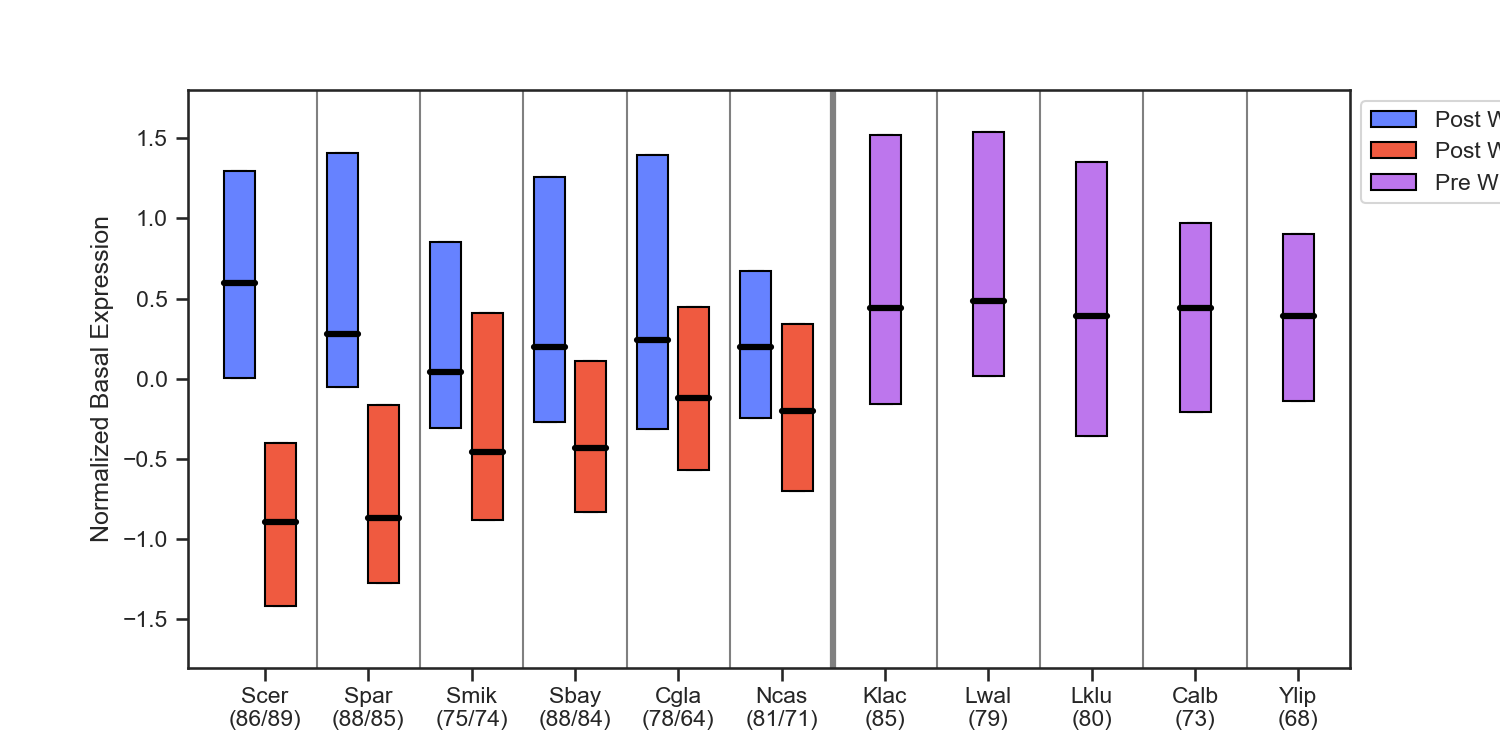

In [47]:
#Plot mean and variance of raw expressionfor each species 
#add text for total number of orthologs? 

fig_raw_exp_summary, ax_raw_exp_summary = plt.subplots(figsize=(10,5))
bw = 0.3
margin = 0.1
spacer = bw/2 + margin
opacity = 0.8

seed_spec = 'Scer'
spec_order_post_WGH = ['Spar','Smik','Sbay', 'Cgla', 'Ncas']
spec_order_pre_WGH = ['Klac','Lwal','Lklu', 'Calb', 'Ylip']

spec_sets = {'Post WGH low' : [seed_spec] + spec_order_post_WGH, 
             'Post WGH high' : [seed_spec] + spec_order_post_WGH, 
             'Pre WGH' : spec_order_pre_WGH} 

colors = {'low': '#6682ff', 'high':'#ef5a40', 'Pre WGH': '#bd76ed'}
legend_label_dict = {'low': 'Post WGH low-induction', 
                 'high': 'Post WGH high-induction', 
                 'Pre WGH': 'Pre WGH'}
index = {'low':[],'high':[], 'Pre WGH':[]}
# data_mean = {'low':[],'high':[], 'Pre WGH':[]}
# data_std = {'low':[],'high':[], 'Pre WGH':[]}
data_N = {'low':{},
          'high':{}, 
          'Pre WGH':{}}
data = {'low':[],'high':[], 'Pre WGH':[]}
level_space = {'low':0.0, 'high': 0.5-margin}
label_order = []
label_ind = []

#all_conds = set(expression_data_df_pka_corr.columns)


#Post WGH Species
#assumes the same species sets are in both
jj = 0
for spec in spec_sets['Post WGH high']: 
    for level in ['low','high']:
        data_N[level][spec]=np.inf 
    
    label_ind.append(jj+0.5)    
    
    for level in ['low', 'high']:
        index[level].append(spacer + jj + level_space[level])
        column = raw_expression_data_df[spec + '_' + level]
        data[level].append(column[~column.isna()])
        #data_mean[level].append(column.mean())
        #data_std[level].append(column.std())
        N_spec_cond = sum(~(np.isnan(column)))
        N_spec_old = data_N[level][spec]
        data_N[level][spec] = min(N_spec_old, N_spec_cond)
    
    label_order.append(spec + '\n(' + str(data_N['low'][spec]) + '/' + str(data_N['high'][spec]) + ')')    
    jj = jj+1

#pre WGH Species
for spec in spec_sets['Pre WGH']: 
    label_ind.append(jj+0.5)

             
    index['Pre WGH'].append(jj+spacer+0.25)
    column = raw_expression_data_df[spec]
    data['Pre WGH'].append(column[~column.isna()])
    #data_mean['Pre WGH'].append(column.mean())
    #data_std['Pre WGH'].append(column.std())
    data_N['Pre WGH'][spec] = sum(~(np.isnan(column)))
    label_order.append(spec + '\n(' + str(data_N['Pre WGH'][spec]) + ')') 
    jj = jj+1


legend_handles = []
legend_labels = []
for subset_name, subset_data in data.items(): 
    
    raw_exp_bp = ax_raw_exp_summary.boxplot(subset_data, patch_artist=True, showfliers=False, 
                                          positions = index[subset_name], 
                                          widths = bw, whis = 0.0)
    kk=0
    for patch in raw_exp_bp['boxes']:
        patch.set(facecolor=colors[subset_name])  
        if kk == 0: 
            legend_handles.append(patch)
        kk = kk+1
    
    plt.setp(raw_exp_bp['medians'], color='black', linewidth=3)
    
    legend_labels.append(legend_label_dict[subset_name])


ymax = 1.8
ymin = -1.8
ax_raw_exp_summary.vlines([len(spec_sets['Post WGH high'])], ymin = ymin, ymax = ymax, colors = 'gray',linewidth=3)
ax_raw_exp_summary.vlines(list(range(len(spec_sets['Post WGH high']) + len(spec_sets['Pre WGH'])))[1:], ymin=ymin, ymax = ymax, colors = 'gray', linewidth = 1)
ax_raw_exp_summary.set_xticklabels(label_order)
ax_raw_exp_summary.set_xticks(label_ind)
ax_raw_exp_summary.set_ylim(ymin,ymax)
ax_raw_exp_summary.set_xlim(-0.25, len(label_ind))
ax_raw_exp_summary.set_ylabel('Normalized Basal Expression')
ax_raw_exp_summary.legend(legend_handles, legend_labels, bbox_to_anchor = (1.0,1.0), loc='upper left' )


fig_raw_exp_summary.savefig(os.path.normpath('C:/Users/BMH_work/Google Drive/UCSF/ElSamad_Lab/PKA/Manuscript/raw_exp_conservation_summary.svg'))

<IPython.core.display.Javascript object>


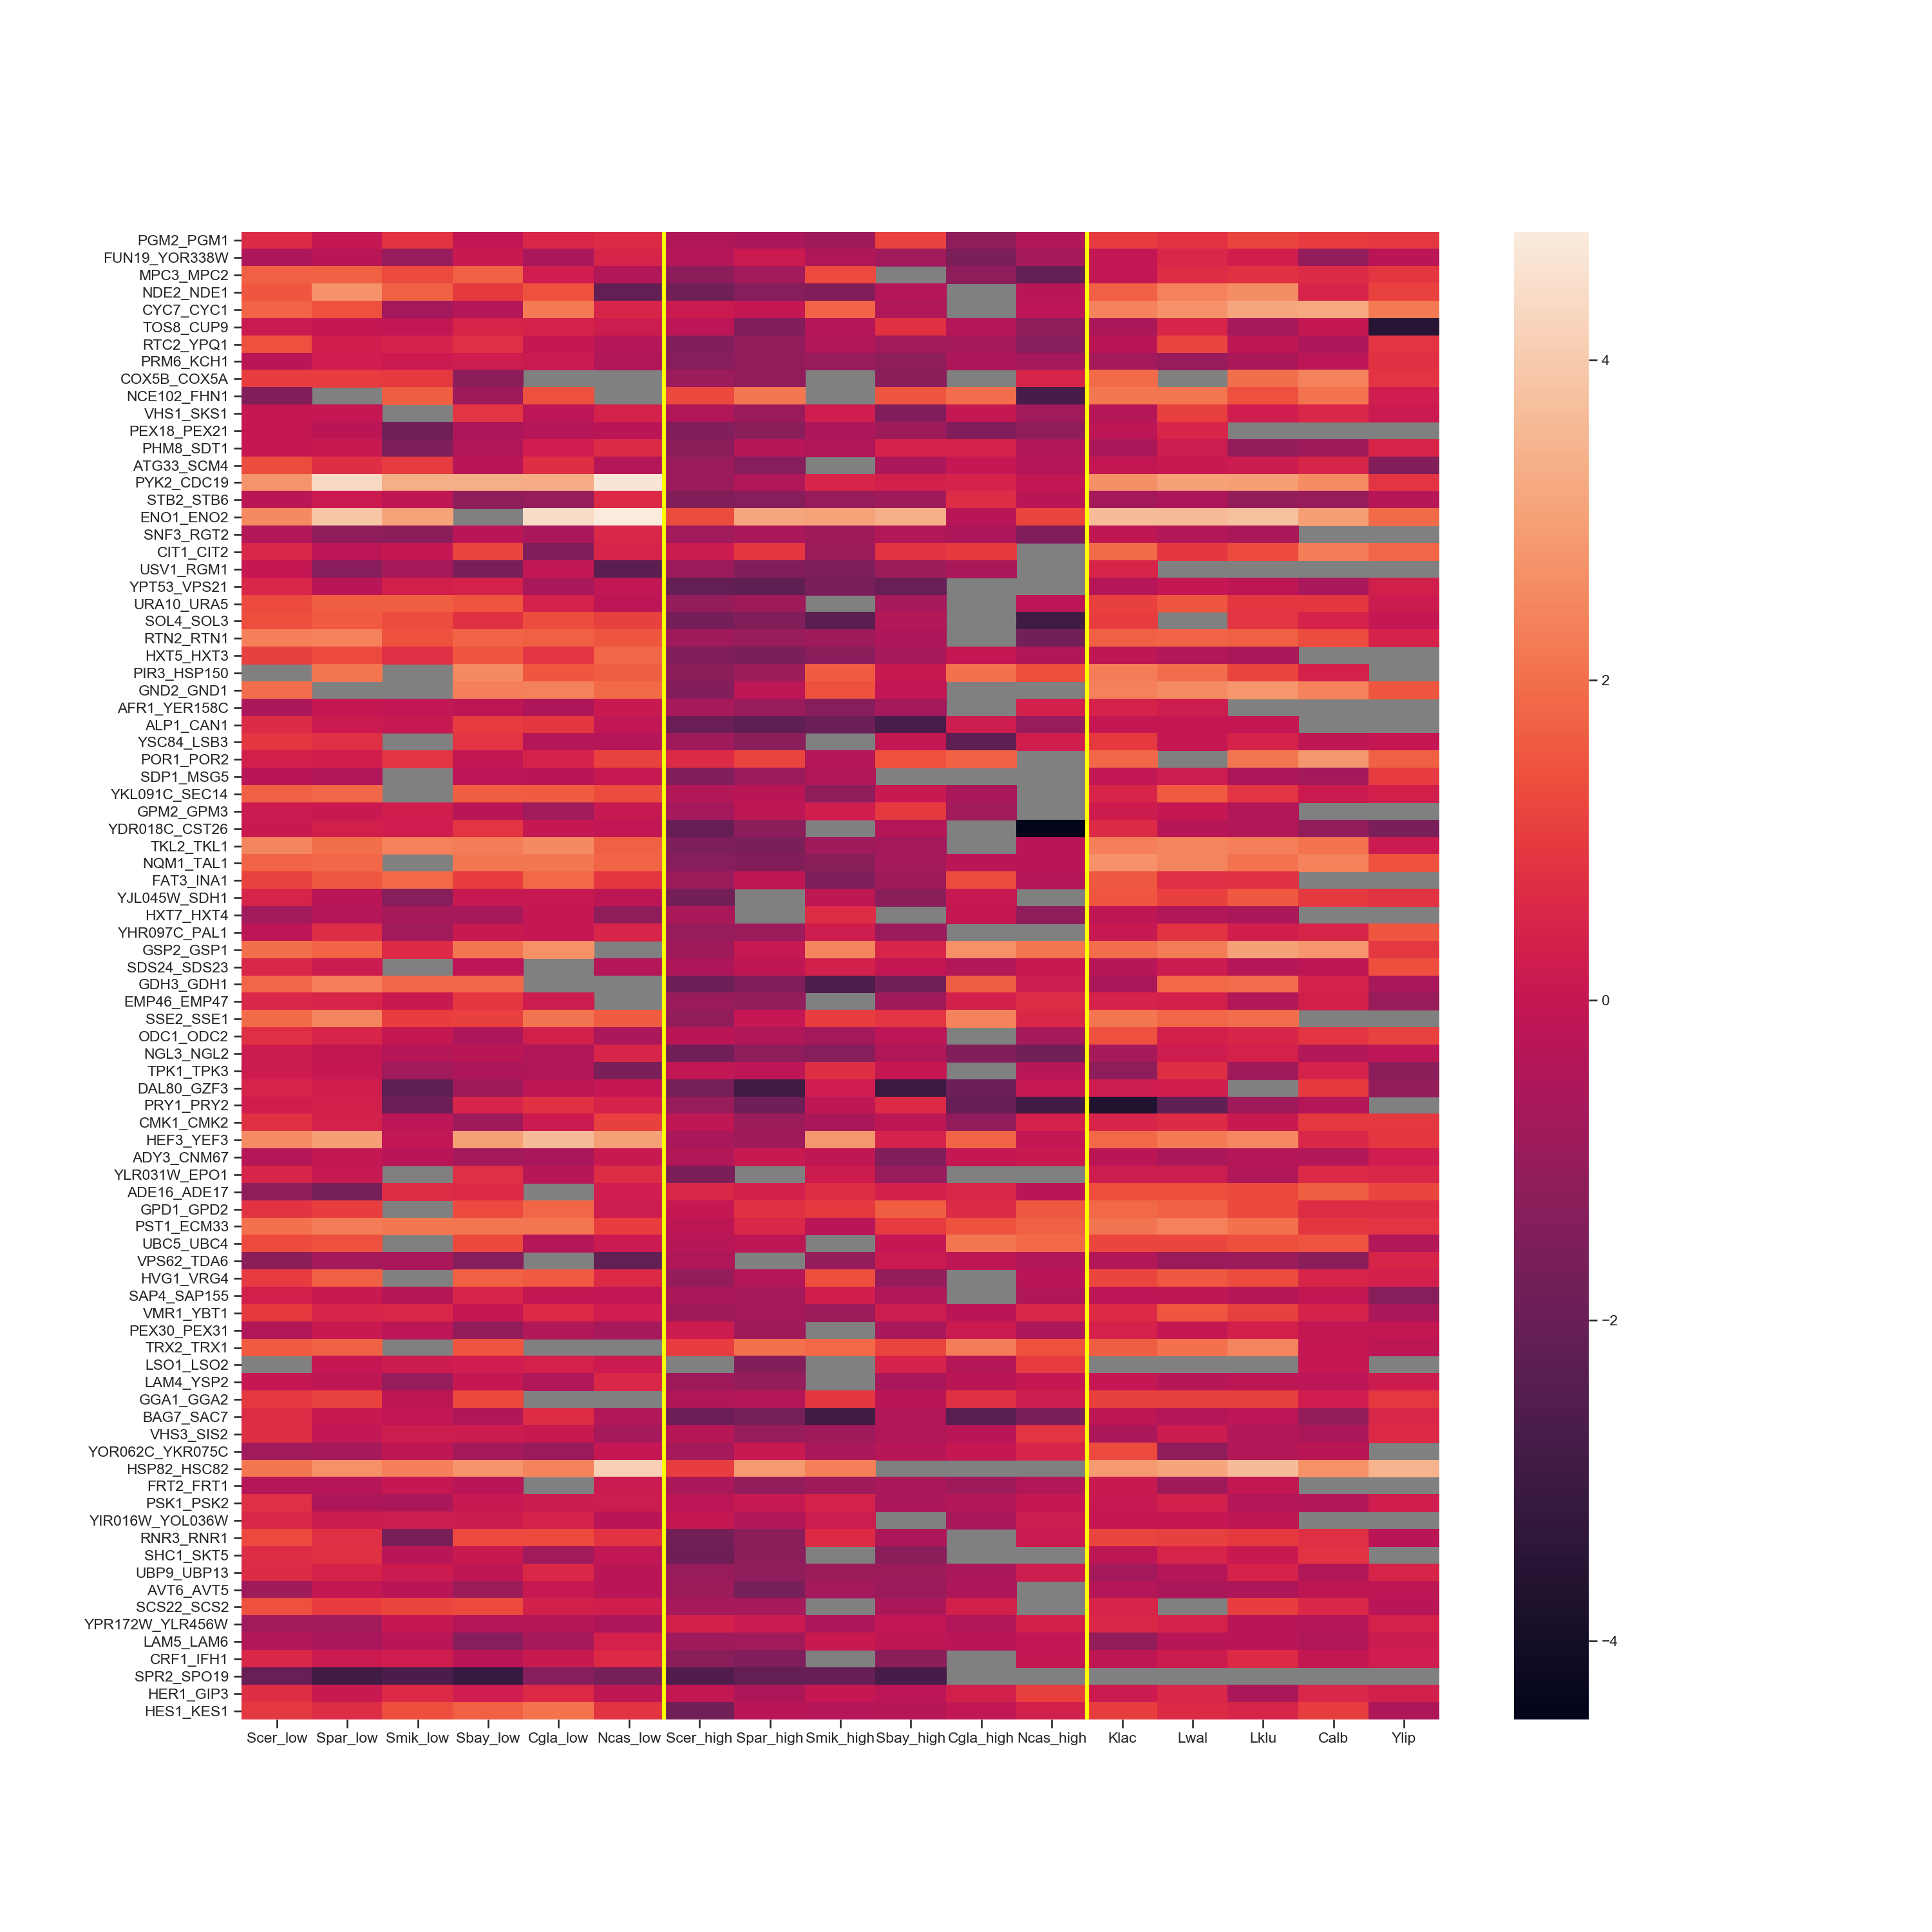

In [48]:
#heatmap using same order as sorted expression data: 

#Load expression_data_df_sorted 
expression_data_df_sorted = pd.read_csv(os.path.normpath(data_processing_dir + 'regev_data/20190204_expression_data_sorted.csv'),index_col=0)


#heatmap with no filters: 
fig_hmap_raw_sorted, ax_hmap_raw_sorted = plt.subplots(figsize=(20,20))
raw_expression_data_df_sorted = raw_expression_data_df.loc[expression_data_df_sorted.index,:]
sns.heatmap(raw_expression_data_df_sorted, ax=ax_hmap_raw_sorted)

ax_hmap_raw_sorted.set_facecolor('grey')
# ax_hmap_exp.set_xticks(new_ticks)
# ax_hmap_exp.set_xticklabels(new_tick_labels, rotation = 90)  #rotation=45, ha='right')
#ax_hmap_raw_sorted.vlines(sep_lines, ymin = 0, ymax = len(expression_data_df_pka_corr), colors = 'white')
ax_hmap_raw_sorted.vlines([len(spec_sets["Post WGH low"]), len(spec_sets["Post WGH low"]) + len(spec_sets["Post WGH high"])],
                          ymin = 0, ymax = len(raw_expression_data_df_sorted), colors = 'yellow',linewidth=3)

ax_hmap_raw_sorted.set_rasterized(True)    #Had to do this because .svg took ages on inkscape to work with
fig_hmap_raw_sorted.savefig(os.path.normpath('C:/Users/BMH_work/Google Drive/UCSF/ElSamad_Lab/PKA/Manuscript/raw_exp_conservation_all.svg'))

In [49]:
# #heatmap prior to clustering, but after filtering wierd species and rows with many NANs

# fig_hmap, ax_hmap = plt.subplots()

# #Filter out S.Cer because its distribution is so different
# #Filter out D.Han because there are so many NANs (probably an indexing problem in the ortholog/expression array set)
# raw_expression_data_df_spec_filter = raw_expression_data_df.drop(columns = ['Scer_low', 'Scer_high', 'Dhan'])

# #filter out a row if it has Ndrop or more missing orthologs
# inds_to_drop = []
# Ndrop = 5
# for ind, row in enumerate(raw_expression_data_df_spec_filter.values):
#      if sum(np.isnan(row)) >= Ndrop:
#         inds_to_drop.append(ind)
        
# rows_to_drop = raw_expression_data_df_spec_filter.index[inds_to_drop]
# print('Dropped the following Paralog Pairs because there were more than ' + str(Ndrop) + ' orthologs missing.')
# print(rows_to_drop)
# raw_expression_data_df_row_filter = raw_expression_data_df_spec_filter.drop(index=rows_to_drop)


# #sns.heatmap(raw_expression_data_df_row_filter)

In [50]:
# #Performs heirarchical clustering on filtered data.  Redraws histogram with clusters organized: 

# dm = spd.pdist(expression_data_df_row_filter.values, metric = io_library.correlation_nan_filt)
# row_cluster = sch.linkage(dm, method='average', optimal_ordering=True)    #might also try 'centroid', 'median', and 'ward'

# row_ind_reorder = sch.leaves_list(row_cluster)

# old_rows = expression_data_df_row_filter.index.tolist()
# new_rows = [old_rows[ind] for ind in row_ind_reorder]

# expression_data_df_reorder = expression_data_df_row_filter.reindex(new_rows)


# fig_hmfilt, ax_hmfilt = plt.subplots()
# sns.heatmap(expression_data_df_reorder, ax=ax_hmfilt)

# fig_dend, ax_dend = plt.subplots()
# sch.dendrogram(row_cluster, ax=ax_dend)

<IPython.core.display.Javascript object>


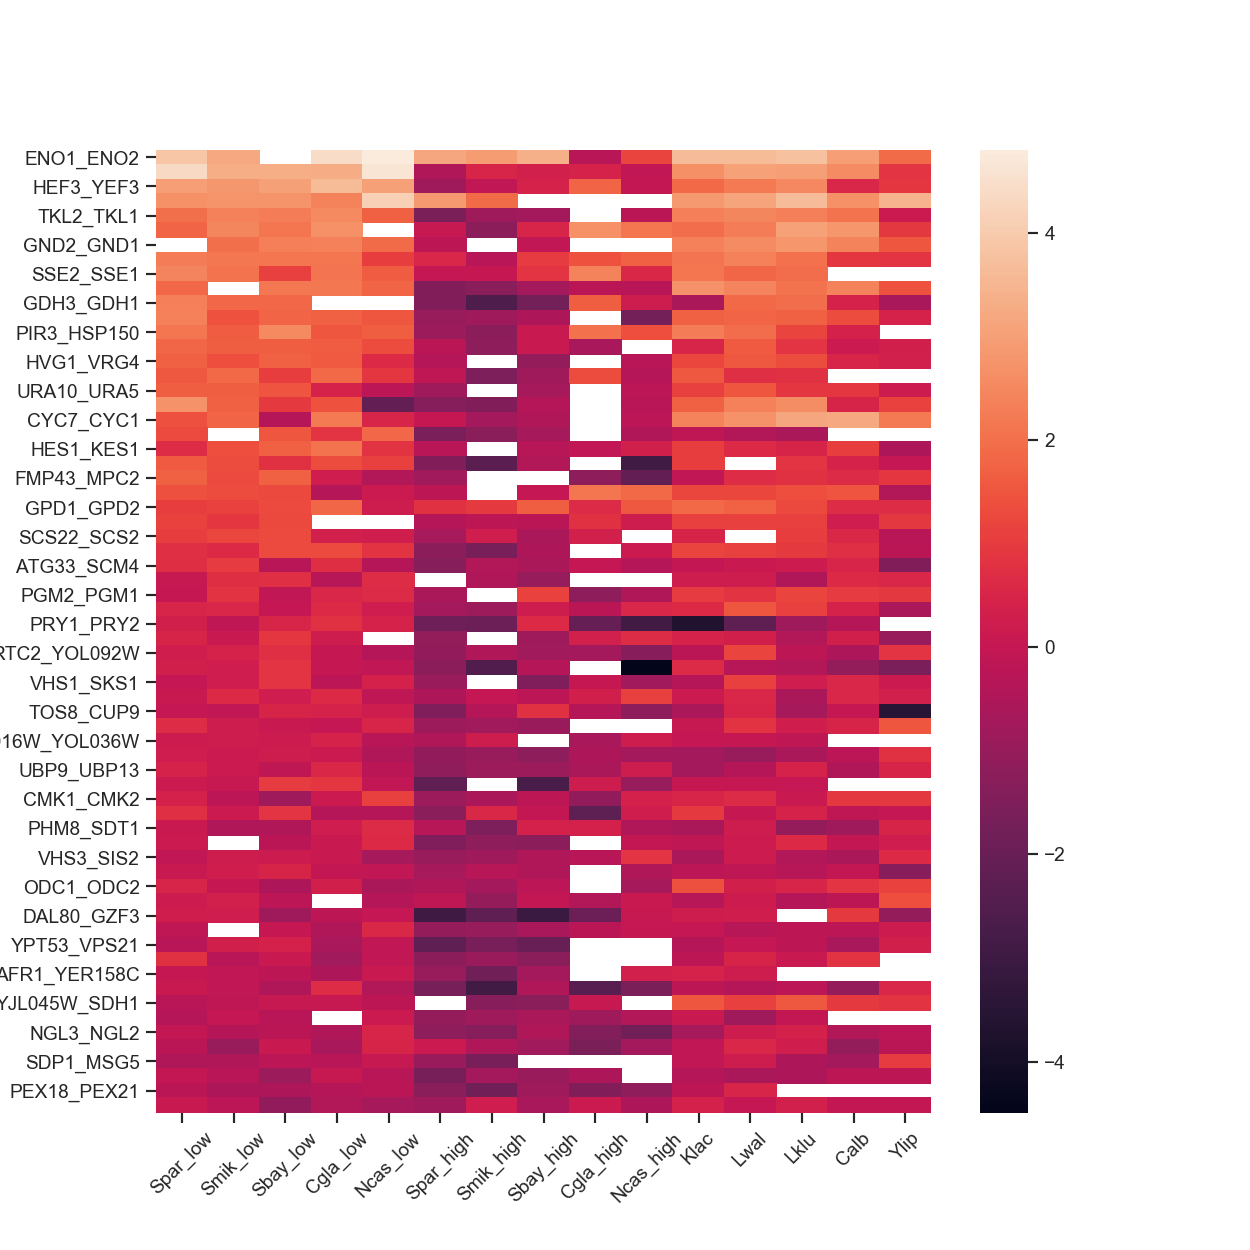

C:\Users\BMH_work\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



[Text(0.5,0,'Spar_low'),
 Text(1.5,0,'Smik_low'),
 Text(2.5,0,'Sbay_low'),
 Text(3.5,0,'Cgla_low'),
 Text(4.5,0,'Ncas_low'),
 Text(5.5,0,'Spar_high'),
 Text(6.5,0,'Smik_high'),
 Text(7.5,0,'Sbay_high'),
 Text(8.5,0,'Cgla_high'),
 Text(9.5,0,'Ncas_high'),
 Text(10.5,0,'Klac'),
 Text(11.5,0,'Lwal'),
 Text(12.5,0,'Lklu'),
 Text(13.5,0,'Calb'),
 Text(14.5,0,'Ylip')]

In [184]:
flat_clust = sch.fcluster(row_cluster,1.0, criterion='distance')

fig_clust2, ax_clust2 = plt.subplots(figsize=(10,10))

#pick data from a given cluster
cluster_no = 2
expression_data_clust = expression_data_df_row_filter[flat_clust==cluster_no]

#sort by average of the low columns
cols_to_avg = ['Spar_low', 'Smik_low', 'Sbay_low', 'Cgla_low', 'Ncas_low']
expression_data_clust_subset =  expression_data_clust.loc[:,cols_to_avg]
expression_data_clust['low_median'] = expression_data_clust_subset.median(axis=1)
expression_data_clust_sorted = expression_data_clust.sort_values(by='low_median', ascending=False)
hm = sns.heatmap(expression_data_clust_sorted.drop(columns = 'low_median') , ax=ax_clust2)
hm.set_xticklabels(hm.get_xticklabels(), rotation = 45)

In [198]:
flat_clust = sch.fcluster(row_cluster,1.0, criterion='distance')

fig_clust2, ax_clust2 = plt.subplots(figsize=(10,10))

#all data that is not in cluster 2
expression_data_clust = expression_data_df_row_filter[flat_clust != 2]

#sort by average of the low columns
cols_to_avg = ['Spar_low', 'Smik_low', 'Sbay_low', 'Cgla_low', 'Ncas_low']
expression_data_clust_subset =  expression_data_clust.loc[:,cols_to_avg]
expression_data_clust['low_median'] = expression_data_clust_subset.median(axis=1)
expression_data_clust_sorted = expression_data_clust.sort_values(by='low_median', ascending=False)
hm = sns.heatmap(expression_data_clust_sorted.drop(columns = 'low_median') , ax=ax_clust2)
hm.set_xticklabels(hm.get_xticklabels(), rotation = 45)

<IPython.core.display.Javascript object>

C:\Users\BMH_work\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



[Text(0.5,0,'Spar_low'),
 Text(1.5,0,'Smik_low'),
 Text(2.5,0,'Sbay_low'),
 Text(3.5,0,'Cgla_low'),
 Text(4.5,0,'Ncas_low'),
 Text(5.5,0,'Spar_high'),
 Text(6.5,0,'Smik_high'),
 Text(7.5,0,'Sbay_high'),
 Text(8.5,0,'Cgla_high'),
 Text(9.5,0,'Ncas_high'),
 Text(10.5,0,'Klac'),
 Text(11.5,0,'Lwal'),
 Text(12.5,0,'Lklu'),
 Text(13.5,0,'Calb'),
 Text(14.5,0,'Ylip')]

In [41]:
#Heirarchical cluster of genes with columns ordered as above to visualise ESR genes. 

#First filter out items with mostly NA values. 
kl_stress_nmpp1_data_filt = kl_stress_nmpp1_data_col_reorder.dropna(thresh=(len(kl_stress_nmpp1_data_col_reorder.columns)-1))

#Drop out PKA column for clustering
kl_stress_data = kl_stress_nmpp1_data_filt.drop('KL_PKA(AS)+1NMPP1', axis = 1)

kl_stress_data_nafill = kl_stress_data.fillna(0.0)
kl_stress_data_mat = kl_stress_data_nafill.as_matrix()

#fig3, ax_cm = plt.subplots()
#ax_cm = sns.clustermap(kl_stress_data_col_reorder_nafill,colcluster = False)
#ax_cm.ax_heatmap.tick_params(labelleft = 'off')

row_cluster = sch.linkage(kl_stress_data_mat, method='average')
row_ind_reorder = sch.leaves_list(row_cluster)

old_rows = kl_stress_nmpp1_data_filt.index.tolist()
new_rows = [old_rows[ind] for ind in row_ind_reorder]

kl_stress_nmpp1_data_filt_reorder = kl_stress_nmpp1_data_filt.reindex(new_rows)

fig3, ax3 = plt.subplots()
#ax3= sns.heatmap(kl_stress_nmpp1_data_filt_reorder)
# ax3 = plt.imshow(kl_stress_nmpp1_data_filt_reorder.as_matrix(), cmap='RdBu', vmin=z_min, vmax=z_max,
#            extent=[x.min(), x.max(), y.min(), y.max()],
#            interpolation='nearest', origin='lower')
ax3 = plt.imshow(-kl_stress_nmpp1_data_filt_reorder.as_matrix(), interpolation="nearest", aspect = 'auto', cmap = 'RdBu',vmin = -6, vmax = 6)
plt.axis('off')
plt.savefig('C:\Users\Ben\Google Drive\UCSF\ElSamad_Lab\Lab Meeting\\20161118\KL_genes.png')


0

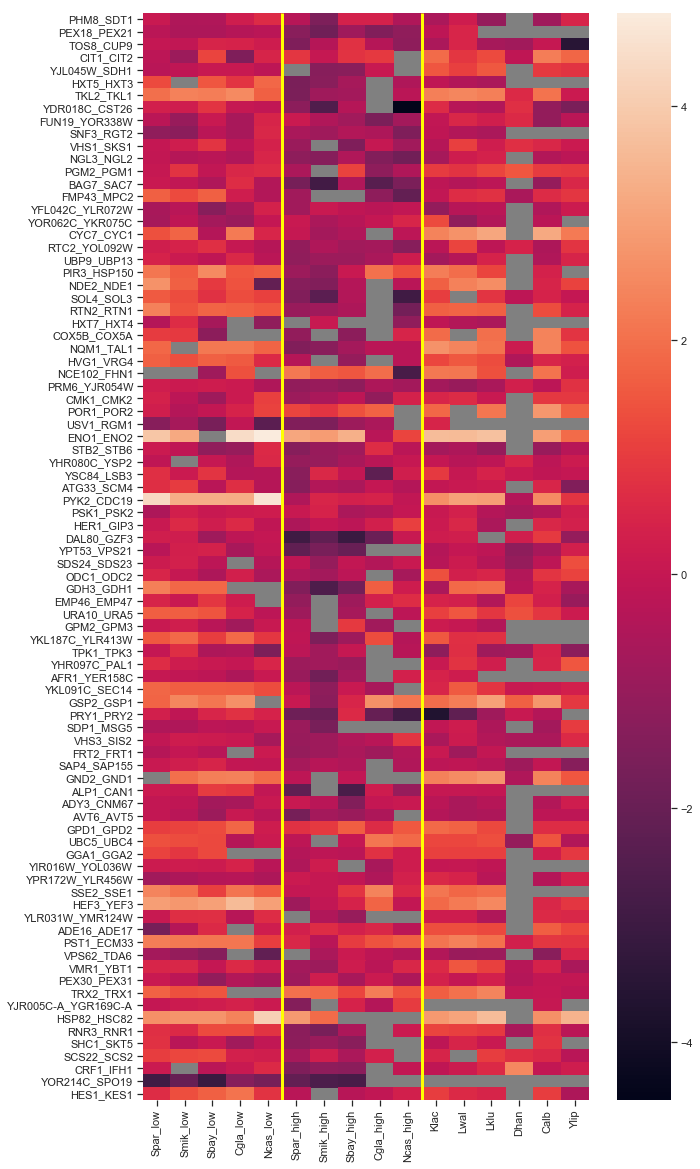

In [131]:
#visualize raw expression data from tsankov et al using order from gene induction conservation plot. 

fig_hmap_tsankov, ax_hmap_tsankov = plt.subplots(figsize=(10,20))

# #Filter out S.Cer because its distribution is so different
# #Filter out D.Han because there are so many NANs (probably an indexing problem in the ortholog/expression array set)
raw_expression_data_df_spec_filter = raw_expression_data_df.drop(columns = ['Scer_low', 'Scer_high'])  #, 'Dhan'])

# #filter out a row if it has Ndrop or more missing orthologs
# inds_to_drop = []
# Ndrop = 5
# for ind, row in enumerate(raw_expression_data_df_spec_filter.values):
#      if sum(np.isnan(row)) >= Ndrop:
#         inds_to_drop.append(ind)
        
# rows_to_drop = raw_expression_data_df_spec_filter.index[inds_to_drop]
# print('Dropped the following Paralog Pairs because there were more than ' + str(Ndrop) + ' orthologs missing.')
# print(rows_to_drop)
# raw_expression_data_df_row_filter = raw_expression_data_df_spec_filter.drop(index=rows_to_drop)

raw_expression_data_df_sorted = raw_expression_data_df_spec_filter.loc[expression_data_df_sorted.index,:]

sns.heatmap(raw_expression_data_df_sorted, ax=ax_hmap_tsankov)

ax_hmap_tsankov.set_facecolor('grey')

big_lines_tsankov = []
tick_tracker = 0
for column in raw_expression_data_df_sorted.columns:
    tick_tracker = tick_tracker + 1
    if column in {'Ncas_low', 'Ncas_high'}:
        big_lines_tsankov.append(tick_tracker)
ax_hmap_tsankov.vlines(big_lines_tsankov, ymin = 0, ymax = len(raw_expression_data_df_sorted), color = 'yellow', linewidth = 3)

fig_hmap_tsankov.savefig(os.path.normpath('C:/Users/BMH_work/Google Drive/UCSF/ElSamad_Lab/PKA/Manuscript/raw_exp_goi.svg'))

In [51]:
# #Attempt to cluser expression data

# #Performs heirarchical clustering on filtered data.  Redraws histogram with clusters organized: 

# columns_subset = []
# spec_set_name = 'Post WGH high'
# spec_set = spec_sets[spec_set_name]

# level = levels[spec_set_name]
# if level == '': 
#     level_sep = ''
# else: 
#     level_sep = '_'
# for spec in spec_set: 
#     spec_columns = [spec + '_' + condition + level_sep + level for condition in list(spec_conditions[spec])]
#     columns_subset = columns_subset + spec_columns

# expression_data_df_subset = expression_data_df_row_filter.loc[:,columns_subset]

# dm = spd.pdist(expression_data_df_subset.values, metric = io_library.correlation_nan_filt)
# row_cluster = sch.linkage(dm, method='average', optimal_ordering=True)    #might also try 'centroid', 'median', and 'ward'

# row_ind_reorder = sch.leaves_list(row_cluster)

# old_rows = expression_data_df_row_filter.index.tolist()
# new_rows = [old_rows[ind] for ind in row_ind_reorder]

# expression_data_df_reorder = expression_data_df_row_filter.reindex(new_rows)


# fig_hmfilt, ax_hmfilt = plt.subplots(figsize = (30,40))
# sns.heatmap(expression_data_df_reorder, ax=ax_hmfilt)

# fig_dend, ax_dend = plt.subplots()
# sch.dendrogram(row_cluster, ax=ax_dend)




In [151]:
# # Attempt to cluster induction data
# flat_clust = sch.fcluster(row_cluster,0.8, criterion='distance')

# fig_clust2, ax_clust2 = plt.subplots(figsize=(10,10))

# #pick data from a given cluster
# cluster_no = 3
# expression_data_clust = expression_data_df_row_filter[flat_clust==cluster_no]

# #sort by average of the Scer_columns in the high level

# #sort_columns

# level = 'high'
# level_sep = '_'
# spec = 'Scer'
# cols_to_avg = [spec + '_' + condition + level_sep + level for condition in list(spec_conditions[spec])]

# expression_data_clust_subset =  expression_data_clust.loc[:,cols_to_avg]
# expression_data_clust['high_scer_median'] = expression_data_clust_subset.median(axis=1)
# expression_data_clust_sorted = expression_data_clust.sort_values(by='high_scer_median', ascending=False)
# hm = sns.heatmap(expression_data_clust_sorted.drop(columns = 'high_scer_median') , ax=ax_clust2)
# hm.set_xticklabels(hm.get_xticklabels(), rotation = 45)

In [ ]:

#Smik missing mapping from ygob names to Regev lab orthogroups.  C.Gla mapping for Sec14 seems better with orthogroups than YGOB
#Going to start with orthogroup mapping from Regev lab for all of them. 
#K.Lac had a major discrepancy with annotation in regev lab data.   

#Species that have a column on the pillars file: 'Klac, Lwal, Lklu, Scer, Smik, Cgla, Ncas'
#Should also do one with Pillars orthologs

# Plot for a single gene (example was MPC2/MPC3) 

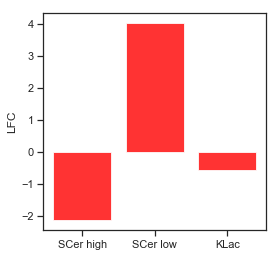

In [49]:
fig, ax = plt.subplots(figsize=(4,4))

sc_kl_mpc23_data = ohnologs_goi_kl_data[ohnologs_goi_kl_data['SC_common_name_low']=='MPC2'].loc[:,['log2FoldChange_low','log2FoldChange_high','log2FoldChange_KL']]

bar_width = 0.8
opacity = 0.8

ax.bar([0,1,2],sc_kl_mpc23_data.values[0], bar_width,
                             alpha=opacity,
                             color='red',
                             label='test') 
#                              #bottom = bottom)

#     if kk==2: 
#         ax.set_xlabel('Species')
ax.set_ylabel('LFC')
#     ax.set_ylim(-4,8)
#     ax.set_title(spec_set_name)
ax.set_xticks([0,1,2])
ax.set_xticklabels(['SCer high', 'SCer low', 'KLac'])

fig.savefig(os.path.normpath('C:/Users/BMH_work/Google Drive/UCSF/ElSamad_Lab/PKA/Manuscript/MPC23_LFC.svg'))


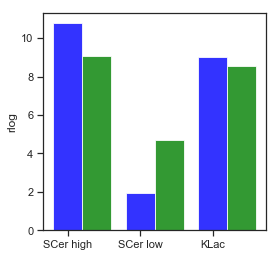

In [48]:
fig, ax = plt.subplots(figsize=(4,4))

bar_width = 0.4
opacity = 0.8
condition_mult = {'cont':0, 'drug': 1}
colors = {'cont': 'blue', 'drug': 'green'}
#Rlog values
sc_kl_mpc23_exp_data = {}
for condition in ['cont', 'drug']: 
    columns_to_view = ['AS_WT_' + condition + '_mean_' + spec_set  for spec_set in ['low', 'high', 'kl']]
    sc_kl_mpc23_exp_data[condition] = ohnologs_goi_rlog[ohnologs_goi_rlog['SC_common_name_low']=='MPC2'].loc[:,columns_to_view]
    
    ax.bar(np.array([0,1,2])+condition_mult[condition]*bar_width,
           sc_kl_mpc23_exp_data[condition].values[0], bar_width,
                 alpha=opacity,
                 color=colors[condition],
                 label=condition) 
    #                              #bottom = bottom)

#     if kk==2: 
#         ax.set_xlabel('Species')
ax.set_ylabel('rlog')
#     ax.set_ylim(-4,8)
#     ax.set_title(spec_set_name)
ax.set_xticks([0,1,2])
ax.set_xticklabels(['SCer high', 'SCer low', 'KLac'])
    
fig.savefig(os.path.normpath('C:/Users/BMH_work/Google Drive/UCSF/ElSamad_Lab/PKA/Manuscript/MPC23_rlog.svg'))


# Look for DE sets using regev data in all species. 

In [134]:
#Load GOI ohnolog data

fname = data_processing_dir + os.sep + os.path.normpath('kl_sc_PKA_as_m24_r1g1_20181017/gois_20181205.pkl')

with open(fname, 'rb') as file:
    [ohnologs_goi_pka,ohnologs_expression_sorted_pka,goi_criteria_pka] = pickle.load(file)
ohnologs_goi_pka.set_index('Ancestor', inplace=True)
ohnologs_expression_sorted_pka.set_index('Ancestor', inplace=True)

In [135]:
spec = 'Scer'
columns_to_combine = {'PS/LOG', 'PLAT/LOG', 'DS/LOG', 'heat shock_30', 'heat shock_45'}

#Pick differentially expressed paralogs (using average / individual conditions)
min_high_lfc = 1.8  # Minimum LFC for the high activation paralog
lfc_diff = 1.8 # Difference in LFC to call a differentially expressed paralog
max_low_lfc = 1.6 # Maximum LFC that low activation paralog can have.  I get a ~20 more if I use 2.5 as the cutoff

goi_criteria = {'min_high_lfc': min_high_lfc, 'lfc_diff': lfc_diff, 'max_low_lfc' : max_low_lfc}

ohnologs_goi, ohnologs_sorted, goi_criteria = io_library.de_stress_gois(spec, columns_to_combine, goi_criteria)
    
plt.scatter(ohnologs_sorted['PKAest_low'], ohnologs_sorted['PKAest_high'])


#Save list and all sorted ohnolog dataframe as well
fname = data_processing_dir + os.path.normpath('kl_sc_PKA_as_m24_r1g1_20181017/gois_' + spec + '_PKAest_20190123.pkl')

with open(fname, 'wb') as file:
    pickle.dump([ohnologs_goi,ohnologs_sorted,goi_criteria], file)
                                          
ohnologs_goi

83 differentially expressed genes identified


genename_low  DS/LOG_low  LAG/LOG_low  LL/LOG_low  PLAT/LOG_low  \
anc                                                                         
Anc_7.436      YBL101C    1.398995    -0.555903    0.603228      1.277380   
Anc_5.644      YOR047C   -0.751063     0.980541   -0.190445     -2.031706   
Anc_5.318      YDR300C   -1.132156     0.419166   -0.655837     -1.874126   
Anc_7.420      YBL089W    0.035900     0.269971   -0.077866      0.182497   
Anc_5.370      YDR326C   -0.333764     0.245690   -0.207697     -0.588380   
Anc_5.394      YHR092C    2.982318    -0.409223    2.284524     -2.756355   
Anc_5.395      YHR094C   -2.972693     3.125913   -2.940160     -3.854962   
Anc_5.399      YDR348C   -0.141805     0.308081   -0.081329      0.053783   
Anc_5.416      YHR108W   -0.218736    -1.772663    0.063698     -0.875102   
Anc_5.434      YDR368W    0.866420    -2.184184    0.654700      0.447525   
Anc_5.471      YDR389W   -0.532657     0.335058   -0.409748     -0.317277   
Anc_7.390      YBL067C   -0.791653    -0.806420   -0.661132     -0.460935   
Anc_1.482      YJR048W    1.294435    -1.186582    0.604370      1.662653   
Anc_3.517      YER027C    0.633589    -1.627788    0.491440     -0.013239   
Anc_3.536      YGL224C    0.121256     0.114367    0.811837     -0.593352   
Anc_7.273      YIL074C    0.612584    -0.539867    0.877410     -1.240920   
Anc_8.2        YFL048C   -0.182686    -0.726561   -0.054716     -0.684750   
Anc_8.56       YFL018C    0.879555    -1.927868    0.421504      1.632721   
Anc_1.363      YOL024W   -0.497240    -1.462105   -0.945186     -0.277972   
Anc_1.356    YFR024C-A    0.497302    -2.486176    0.275936      0.194434   
Anc_3.581      YGL253W    0.313407    -1.984032   -0.006637     -5.092161   
Anc_6.170      YPL177C    0.547303    -0.792731    0.790199      1.030379   
Anc_6.208      YGL075C   -0.453750    -0.593288   -0.463199     -0.855526   
Anc_4.188      YLR354C    1.104807    -1.462104    0.624114      0.155279   
Anc_4.191      YGR049W   -0.321787    -1.617323    0.035064      0.359196   
Anc_4.219      YLR371W    0.315081     0.184200    0.093322      0.722362   
Anc_5.83       YHR162W   -0.374033     0.337398   -0.289132     -0.328078   
Anc_5.78       YHR163W   -0.246279    -2.001953    0.018172     -2.178279   
Anc_5.62       YHR174W   -1.496455    -0.965028    0.428295     -3.603112   
Anc_5.55       YHR183W    0.782000    -1.943692    0.436396     -1.666240   
...                ...         ...          ...         ...           ...   
Anc_8.590      YPL106C   -1.016315    -0.182392   -0.412567     -3.602257   
Anc_8.862      YML125C   -1.267950     0.063314   -0.554473     -2.309448   
Anc_8.850      YMR285C   -0.396362     0.902532   -0.148496     -0.254954   
Anc_8.827      YML106W   -1.042503     0.096202   -0.329002     -1.608247   
Anc_8.813      YMR261C    1.742291    -3.826062    1.099685      0.565024   
Anc_6.42       YOL011W   -0.272348    -0.025033    0.617335      0.104003   
Anc_6.256      YMR182C   -0.167261     1.427312   -0.787729      0.107073   
Anc_7.69       YOR324C   -0.329901     1.124629   -0.418569      0.178366   
Anc_6.107      YGL056C   -0.664359     0.247868   -0.737460      0.913687   
Anc_3.37       YNL309W   -0.453294     0.086284   -0.149298      0.263188   
Anc_6.155      YGL104C    1.603904    -1.627878    0.884228      1.139452   
Anc_2.196      YOR089C    0.230454     0.352188    0.129042      0.560058   
Anc_7.121      YOL036W   -0.425049     0.761025   -0.293566      0.358631   
Anc_5.500      YOR153W   -1.217204     0.311338   -0.324364     -2.190925   
Anc_8.614      YOR204W   -1.038508     0.066045   -0.514408     -2.544713   
Anc_8.644      YOR222W   -0.548028    -0.008890   -0.021360     -1.252899   
Anc_8.648      YPL137C   -0.277191     1.929139   -0.019957     -0.747897   
Anc_1.17       YCL050C   -0.450496    -1.024778   -0.032072     -2.392667   
Anc_7.86       YOL045W   -0.420018     0.976478   -0.362505     -0.344675   
Anc_6.

Differentially expressed ohnologs were chosen according to four criteria: 
    1) The minimum fold change for the activated paralog was greater than high_min = 2.0. 
    2) The maximum fold change of the low paralog was less than low_max= 1.5. 
    3) There was a difference of at least diff_min= 2.0 in LFC between the high and low paralog

In [137]:
#venn2([set(ohnologs_goi_pka.index),set(ohnologs_goi.index)])
#venn2([set(ohnologs_expression_sorted_pka.index),set(ohnologs_sorted.index)], set_labels=['pka_inh', 'regev_data'])
pka_not_regev = set(ohnologs_expression_sorted_pka.index)-set(ohnologs_sorted.index)
regev_not_pka = set(ohnologs_sorted.index) - set(ohnologs_expression_sorted_pka.index)
print('There are ' + str(len(pka_not_regev)) + ' genes in my RNA seq data that are not in the regev data. There are ' + 
      str(len(regev_not_pka)) + ' genes in the regev data that are not in my RNA seq data')

There are 7 genes in my RNA seq data that are not in the regev data. There are 33 genes in the regev data that are not in my RNA seq data


In [138]:
ohnologs_goi_pka_trimmed = ohnologs_goi_pka.loc[(set(ohnologs_goi_pka.index) - pka_not_regev),:]
print('Trimmed ' + str(len(ohnologs_goi_pka)-len(ohnologs_goi_pka_trimmed)) + ' ohnolog pairs from pka goi')

ohnologs_goi_trimmed = ohnologs_goi.loc[(set(ohnologs_goi.index) - regev_not_pka),:]
print('Trimmed ' + str(len(ohnologs_goi)-len(ohnologs_goi_trimmed)) + ' ohnolog pairs from regev goi')

#venn2([set(ohnologs_goi_pka_trimmed.index),set(ohnologs_goi_trimmed.index)], set_labels=['DE_PKA', 'DE_stress'])

Trimmed 5 ohnolog pairs from pka goi
Trimmed 3 ohnolog pairs from regev goi


In [141]:
#superimpose goi from regev data onto lfc data in S.Cer

#Separate into different groups: 

spec = 'Scer'

plot_subsets = {'all': ohnologs_expression_sorted_pka, 
                'DEpka': ohnologs_expression_sorted_pka.loc[ohnologs_goi_pka_trimmed.index,:],
                'DEstress_' + spec: ohnologs_expression_sorted_pka.loc[ohnologs_goi_trimmed.index,:]}


params =  {'all': {'color':'grey', 'alpha': 0.3},
           'DEpka': {'color':'red', 'alpha':0.4},
           'DEstress_' + spec: {'color':'blue', 'alpha':0.4}
          }
            


data = []


                                 
for subset_name, subset in plot_subsets.items():
                                 
    trace = pygo.Scatter(
                x = subset['log2FoldChange_low'], #-np.log10(deseq_data['padj_pkainh']), #
                y = subset['log2FoldChange_high'] ,
                text = subset['SC_common_name_high'] + ' ' + subset.index,
                mode = 'markers',
                marker = {'opacity': params[subset_name]['alpha'],
                          'color' : params[subset_name]['color'],
                          #'colorscale' : 'Jet',
                          #'showscale' : False}  #
                         },
                name = subset_name
                
                )
        
    data.append(trace)


layout = pygo.Layout(
    xaxis= {
        #"range":[-2, 20],
        "title":'LFC_low'
    },
    yaxis= {
        #"range":[-2, 20],
        "title":'LFC_high'
    }
)


fig = pygo.Figure(data=data, layout = layout)
py.iplot(fig, filename='PKA_vs_condition_DEstress_' + spec)

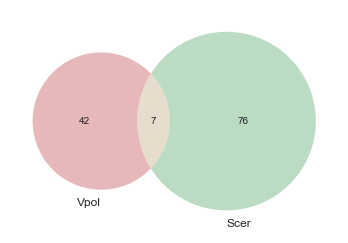

In [106]:
#Overlap of Vpol and SCer
venn2([set(ohnologs_goi_vpol.index),set(ohnologs_goi_scer.index)], set_labels=['Vpol', 'Scer'])

In [117]:
#what are the seven that overlap
ohnologs_goi_scer_vpol = ohnologs_goi_scer.loc[set(ohnologs_goi_vpol.index)&set(ohnologs_goi_scer.index), ['genename_low', 'genename_high']]
for level in ['low','high']: 
    ohnologs_goi_scer_vpol['SC_common_name_' + level] = io_library.SC_common_name_lookup(ohnologs_goi_scer_vpol['genename_'+level])

ohnologs_goi_scer_vpol.loc[:,['SC_common_name_low','SC_common_name_high']]

SC_common_name_low SC_common_name_high
anc                                             
Anc_3.372               TKL1                TKL2
Anc_5.396               HXT3                HXT5
Anc_2.445               PGM1                PGM2
Anc_2.418              ADE16               ADE17
Anc_2.113            YHR131C             YNL144C
Anc_7.69                FRT1                FRT2
Anc_3.244              CST26             YDR018C

In [109]:
#overlap of all WGH paralogs between species

ohnologs_vpol = io_library.get_WGH_pairs_by_spec('Vpol')
ohnologs_scer = io_library.get_WGH_pairs_by_spec('Scer')
venn2([set(ohnologs_vpol.index),set(ohnologs_scer.index)], set_labels=['Vpol', 'Scer'])

In [ ]:
#From S.Cer perspective, look at Gene expression conservation

#Might have data errors for YKL104C/YMR085W/YMR084W that is handled differently 
#between YGOB and regev lab paralogs. 

In [144]:
seed_spec = 'Scer'
sort_column = 'PKAest'

#Order that we view the species (minus S.Cer)
spec_order_post_WGH = [] #'Spar','Smik', 'Sbay','Suva','Cgla', 'Ncas','Vpol']
spec_order_pre_WGH = ['Klac','Lwal','Lklu','Dhan', 'Calb', 'Ylip','Sjap','Spom']

ohnologs_goi_array, spec_conditions = io_library.load_regev_data_gois(ohnologs_goi, sort_column, seed_spec, spec_order_post_WGH, spec_order_pre_WGH)

#Add SC_common_name_high, low and high_low columns to an ohnologs_file
#SC_common_name lookup function requires genename_low/high columns
for level in ['low', 'high']: 
    ohnologs_goi_array['genename_' + level] = ohnologs_goi_array[seed_spec + '_genename_' + level]
ohnologs_goi_array = io_library.SC_common_name_columns_ohnologs(ohnologs_goi_array, seed_spec)

# ohnologs_goi.reset_index(inplace=True)
# ohnologs_goi.set_index('SC_common_name_high_low', inplace=True)


YHR163W has NONE listed in ortholog file for Lwal
YIL114C has NONE listed in ortholog file for Lwal
YMR182C has NONE listed in ortholog file for Lwal
YIR037W has NONE listed in ortholog file for Lwal
YOL024W has NONE listed in ortholog file for Lklu
YMR182C has NONE listed in ortholog file for Lklu
YIR037W has NONE listed in ortholog file for Lklu
Mismatch between ortholog file and expression data index Dhan : DEHA0C01232g ELL/LOG
Mismatch between ortholog file and expression data index Dhan : DEHA0C01232g LAG/LOG
Mismatch between ortholog file and expression data index Dhan : DEHA0C01232g LL/LOG
Mismatch between ortholog file and expression data index Dhan : DEHA0C01232g LPS/LOG
Mismatch between ortholog file and expression data index Dhan : DEHA0C01232g PLAT/LOG
Mismatch between ortholog file and expression data index Dhan : DEHA0C01232g PS/LOG
Mismatch between ortholog file and expression data index Dhan : DEHA0A09834g ELL/LOG
Mismatch between ortholog file and expression data index

YLR413W has NONE listed in ortholog file for Dhan
Mismatch between ortholog file and expression data index Dhan : DEHA0G13970g ELL/LOG
Mismatch between ortholog file and expression data index Dhan : DEHA0G13970g LAG/LOG
Mismatch between ortholog file and expression data index Dhan : DEHA0G13970g LL/LOG
Mismatch between ortholog file and expression data index Dhan : DEHA0G13970g LPS/LOG
Mismatch between ortholog file and expression data index Dhan : DEHA0G13970g PLAT/LOG
Mismatch between ortholog file and expression data index Dhan : DEHA0G13970g PS/LOG
Mismatch between ortholog file and expression data index Dhan : DEHA0G08382g ELL/LOG
Mismatch between ortholog file and expression data index Dhan : DEHA0G08382g LAG/LOG
Mismatch between ortholog file and expression data index Dhan : DEHA0G08382g LL/LOG
Mismatch between ortholog file and expression data index Dhan : DEHA0G08382g LPS/LOG
Mismatch between ortholog file and expression data index Dhan : DEHA0G08382g PLAT/LOG
Mismatch between

YBL101C has NONE listed in ortholog file for Ylip
YHR092C has NONE listed in ortholog file for Ylip
YHR094C has NONE listed in ortholog file for Ylip
YOL024W has NONE listed in ortholog file for Ylip
YGL075C has NONE listed in ortholog file for Ylip
YDR345C has NONE listed in ortholog file for Ylip
YKR013W has NONE listed in ortholog file for Ylip
YLR413W has NONE listed in ortholog file for Ylip
YOL086C has NONE listed in ortholog file for Ylip
YPL106C has NONE listed in ortholog file for Ylip
YML125C has NONE listed in ortholog file for Ylip
YMR182C has NONE listed in ortholog file for Ylip
YOR324C has NONE listed in ortholog file for Ylip
YNL309W has NONE listed in ortholog file for Ylip
YGL104C has NONE listed in ortholog file for Ylip
YOL036W has NONE listed in ortholog file for Ylip
YOR153W has NONE listed in ortholog file for Ylip
YDL138W has NONE listed in ortholog file for Ylip
YOL056W has NONE listed in ortholog file for Ylip
YLR099C has NONE listed in ortholog file for Ylip


In [145]:
#Go through each of my GOIs and replace lists with single value for each item. 
#This is mainly to combine any values for genes that had a small scale duplication. 

# spec_order_post_WGH = ['Spar','Sbay','Smik','Suva', 'Cgla', 'Ncas','Vpol']
# spec_order_pre_WGH = ['Klac','Lwal','Lklu','Dhan', 'Calb', 'Ylip','Sjap','Spom']

spec_sets = {'Post WGH low' : ['Scer'] + spec_order_post_WGH, 
             'Post WGH high' : ['Scer'] + spec_order_post_WGH, 
             'Pre WGH' : spec_order_pre_WGH} 

expression_data_df = io_library.regev_ohnolog_expression_data_SSD_combine(ohnologs_goi_array,  spec_sets, spec_conditions, combine_method = 'mean')


In [148]:
#Plot mean and variance of gene expression for each species 
#add text for total number of orthologs? 

fig_induction, ax_induction = plt.subplots(figsize=(15,5))
bw = 0.08
margin = 0.04
opacity = 0.8

spec_sets = {'Post WGH low' : ['Scer'] , 
             'Post WGH high' : ['Scer'] , 
             'Pre WGH' : spec_order_pre_WGH} 

colors = {'low': '#a8d6f4', 'high':'#ef5a40', 'Pre WGH': '#bd76ed'}
legend_label_dict = {'low': 'Post WGH low-induction', 
                 'high': 'Post WGH high-induction', 
                 'Pre WGH': 'Pre WGH'}
index = {'low':[],'high':[], 'Pre WGH':[]}
data_mean = {'low':[],'high':[], 'Pre WGH':[]}
data_std = {'low':[],'high':[], 'Pre WGH':[]}
data_N = {'low':{},
          'high':{}, 
          'Pre WGH':{}}
data = {'low':[],'high':[], 'Pre WGH':[]}
level_space = {'low':0.0, 'high':0.5}
label_order = []
label_ind = []

conds_pka_corr = ['DS/LOG', 'PS/LOG', 'PLAT/LOG','heat shock_030', 'heat shock_045']



all_conds = set(expression_data_df.columns)


#Post WGH Species
#assumes the same species sets are in both
jj = 0
spacer = bw/2 + margin
for spec in spec_sets['Post WGH high']: 
    for level in ['low','high']:
        data_N[level][spec]=np.inf 
    label_ind.append(jj+0.5)
    for kk, cond_base in enumerate(conds_pka_corr): 
        if spec + '_' + cond_base + '_high' in all_conds: 
            for level in ['low', 'high']:
                index[level].append(spacer + jj+bw*kk +level_space[level])
                column = expression_data_df[spec + '_' + cond_base + '_' + level]
                data[level].append(column[~column.isna()])
                #data_mean[level].append(column.mean())
                #data_std[level].append(column.std())
                N_spec_cond = sum(~(np.isnan(column)))
                N_spec_old = data_N[level][spec]
                data_N[level][spec] = min(N_spec_old, N_spec_cond)
    label_order.append(spec + '\n(' + str(data_N['low'][spec]) + '/' + str(data_N['high'][spec]) + ')')  
    jj = jj+1

#pre WGH Species
#assumes the same species sets are in both
for spec in spec_sets['Pre WGH']: 
    data_N['Pre WGH'][spec]=np.inf
    label_ind.append(jj+0.5)    
    for kk, cond_base in enumerate(conds_pka_corr): 
        if spec + '_' + cond_base in all_conds: 
            index['Pre WGH'].append(spacer + 0.25 + jj+bw*kk)
            column = expression_data_df[spec + '_' + cond_base]
            data['Pre WGH'].append(column[~column.isna()])
            #data_mean['Pre WGH'].append(column.mean())
            #data_std['Pre WGH'].append(column.std())
            N_spec_cond = sum(~(np.isnan(column)))
            N_spec_old = data_N['Pre WGH'][spec]
            data_N['Pre WGH'][spec] = min(N_spec_old, N_spec_cond)   
    label_order.append(spec + '\n(' + str(data_N['Pre WGH'][spec]) + ')')    
    jj = jj+1
    

legend_handles = []
legend_labels = []
for subset_name in ['low', 'high', 'Pre WGH']: 
    
    subset_data = data[subset_name]
    
    induction_bp = ax_induction.boxplot(subset_data, patch_artist=True, showfliers=False, 
                                          positions = index[subset_name], 
                                          widths = bw, 
                                          whis = 0.0
                                       )
    jj = 0
    for patch in induction_bp['boxes']:
        patch.set(facecolor=colors[subset_name])  
        if jj == 0: 
            legend_handles.append(patch)
        jj = jj+1
        
    plt.setp(induction_bp['medians'], color='black', linewidth=2.0)
    
    legend_labels.append(legend_label_dict[subset_name])
    
#     induction_plot = ax_induction.bar(index[subset_name],subset_data, bw,
#                  alpha=opacity,
#                  color=colors[subset_name],
#                  label=legend_labels[subset_name], 
#                  yerr = data_std[subset_name]) 
#                  #bottom = bottom)

ymax = 5.0
ymin = -2.0
ax_induction.vlines([len(spec_sets['Post WGH high'])], ymin = ymin, ymax = ymax, colors = 'gray',linewidth=3)
ax_induction.vlines(list(range(len(spec_sets['Post WGH high']) + len(spec_sets['Pre WGH'])))[1:], ymin=ymin, ymax = ymax, colors = 'gray', linewidth = 1)
ax_induction.set_xticklabels(label_order)
ax_induction.set_xlim(0, len(spec_sets['Post WGH high']) + len(spec_sets['Pre WGH']))
ax_induction.set_xticks(label_ind)
ax_induction.set_ylim(ymin,ymax)
ax_induction.set_xlim(-0.1, len(label_ind))
ax_induction.set_ylabel('Normalized Relative Expression')
ax_induction.legend(legend_handles, legend_labels )

#fig_induction.savefig(os.path.normpath('/home/heineike/scratch/induction_conservation_summary.svg'))

In [33]:
# Organize species conditions by a given vector of all possible conditions
spec_order_post_WGH = [] #['Spar','Sbay','Smik','Suva', 'Cgla', 'Ncas','Vpol']
spec_order_pre_WGH = ['Klac','Lwal','Lklu','Dhan', 'Calb', 'Ylip','Sjap','Spom']

spec_sets = {'Post WGH low' : ['Scer'] + spec_order_post_WGH, 
             'Post WGH high' : ['Scer'] + spec_order_post_WGH, 
             'Pre WGH' : spec_order_pre_WGH} 

#filter out a row if it has Ndrop or more missing values
inds_to_drop = []
Ndrop = 130
for ind, row in enumerate(expression_data_df.values):
    if sum(np.isnan(row)) >= Ndrop:
        inds_to_drop.append(ind)
        
rows_to_drop = expression_data_df.index[inds_to_drop]
print('Dropped the following Paralog Pairs because there were more than ' + str(Ndrop) + ' orthologs missing.')
print(rows_to_drop)
expression_data_df_row_filter = expression_data_df.drop(index=rows_to_drop)

#Sort dataset by how long high expression for a PKA estimate column (PKAest) is retained in the high paralog in post WGH high gene
#Sort out rows by whether the averaged "PKAest" or PKA estimate columns are above a threshold.  
#Sort by the species farthes from original species first (so top row will be most conserved)

columns_to_combine = {'PS/LOG', 'PLAT/LOG', 'DS/LOG', 'heat shock_30', 'heat shock_45'}
    
#threshold for induction using the average of the combined columns that make up the PKA inhibition estimate.  
#All data is normalized already
induced_thresh = 2.5

expression_data_df_sorted = io_library.sort_conservaton_by_col_avg(expression_data_df_row_filter, spec_sets['Post WGH high'], columns_to_combine, induced_thresh )

#Sort conditions by defined order
all_conds = ['LAG/LOG','LL/LOG','ELL/LOG','DS/LOG','EPS/LOG','PS/LOG','LPS/LOG','PLAT/LOG',
     'NaCl_005',
     'NaCl_015',
     'NaCl_030',
     'NaCl_060', 
     'heat shock_005',
     'heat shock_015',
     'heat shock_030',
     'heat shock_045',
     'heat shock_060',
     'hydrogen peroxide_005',
     'hydrogen peroxide_015',
     'hydrogen peroxide_030',
     'hydrogen peroxide_060']

new_col_order = io_library.sort_regev_stress_conditions(all_conds, spec_sets, expression_data_df)

#add back in the new column order and drop out the extra columns that were added
expression_data_df_sorted = expression_data_df_sorted.loc[:,new_col_order]

fname_exp_data_sorted = os.path.normpath(data_processing_dir + 'regev_data/20190130_expression_data_DE_stress_' + seed_spec +'_sorted.csv')
expression_data_df_sorted.to_csv(fname_exp_data_sorted)

Dropped the following Paralog Pairs because there were more than 130 orthologs missing.
Index([], dtype='object')


In [52]:
#heatmap after filtering and sorting

fig_hmap_exp, ax_hmap_exp = plt.subplots(figsize=(20,20))

#Make subset that only has columns with appropriate conditions:
conds_pka_corr = ['DS/LOG', 'PS/LOG', 'PLAT/LOG',
                    'heat shock_030', 'heat shock_045']

new_columns = []
for column in expression_data_df_sorted.columns: 
    pass_test = False
    for cond in conds_pka_corr:
        if cond in column: 
            pass_test=True

    if pass_test:
        new_columns.append(column)
        
expression_data_df_pka_corr = expression_data_df_sorted.loc[:,new_columns]    
   

#Make labels for each species, and separate out pre/post WGH and post WGH high/low with yellow lines
N_spec_level = {}

label_order = []
for level in ['low','high']:
    for spec in spec_sets['Post WGH ' + level]:
        label = spec + '_' + level
        N_spec_level[label] = 0
        label_order.append(label)
for spec in spec_sets['Pre WGH']: 
    label = spec
    N_spec_level[label] = 0 
    label_order.append(label)


for column in expression_data_df_pka_corr.columns: 
    spec = column.split('_')[0]
    if spec in set(spec_sets['Post WGH low']):
        level_sep = '_'
        level = column.split('_')[-1]
    else: 
        level_sep = ''
        level = ''
    label = spec + level_sep + level
    N_spec_level[label] = N_spec_level[label] + 1
    
new_ticks = []
sep_lines = [0]
new_tick_labels = []
big_lines = []
tick_tracker = 0
for label in label_order:
    N_tick_dist = N_spec_level[label]
    new_ticks.append(tick_tracker + N_tick_dist/2)
    new_tick_labels.append(label)
    sep_lines.append(tick_tracker + N_tick_dist)
    #new_tick_labels.append('')
    tick_tracker = tick_tracker + N_tick_dist
    if label in {'Vpol_low', 'Vpol_high'}:
        big_lines.append(tick_tracker)



sns.heatmap(expression_data_df_pka_corr, center = 0.0, xticklabels=False, ax = ax_hmap_exp)
ax_hmap_exp.set_facecolor('grey')
ax_hmap_exp.set_xticks(new_ticks)
ax_hmap_exp.set_xticklabels(new_tick_labels, rotation = 90)  #rotation=45, ha='right')
ax_hmap_exp.vlines(sep_lines, ymin = 0, ymax = len(expression_data_df_pka_corr), colors = 'white')
ax_hmap_exp.vlines(big_lines, ymin = 0, ymax = len(expression_data_df_pka_corr), colors = 'yellow',linewidth=3)
ax_hmap_exp.set_rasterized(True)    #Had to do this because .svg took ages on inkscape to work with
fig_hmap_exp.savefig(os.path.normpath('C:/Users/BMH_work/Google Drive/UCSF/ElSamad_Lab/PKA/Manuscript/exp_goi_regev_SC_PKA_est_corr.svg'))

### From Vpol perspective, look at gene expression conservation

In [67]:
#Only need to build once 
# self_spec = 'Vpol'
# spec_order_post_WGH = ['Ncas','Cgla','Suva','Sbay','Smik', 'Scer' ] 
# spec_order_pre_WGH = ['Klac','Lwal','Lklu'] 
# specs_to_build = spec_order_post_WGH+spec_order_pre_WGH
# for spec in specs_to_build: 
#     print(spec)
#     io_library.write_YGOB_orth_lookup_table(self_spec, spec)


I am importing io_library
what computer are you on? a = Ben's laptop, b = gpucluster, c = Ben's desktop, d = othera
base directory is C:\Users\BMH_work\github\expression_broad_data
data processing dir is C:\Users\BMH_work\github\expression_broad_data\expression_data\
Ncas
Cgla
Suva
Sbay
Smik
Scer
Klac
Lwal
Lklu


In [218]:
# #io_library.write_YGOB_orth_lookup_table('Lklu', 'Scer')  #only need to build this once

# #Checking to see if there are many missing genes.  Not bad for Lklu
# Lklu_YGOB = io_library.read_orth_lookup_table('Lklu', 'Scer', orth_dir_YGOB)
# Lklu_regev = io_library.read_orth_lookup_table('Lklu', 'Calb', orth_dir)

# YGOB_not_regev = list(set(Lklu_YGOB.keys())-set(Lklu_regev.keys()))
# regev_not_YGOB = list(set(Lklu_regev.keys()) - set(Lklu_YGOB.keys()))

Sklu_7.trna8S not in ortholog lookup
Sklu_7.trna14F not in ortholog lookup
Sklu_2.trna8E not in ortholog lookup
Sklu_4.trna24G not in ortholog lookup
Sklu_3.trna4K not in ortholog lookup
Sklu_CEN3 not in ortholog lookup
SAKL0H14252r not in ortholog lookup
Sklu_YGOB_Anc_6.98 not in ortholog lookup
Sklu_3.trna11A not in ortholog lookup
Sklu_YGOB_Anc_2.37 not in ortholog lookup
Sklu_4.trna53A not in ortholog lookup
Sklu_YGOB_YIL156W-B not in ortholog lookup
Sklu_3.trna14T not in ortholog lookup
Sklu_8.trna28H not in ortholog lookup
Sklu_6.trna36I not in ortholog lookup
Sklu_8.trna5K not in ortholog lookup
Sklu_7.trna6G not in ortholog lookup
Sklu_YGOB_LCD1 not in ortholog lookup
Sklu_2.trna4G not in ortholog lookup
Sklu_YGOB_B05918 not in ortholog lookup
Sklu_YGOB_Anc_2.426 not in ortholog lookup
Sklu_6.trna23Y not in ortholog lookup
Sklu_4.trna24G not in ortholog lookup
Sklu_2.trna27W not in ortholog lookup
Sklu_6.trna10T not in ortholog lookup
Sklu_5.trna13A not in ortholog lookup
Sklu_

Sklu_YGOB_EST3 not in ortholog lookup
Sklu_6.trna10T not in ortholog lookup
Sklu_2.trna20E not in ortholog lookup
Sklu_5.trna2R not in ortholog lookup
Sklu_4.trna41K not in ortholog lookup
Sklu_8.trna13C not in ortholog lookup
Sklu_4.trna49G not in ortholog lookup
Sklu_YGOB_Anc_5.640 not in ortholog lookup
Sklu_3.trna17S not in ortholog lookup
Sklu_7.trna33K not in ortholog lookup
Sklu_8.trna21I not in ortholog lookup
Sklu_YGOB_Anc_8.665 not in ortholog lookup
Sklu_8.trna25V not in ortholog lookup
Sklu_7.trna23L not in ortholog lookup
Sklu_4.trna22C not in ortholog lookup
Sklu_2.trna21V not in ortholog lookup
Sklu_4.trna51Y not in ortholog lookup
Sklu_YGOB_Anc_2.611 not in ortholog lookup
Sklu_YGOB_BUD5 not in ortholog lookup
Sklu_4.trna43Q not in ortholog lookup
Sklu_CEN2 not in ortholog lookup
Sklu_7.trna2E not in ortholog lookup
Sklu_7.trna10S not in ortholog lookup
Sklu_7.trna27G not in ortholog lookup
Sklu_YGOB_Anc_1.500b not in ortholog lookup
Sklu_YGOB_Anc_7.453 not in ortholog 

In [ ]:
# Attempted for K.Lac but got two YGOB genes mapping to one regev gene and those co uld map to different Calb genes.  Switch to L.Klu

# via_gene = 'KLLA0E16853g'

# KLLA0E06171g
# KLLA0E06193g

# KLLA0E06171g	orf19.6318	
# KLLA0E06193g	orf19.3945	


# Klac_YGOB = io_library.read_orth_lookup_table('Klac', 'Scer', orth_dir_YGOB)
# Klac_regev = io_library.read_orth_lookup_table('Klac', 'Calb', orth_dir)


# YGOB_not_regev_fname = os.path.normpath(data_processing_dir + 'ortholog_files/Klac_YGOB_not_regev_fname.txt')
# YGOB_not_regev = list(set(Klac_YGOB.keys())-set(Klac_regev.keys()))                                        
# with open(YGOB_not_regev_fname, 'w') as fw:
#     for gene in YGOB_not_regev: 
#         fw.write(gene + '\n')

# regev_not_YGOB_fname = os.path.normpath(data_processing_dir + 'ortholog_files/Klac_regev_not_YGOB_fname.txt')
# regev_not_YGOB = list(set(Klac_regev.keys()) - set(Klac_YGOB.keys()))
# with open(regev_not_YGOB_fname, 'w') as fw:
#     for gene in regev_not_YGOB: 
#         fw.write(gene + '\n')

#  Used these two files to make a mapping
# klac_YGOB_regev_mismatches = pd.read_csv(data_processing_dir + 'ortholog_files/Klac_YGOB_regev_mismatches.csv')


# for self_gene, via_genes in self_via.items():
#     if len(via_genes)>1:
#         print('There are ' + str(len(via_genes)) + ' '+ spec_via + ' genes listed for ' + self_spec + 'gene ' + self_gene)
#         print(via_genes)
#     elif via_genes[0]=='NONE':
#         spec_genes = ['NONE']
#     else: 
#         via_gene = via_genes[0]
#         if via_gene in via_spec.keys():
#             spec_genes = via_spec[via_gene]
#         elif via_gene in set(klac_YGOB_regev_mismatches['YGOB_not_regev']):
#             mismatch_line = klac_YGOB_regev_mismatches[klac_YGOB_regev_mismatches['YGOB_not_regev']==via_gene]['regev_not_YGOB'].values
#             assert len(mismatch_line)==1, via_gene + ' More than one regev gene for given YGOB gene'
#             via_gene_regev = mismatch_line[0]
#             if isinstance(via_gene_regev,float):
#                 assert np.isnan, 'Float but not nan'
#                 spec_genes = ['NONE']
#             else:
#                 assert isinstance(via_gene,str), 'not float or string'
#                 spec_genes = via_spec[via_gene_regev]
#         else:
#             print(via_gene + ' not in ortholog lookup or in mismatch database')
#     print(self_gene + '\t' + '\t'.join(spec_genes) + '\n')

In [233]:
spec = 'Vpol'
columns_to_combine = {'PS/LOG', 'PLAT/LOG', 'DS/LOG', 'heat shock_30', 'heat shock_45'}

#Pick differentially expressed paralogs (using average / individual conditions)
min_high_lfc = 1.8  # Minimum LFC for the high activation paralog
lfc_diff = 1.8 # Difference in LFC to call a differentially expressed paralog
max_low_lfc = 1.6 # Maximum LFC that low activation paralog can have.  I get a ~20 more if I use 2.5 as the cutoff

goi_criteria = {'min_high_lfc': min_high_lfc, 'lfc_diff': lfc_diff, 'max_low_lfc' : max_low_lfc}

ohnologs_goi, ohnologs_sorted, goi_criteria = io_library.de_stress_gois(spec, columns_to_combine, goi_criteria)
    
plt.scatter(ohnologs_sorted['PKAest_low'], ohnologs_sorted['PKAest_high'])


#Save list and all sorted ohnolog dataframe as well
fname = data_processing_dir + os.path.normpath('kl_sc_PKA_as_m24_r1g1_20181017/gois_' + spec + '_PKAest_20190123.pkl')

with open(fname, 'wb') as file:
    pickle.dump([ohnologs_goi,ohnologs_sorted,goi_criteria], file)
                                          
ohnologs_goi

49 differentially expressed genes identified


genename_low  DS/LOG_low  LAG/LOG_low  LL/LOG_low  LPS/LOG_low  \
anc                                                                          
Anc_3.220   Kpol_1036.28    0.216455     0.147980    0.211914     0.264115   
Anc_5.442    Kpol_1016.2   -0.175016    -0.210094   -0.052580    -0.283379   
Anc_5.456   Kpol_1062.12   -1.928793     1.801264   -1.925296    -2.120849   
Anc_5.527   Kpol_1004.21    0.917355     0.692556    0.472428     0.769676   
Anc_1.484   Kpol_1059.17    0.762202     0.122089    0.345935     0.832904   
Anc_7.370   Kpol_1030.41   -0.799927     0.134618   -0.490967    -1.352996   
Anc_7.483   Kpol_1028.90    0.550896    -0.240566    0.113625     1.504040   
Anc_1.375     Kpol_295.5    0.928125     0.294930    0.879513     0.608474   
Anc_3.410   Kpol_1025.23   -0.469032    -0.275315   -0.304761    -0.340490   
Anc_3.438    Kpol_359.12   -0.620291     1.224312   -0.381702    -1.100728   
Anc_5.588   Kpol_1004.61   -0.578198    -0.017319   -0.400920    -1.541622   
Anc_5.396    Kpol_365.10    1.082063     1.063407    0.633341     1.353158   
Anc_3.244   Kpol_1037.58    0.513391    -0.203821    0.345803     0.602363   
Anc_2.113   Kpol_1027.16    0.299563     0.166945    0.146796     0.121172   
Anc_3.252    Kpol_1061.1   -1.425445     0.407606   -1.244958    -1.820496   
Anc_2.222  Kpol_1002.123    0.027289    -0.132851    0.381731    -0.221561   
Anc_2.262   Kpol_1003.22    0.131038    -0.221770    0.104629    -0.413632   
Anc_3.281   Kpol_1065.15    0.018590     0.825714   -0.143315     0.114707   
Anc_7.36      Kpol_367.5   -0.083512    -0.533092    0.001774    -0.005408   
Anc_1.284     Kpol_282.7   -1.105248     0.596558   -0.615929    -1.018427   
Anc_2.445   Kpol_1033.54   -2.162044    -0.478991   -1.734513    -2.188621   
Anc_3.372    Kpol_1006.8    0.812419    -1.944708    0.723965     0.522881   
Anc_2.577    Kpol_1064.4   -0.602686    -0.146423   -0.022583    -3.333756   
Anc_2.529   Kpol_1018.36   -0.269576    -0.222886    0.125027    -0.655219   
Anc_1.236   Kpol_1031.26    0.253293     0.244937    0.416644     0.087961   
Anc_2.418     Kpol_208.4    0.266175    -0.764298   -0.023760     0.147391   
Anc_8.364     Kpol_397.7   -0.678435    -0.112586   -0.265626    -2.054323   
Anc_7.366    Kpol_530.17   -0.087405     0.080690   -0.095707    -0.447424   
Anc_1.391    Kpol_487.13   -0.395626     0.287881   -0.076124    -1.307030   
Anc_6.63     Kpol_1035.6   -0.189368    -0.502097   -0.193345    -0.099381   
Anc_2.456   Kpol_1033.62   -0.288917    -0.624006   -0.180803    -0.818751   
Anc_2.395   Kpol_1041.26    0.013231     2.515633   -0.075187     0.587610   
Anc_7.69     Kpol_1040.9    0.086908     0.216849    0.122519     0.446763   
Anc_5.38     Kpol_513.17    0.683306     0.704550    0.124411     0.865921   
Anc_6.115     Kpol_461.4   -0.081715     0.847021    0.187374    -1.134853   
Anc_2.50      Kpol_400.2   -0.134039     0.168442   -0.036547    -0.002204   
Anc_7.178     Kpol_182.4    1.052827    -0.176127    0.942979     0.960626   
Anc_3.45    Kpol_1020.28    0.160319     0.428702    0.091049     1.367225   
Anc_5.653     Kpol_303.6    0.137429     0.012438    0.241575     0.078406   
Anc_7.47     Kpol_367.10    0.608834    -0.128715    0.296536     1.350528   
Anc_6.13     Kpol_1032.4    0.286916    -0.871048    0.227516     0.691298   
Anc_7.430  Kpol_1018.113    0.227762    -0.493981    0.167053     0.522804   
Anc_3.411   Kpol_1025.22    0.948389    -1.506482    0.828041     1.161085   
Anc_1.38    Kpol_2000.99   -0.138945    -0.728256   -0.086434    -0.214375   
Anc_6.304   Kpol_1018.12   -0.486804    -0.190876   -0.265752    -1.755175   
Anc_1.421    Kpol_1050.8    0.428915    -0.793236    0.406152     0.246801   
Anc_4.60    Kpol_1026.22    0.017245    -2.696496    0.357992    -0.182819   
Anc_7.169     Kpol_401.4    1.094984     0.126251   -0.195778     1.598727   
Anc_3.306    Kpol_1052.4    0.170799    -0.216238    0.136036     0.132182   

           PLAT/LOG_low  PS/LOG_l

In [62]:
seed_spec = 'Vpol'
sort_column = 'PKAest'

#eventually it would be good to add back in other species that weren't in pillars.  

#Order that we view the species (minus seed_spec)
spec_order_post_WGH = ['Cgla', 'Scer'] #, 'Ncas']  #removed Spar because it wasn't in pillars, 
#Removed Ncas, Suva, Sbay, Smik because the YGOB names don't match the Fungal orthogroups names (YGOB seem right)
spec_order_pre_WGH = ['Klac','Lwal','Lklu','Calb', 'Ylip','Sjap','Spom']    #['Klac','Lklu']  #removed Dhan, because there were no matches

ohnologs_goi_array, spec_conditions = io_library.load_regev_data_gois(ohnologs_goi, sort_column, seed_spec, spec_order_post_WGH, spec_order_pre_WGH)

#Add SC_common_name_high, low and high_low columns to an ohnologs_file
#SC_common_name lookup function requires genename_low/high columns
for level in ['low', 'high']: 
    ohnologs_goi_array['genename_' + level] = ohnologs_goi_array[seed_spec + '_genename_' + level]
ohnologs_goi_array = io_library.SC_common_name_columns_ohnologs(ohnologs_goi_array, seed_spec)

# ohnologs_goi.reset_index(inplace=True)
# ohnologs_goi.set_index('SC_common_name_high_low', inplace=True)


Kpol_1036.28 has NONE listed in ortholog file for Cgla
Kpol_1062.12 has NONE listed in ortholog file for Cgla
Kpol_1002.123 has NONE listed in ortholog file for Cgla
Kpol_1064.4 has NONE listed in ortholog file for Cgla
Kpol_1018.36 has NONE listed in ortholog file for Cgla
Kpol_208.4 has NONE listed in ortholog file for Cgla
Mismatch between ortholog file and expression data index Cgla : CAGL0D05318g DS/LOG
Mismatch between ortholog file and expression data index Cgla : CAGL0D05318g ELL/LOG
Mismatch between ortholog file and expression data index Cgla : CAGL0D05318g LAG/LOG
Mismatch between ortholog file and expression data index Cgla : CAGL0D05318g LL/LOG
Mismatch between ortholog file and expression data index Cgla : CAGL0D05318g PLAT/LOG
Mismatch between ortholog file and expression data index Cgla : CAGL0D05318g PS/LOG
Mismatch between ortholog file and expression data index Cgla : CAGL0D05318g NaCl_005
Mismatch between ortholog file and expression data index Cgla : CAGL0D05318g N

Mismatch between ortholog file and expression data index Klac : KLLA0E02355g DS/LOG
Mismatch between ortholog file and expression data index Klac : KLLA0E02355g LAG/LOG
Mismatch between ortholog file and expression data index Klac : KLLA0E02355g LL/LOG
Mismatch between ortholog file and expression data index Klac : KLLA0E02355g PLAT/LOG
Mismatch between ortholog file and expression data index Klac : KLLA0E02355g PS/LOG
Mismatch between ortholog file and expression data index Klac : KLLA0E02355g NaCl_005
Mismatch between ortholog file and expression data index Klac : KLLA0E02355g NaCl_015
Mismatch between ortholog file and expression data index Klac : KLLA0E02355g NaCl_030
Mismatch between ortholog file and expression data index Klac : KLLA0E02355g NaCl_060
Mismatch between ortholog file and expression data index Klac : KLLA0E02355g heat shock_005
Mismatch between ortholog file and expression data index Klac : KLLA0E02355g heat shock_015
Mismatch between ortholog file and expression dat

Kpol_365.10 has NONE listed in ortholog file for Lklu
Kpol_1036.28 has NONE listed in ortholog file for Calb
Kpol_1028.90 has NONE listed in ortholog file for Calb
Kpol_365.10 has NONE listed in ortholog file for Calb
Kpol_1061.1 has NONE listed in ortholog file for Calb
Kpol_1002.123 has NONE listed in ortholog file for Calb
Kpol_1031.26 has NONE listed in ortholog file for Calb
Kpol_530.17 has NONE listed in ortholog file for Calb
Kpol_1040.9 has NONE listed in ortholog file for Calb
Kpol_400.2 has NONE listed in ortholog file for Calb
Kpol_1050.8 has NONE listed in ortholog file for Calb
Kpol_1026.22 has NONE listed in ortholog file for Calb
Kpol_1036.28 has NONE listed in ortholog file for Ylip
Kpol_1062.12 has NONE listed in ortholog file for Ylip
Kpol_1028.90 has NONE listed in ortholog file for Ylip
Kpol_365.10 has NONE listed in ortholog file for Ylip
Kpol_1061.1 has NONE listed in ortholog file for Ylip
Kpol_1002.123 has NONE listed in ortholog file for Ylip
Kpol_367.5 has NON

TypeError: SC_common_name_columns_ohnologs() missing 1 required positional argument: 'orth_dir'

In [235]:
# orth_dir_YGOB = data_processing_dir + 'ortholog_files_YGOB' + os.sep 
# orth_dir_regev = data_processing_dir + 'ortholog_files' + os.sep 
# seed_spec = 'Vpol'
# spec = 'Ncas'

# orth_lookup_YGOB = io_library.read_orth_lookup_table(seed_spec, spec, orth_dir_YGOB)
# orth_lookup_regev = io_library.read_orth_lookup_table(seed_spec, spec, orth_dir_regev)

# orth_lookup_YGOB

In [236]:
#Go through each of my GOIs and replace lists with single value for each item. 
#This is mainly to combine any values for genes that had a small scale duplication. 

# spec_order_post_WGH = ['Spar','Sbay','Smik','Suva', 'Cgla', 'Ncas','Vpol']
# spec_order_pre_WGH = ['Klac','Lwal','Lklu','Dhan', 'Calb', 'Ylip','Sjap','Spom']

spec_sets = {'Post WGH low' : [seed_spec] + spec_order_post_WGH, 
             'Post WGH high' : [seed_spec] + spec_order_post_WGH, 
             'Pre WGH' : spec_order_pre_WGH} 

expression_data_df = io_library.regev_ohnolog_expression_data_SSD_combine(ohnologs_goi_array,  spec_sets, spec_conditions, combine_method = 'mean')


In [229]:
# Organize species conditions by a given vector of all possible conditions

#using same spec_sets as above

#filter out a row if it has Ndrop or more missing values
# inds_to_drop = []
# Ndrop = 130
# for ind, row in enumerate(expression_data_df.values):
#     if sum(np.isnan(row)) >= Ndrop:
#         inds_to_drop.append(ind)
        
# rows_to_drop = expression_data_df.index[inds_to_drop]
# print('Dropped the following Paralog Pairs because there were more than ' + str(Ndrop) + ' orthologs missing.')
# print(rows_to_drop)
# expression_data_df_row_filter = expression_data_df.drop(index=rows_to_drop)

expression_data_df_row_filter = expression_data_df

#Sort dataset by how long high expression for a PKA estimate column (PKAest) is retained in the high paralog in post WGH high gene
#Sort out rows by whether the averaged "PKAest" or PKA estimate columns are above a threshold.  
#Sort by the species farthes from original species first (so top row will be most conserved)

columns_to_combine = {'PS/LOG', 'PLAT/LOG', 'DS/LOG', 'heat shock_30', 'heat shock_45'}
    
#threshold for induction using the average of the combined columns that make up the PKA inhibition estimate.  
#All data is normalized already
induced_thresh = 2.5

expression_data_df_sorted = io_library.sort_conservaton_by_col_avg(expression_data_df_row_filter, spec_sets['Post WGH high'], columns_to_combine, induced_thresh )

#Sort conditions by defined order
all_conds = ['LAG/LOG','LL/LOG','ELL/LOG','DS/LOG','EPS/LOG','PS/LOG','LPS/LOG','PLAT/LOG',
     'NaCl_005',
     'NaCl_015',
     'NaCl_030',
     'NaCl_060', 
     'heat shock_005',
     'heat shock_015',
     'heat shock_030',
     'heat shock_045',
     'heat shock_060',
     'hydrogen peroxide_005',
     'hydrogen peroxide_015',
     'hydrogen peroxide_030',
     'hydrogen peroxide_060']

new_col_order = io_library.sort_regev_stress_conditions(all_conds, spec_sets, expression_data_df)

#add back in the new column order and drop out the extra columns that were added
expression_data_df_sorted = expression_data_df_sorted.loc[:,new_col_order]

# fname_exp_data_sorted = os.path.normpath(data_processing_dir + 'regev_data/20190130_expression_data_DE_stress_' + seed_spec +'_sorted.csv')
# expression_data_df_sorted.to_csv(fname_exp_data_sorted)

In [237]:
#heatmap after filtering and sorting

fig_hmap_exp, ax_hmap_exp = plt.subplots(figsize=(20,20))

#Make subset that only has columns with appropriate conditions:
conds_pka_corr = ['DS/LOG', 'PS/LOG', 'PLAT/LOG',
                    'heat shock_030', 'heat shock_045']

new_columns = []
for column in expression_data_df_sorted.columns: 
    pass_test = False
    for cond in conds_pka_corr:
        if cond in column: 
            pass_test=True

    if pass_test:
        new_columns.append(column)
        
expression_data_df_pka_corr = expression_data_df_sorted.loc[:,new_columns]    
   

#Make labels for each species, and separate out pre/post WGH and post WGH high/low with yellow lines
N_spec_level = {}

label_order = []
for level in ['low','high']:
    for spec in spec_sets['Post WGH ' + level]:
        label = spec + '_' + level
        N_spec_level[label] = 0
        label_order.append(label)
for spec in spec_sets['Pre WGH']: 
    label = spec
    N_spec_level[label] = 0 
    label_order.append(label)


for column in expression_data_df_pka_corr.columns: 
    spec = column.split('_')[0]
    if spec in set(spec_sets['Post WGH low']):
        level_sep = '_'
        level = column.split('_')[-1]
    else: 
        level_sep = ''
        level = ''
    label = spec + level_sep + level
    N_spec_level[label] = N_spec_level[label] + 1
    
new_ticks = []
sep_lines = [0]
new_tick_labels = []
big_lines = []
tick_tracker = 0
for label in label_order:
    N_tick_dist = N_spec_level[label]
    new_ticks.append(tick_tracker + N_tick_dist/2)
    new_tick_labels.append(label)
    sep_lines.append(tick_tracker + N_tick_dist)
    #new_tick_labels.append('')
    tick_tracker = tick_tracker + N_tick_dist
    if label in {'Scer_low', 'Scer_high'}:
        big_lines.append(tick_tracker)



sns.heatmap(expression_data_df_pka_corr, center = 0.0, xticklabels=False, ax = ax_hmap_exp)
ax_hmap_exp.set_facecolor('grey')
ax_hmap_exp.set_xticks(new_ticks)
ax_hmap_exp.set_xticklabels(new_tick_labels, rotation = 90)  #rotation=45, ha='right')
ax_hmap_exp.vlines(sep_lines, ymin = 0, ymax = len(expression_data_df_pka_corr), colors = 'white')
ax_hmap_exp.vlines(big_lines, ymin = 0, ymax = len(expression_data_df_pka_corr), colors = 'yellow',linewidth=3)
ax_hmap_exp.set_rasterized(True)    #Had to do this because .svg took ages on inkscape to work with
#fig_hmap_exp.savefig(os.path.normpath('C:/Users/BMH_work/Google Drive/UCSF/ElSamad_Lab/PKA/Manuscript/exp_goi_regev_VP_PKA_est_corr.svg'))

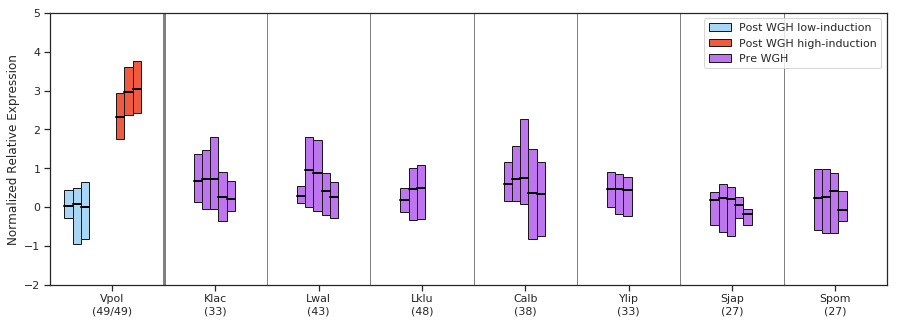

In [231]:
#Plot mean and variance of gene expression for each species 
#add text for total number of orthologs? 

fig_induction, ax_induction = plt.subplots(figsize=(15,5))
bw = 0.08
margin = 0.04
opacity = 0.8

spec_sets = {'Post WGH low' : ['Vpol'] , 
             'Post WGH high' : ['Vpol'] , 
             'Pre WGH' : spec_order_pre_WGH} 

colors = {'low': '#a8d6f4', 'high':'#ef5a40', 'Pre WGH': '#bd76ed'}
legend_label_dict = {'low': 'Post WGH low-induction', 
                 'high': 'Post WGH high-induction', 
                 'Pre WGH': 'Pre WGH'}
index = {'low':[],'high':[], 'Pre WGH':[]}
data_mean = {'low':[],'high':[], 'Pre WGH':[]}
data_std = {'low':[],'high':[], 'Pre WGH':[]}
data_N = {'low':{},
          'high':{}, 
          'Pre WGH':{}}
data = {'low':[],'high':[], 'Pre WGH':[]}
level_space = {'low':0.0, 'high':0.5}
label_order = []
label_ind = []

conds_pka_corr = ['DS/LOG', 'PS/LOG', 'PLAT/LOG','heat shock_030', 'heat shock_045']



all_conds = set(expression_data_df.columns)


#Post WGH Species
#assumes the same species sets are in both
jj = 0
spacer = bw/2 + margin
for spec in spec_sets['Post WGH high']: 
    for level in ['low','high']:
        data_N[level][spec]=np.inf 
    label_ind.append(jj+0.5)
    for kk, cond_base in enumerate(conds_pka_corr): 
        if spec + '_' + cond_base + '_high' in all_conds: 
            for level in ['low', 'high']:
                index[level].append(spacer + jj+bw*kk +level_space[level])
                column = expression_data_df[spec + '_' + cond_base + '_' + level]
                data[level].append(column[~column.isna()])
                #data_mean[level].append(column.mean())
                #data_std[level].append(column.std())
                N_spec_cond = sum(~(np.isnan(column)))
                N_spec_old = data_N[level][spec]
                data_N[level][spec] = min(N_spec_old, N_spec_cond)
    label_order.append(spec + '\n(' + str(data_N['low'][spec]) + '/' + str(data_N['high'][spec]) + ')')  
    jj = jj+1

#pre WGH Species
#assumes the same species sets are in both
for spec in spec_sets['Pre WGH']: 
    data_N['Pre WGH'][spec]=np.inf
    label_ind.append(jj+0.5)    
    for kk, cond_base in enumerate(conds_pka_corr): 
        if spec + '_' + cond_base in all_conds: 
            index['Pre WGH'].append(spacer + 0.25 + jj+bw*kk)
            column = expression_data_df[spec + '_' + cond_base]
            data['Pre WGH'].append(column[~column.isna()])
            #data_mean['Pre WGH'].append(column.mean())
            #data_std['Pre WGH'].append(column.std())
            N_spec_cond = sum(~(np.isnan(column)))
            N_spec_old = data_N['Pre WGH'][spec]
            data_N['Pre WGH'][spec] = min(N_spec_old, N_spec_cond)   
    label_order.append(spec + '\n(' + str(data_N['Pre WGH'][spec]) + ')')    
    jj = jj+1
    

legend_handles = []
legend_labels = []
for subset_name in ['low', 'high', 'Pre WGH']: 
    
    subset_data = data[subset_name]
    
    induction_bp = ax_induction.boxplot(subset_data, patch_artist=True, showfliers=False, 
                                          positions = index[subset_name], 
                                          widths = bw, 
                                          whis = 0.0
                                       )
    jj = 0
    for patch in induction_bp['boxes']:
        patch.set(facecolor=colors[subset_name])  
        if jj == 0: 
            legend_handles.append(patch)
        jj = jj+1
        
    plt.setp(induction_bp['medians'], color='black', linewidth=2.0)
    
    legend_labels.append(legend_label_dict[subset_name])
    
#     induction_plot = ax_induction.bar(index[subset_name],subset_data, bw,
#                  alpha=opacity,
#                  color=colors[subset_name],
#                  label=legend_labels[subset_name], 
#                  yerr = data_std[subset_name]) 
#                  #bottom = bottom)

ymax = 5.0
ymin = -2.0
ax_induction.vlines([len(spec_sets['Post WGH high'])], ymin = ymin, ymax = ymax, colors = 'gray',linewidth=3)
ax_induction.vlines(list(range(len(spec_sets['Post WGH high']) + len(spec_sets['Pre WGH'])))[1:], ymin=ymin, ymax = ymax, colors = 'gray', linewidth = 1)
ax_induction.set_xticklabels(label_order)
ax_induction.set_xlim(0, len(spec_sets['Post WGH high']) + len(spec_sets['Pre WGH']))
ax_induction.set_xticks(label_ind)
ax_induction.set_ylim(ymin,ymax)
ax_induction.set_xlim(-0.1, len(label_ind))
ax_induction.set_ylabel('Normalized Relative Expression')
ax_induction.legend(legend_handles, legend_labels )

#fig_induction.savefig(os.path.normpath('/home/heineike/scratch/induction_conservation_summary.svg'))

## Look from perspective of a number of specs


In [24]:
specs = ['Scer', 'Smik', 'Cgla', 'Ncas', 'Vpol']

83 differentially expressed genes identified


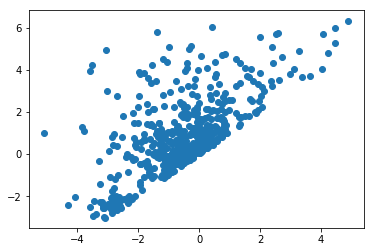

In [83]:
seed_spec = 'Scer'


#Identify DEstress genes
columns_to_combine = {'PS/LOG', 'PLAT/LOG', 'DS/LOG', 'heat shock_30', 'heat shock_45'}

#Pick differentially expressed paralogs (using average / individual conditions)
min_high_lfc = 1.8  # Minimum LFC for the high activation paralog
lfc_diff = 1.8 # Difference in LFC to call a differentially expressed paralog
max_low_lfc = 1.6 # Maximum LFC that low activation paralog can have.  I get a ~20 more if I use 2.5 as the cutoff

goi_criteria = {'min_high_lfc': min_high_lfc, 'lfc_diff': lfc_diff, 'max_low_lfc' : max_low_lfc}

ohnologs_goi, ohnologs_sorted, goi_criteria = io_library.de_stress_gois(seed_spec, columns_to_combine, goi_criteria)
    
plt.scatter(ohnologs_sorted['PKAest_low'], ohnologs_sorted['PKAest_high'])

#Save list and all sorted ohnolog dataframe as well
fname = data_processing_dir + os.path.normpath('kl_sc_PKA_as_m24_r1g1_20181017/gois_' + seed_spec + '_PKAest_20190123.pkl')

with open(fname, 'wb') as file:
    pickle.dump([ohnologs_goi,ohnologs_sorted,goi_criteria], file)
                                          

### Expression changes

In [92]:

#Map Regev data onto dataframe

# seed_spec = 'Ncas'
sort_columns = 'PKAest'

orth_dir_YGOB = os.path.normpath(data_processing_dir + 'ortholog_files_YGOB') + os.sep
orth_dir_regev = os.path.normpath(data_processing_dir + 'ortholog_files_regev') + os.sep

#YGOB is appropriate orth_dir for Vpol to Scer
orth_dir_dict = {'Vpol':orth_dir_YGOB, 'Ncas': orth_dir_regev, 'Scer':orth_dir_YGOB}


spec_order_post_WGH_dict = {'Vpol': ['Ncas','Cgla','Smik','Scer'],
                            'Ncas': ['Cgla', 'Smik','Scer', 'Vpol'], 
                            'Scer': ['Smik', 'Cgla', 'Ncas','Vpol']}

# removed Spar - not in pillars and very close to S.Cer, 
#Suva doesn't have much data, Sbay is a hybrid so a bit strange

spec_order_pre_WGH_dict = {'Vpol': ['Klac','Lwal','Lklu','Calb', 'Ylip','Sjap','Spom'], 
                           'Ncas': ['Klac','Lwal','Lklu','Calb', 'Ylip','Sjap','Spom'] , 
                           'Scer': ['Klac','Lwal','Lklu','Calb', 'Ylip','Sjap','Spom'] } 

#Order that we view the species (minus seed_spec)
spec_order_post_WGH = spec_order_post_WGH_dict[seed_spec] 
spec_order_pre_WGH = spec_order_pre_WGH_dict[seed_spec]   
#removed Dhan, something seems to be wrong with the indices.  

ohnologs_goi_array, spec_conditions = io_library.load_regev_data_gois(ohnologs_goi, sort_column, seed_spec, spec_order_post_WGH, spec_order_pre_WGH)

#Add SC_common_name_high, low and high_low columns to an ohnologs_file
#SC_common_name lookup function requires genename_low/high columns
for level in ['low', 'high']: 
    ohnologs_goi_array['genename_' + level] = ohnologs_goi_array[seed_spec + '_genename_' + level]



ohnologs_goi_array = io_library.SC_common_name_columns_ohnologs(ohnologs_goi_array, seed_spec, orth_dir_dict[seed_spec])

# ohnologs_goi.reset_index(inplace=True)
# ohnologs_goi.set_index('SC_common_name_high_low', inplace=True)


YER027C has NONE listed in ortholog file for Smik
YOL024W has NONE listed in ortholog file for Smik
YFR024C-A has NONE listed in ortholog file for Smik
YLR354C has NONE listed in ortholog file for Smik
YHR183W has NONE listed in ortholog file for Smik
YNL053W has NONE listed in ortholog file for Smik
YBR082C has NONE listed in ortholog file for Smik
YMR079W has NONE listed in ortholog file for Smik
YLR273C has NONE listed in ortholog file for Smik
YGL056C has NONE listed in ortholog file for Smik
YNR047W has NONE listed in ortholog file for Smik
YOL059W has NONE listed in ortholog file for Smik
YHR080C has NONE listed in ortholog file for Smik
YER081W has NONE listed in ortholog file for Smik
YLR080W has NONE listed in ortholog file for Smik
YHR016C has NONE listed in ortholog file for Smik
YPL200W has NONE listed in ortholog file for Smik
YLR356W has NONE listed in ortholog file for Smik
YDR018C has NONE listed in ortholog file for Smik
YDR059C has NONE listed in ortholog file for Smi

YHR108W not present in orthogroup file for Ncas
YFL048C not present in orthogroup file for Ncas
YOL024W not present in orthogroup file for Ncas
YLR371W not present in orthogroup file for Ncas
YLR293C not present in orthogroup file for Ncas
YIR037W not present in orthogroup file for Ncas
YOR375C not present in orthogroup file for Ncas
YER119C not present in orthogroup file for Ncas
YHR097C not present in orthogroup file for Ncas
YPL200W not present in orthogroup file for Ncas
YGR256W not present in orthogroup file for Ncas
YNL055C not present in orthogroup file for Ncas
YIL113W not present in orthogroup file for Ncas
YMR085W not present in orthogroup file for Ncas
YKL091C not present in orthogroup file for Ncas
YML087C not present in orthogroup file for Ncas
YPL230W not present in orthogroup file for Ncas
YOL131W not present in orthogroup file for Ncas
YNL093W not present in orthogroup file for Ncas
YDL021W not present in orthogroup file for Ncas
YHR092C has NONE listed in ortholog file

YBL101C has NONE listed in ortholog file for Ylip
YHR092C has NONE listed in ortholog file for Ylip
YHR094C has NONE listed in ortholog file for Ylip
YOL024W has NONE listed in ortholog file for Ylip
YGL075C has NONE listed in ortholog file for Ylip
YDR345C has NONE listed in ortholog file for Ylip
YKR013W has NONE listed in ortholog file for Ylip
YLR413W has NONE listed in ortholog file for Ylip
YOL086C has NONE listed in ortholog file for Ylip
YPL106C has NONE listed in ortholog file for Ylip
YML125C has NONE listed in ortholog file for Ylip
YMR182C has NONE listed in ortholog file for Ylip
YOR324C has NONE listed in ortholog file for Ylip
YNL309W has NONE listed in ortholog file for Ylip
YGL104C has NONE listed in ortholog file for Ylip
YOL036W has NONE listed in ortholog file for Ylip
YOR153W has NONE listed in ortholog file for Ylip
YDL138W has NONE listed in ortholog file for Ylip
YOL056W has NONE listed in ortholog file for Ylip
YLR099C has NONE listed in ortholog file for Ylip


In [93]:
#Go through each of my GOIs and replace lists with single value for each item. 
#This is mainly to combine any values for genes that had a small scale duplication. 

# spec_order_post_WGH = ['Spar','Sbay','Smik','Suva', 'Cgla', 'Ncas','Vpol']
# spec_order_pre_WGH = ['Klac','Lwal','Lklu','Dhan', 'Calb', 'Ylip','Sjap','Spom']

spec_sets = {'Post WGH low' : [seed_spec] + spec_order_post_WGH, 
             'Post WGH high' : [seed_spec] + spec_order_post_WGH, 
             'Pre WGH' : spec_order_pre_WGH} 

expression_data_df = io_library.regev_ohnolog_expression_data_SSD_combine(ohnologs_goi_array,  spec_sets, spec_conditions, combine_method = 'mean')


In [ ]:
# Could sort but I don't think it is necessary unless I'm showing a heatmap

In [94]:
#Plot All
#Plot mean and variance of gene expression for each species 
#add text for total number of orthologs? 

fig_induction, ax_induction = plt.subplots(figsize=(15,5))
bw = 0.08
margin = 0.04
opacity = 0.8

# spec_sets = {'Post WGH low' : ['Vpol'] , 
#              'Post WGH high' : ['Vpol'] , 
#              'Pre WGH' : spec_order_pre_WGH} 

colors = {'low': '#a8d6f4', 'high':'#ef5a40', 'Pre WGH': '#bd76ed'}
legend_label_dict = {'low': 'Post WGH low-induction', 
                 'high': 'Post WGH high-induction', 
                 'Pre WGH': 'Pre WGH'}
index = {'low':[],'high':[], 'Pre WGH':[]}
data_mean = {'low':[],'high':[], 'Pre WGH':[]}
data_std = {'low':[],'high':[], 'Pre WGH':[]}
data_N = {'low':{},
          'high':{}, 
          'Pre WGH':{}}
data = {'low':[],'high':[], 'Pre WGH':[]}
level_space = {'low':0.0, 'high':0.5}
label_order = []
label_ind = []

conds_pka_corr = ['DS/LOG', 'PS/LOG', 'PLAT/LOG','heat shock_030', 'heat shock_045']



all_conds = set(expression_data_df.columns)


#Post WGH Species
#assumes the same species sets are in both
jj = 0
spacer = bw/2 + margin
for spec in spec_sets['Post WGH high']: 
    for level in ['low','high']:
        data_N[level][spec]=np.inf 
    label_ind.append(jj+0.5)
    for kk, cond_base in enumerate(conds_pka_corr): 
        if spec + '_' + cond_base + '_high' in all_conds: 
            for level in ['low', 'high']:
                index[level].append(spacer + jj+bw*kk +level_space[level])
                column = expression_data_df[spec + '_' + cond_base + '_' + level]
                data[level].append(column[~column.isna()])
                #data_mean[level].append(column.mean())
                #data_std[level].append(column.std())
                N_spec_cond = sum(~(np.isnan(column)))
                N_spec_old = data_N[level][spec]
                data_N[level][spec] = min(N_spec_old, N_spec_cond)
    label_order.append(spec + '\n(' + str(data_N['low'][spec]) + '/' + str(data_N['high'][spec]) + ')')  
    jj = jj+1

#pre WGH Species
#assumes the same species sets are in both
for spec in spec_sets['Pre WGH']: 
    data_N['Pre WGH'][spec]=np.inf
    label_ind.append(jj+0.5)    
    for kk, cond_base in enumerate(conds_pka_corr): 
        if spec + '_' + cond_base in all_conds: 
            index['Pre WGH'].append(spacer + 0.25 + jj+bw*kk)
            column = expression_data_df[spec + '_' + cond_base]
            data['Pre WGH'].append(column[~column.isna()])
            #data_mean['Pre WGH'].append(column.mean())
            #data_std['Pre WGH'].append(column.std())
            N_spec_cond = sum(~(np.isnan(column)))
            N_spec_old = data_N['Pre WGH'][spec]
            data_N['Pre WGH'][spec] = min(N_spec_old, N_spec_cond)   
    label_order.append(spec + '\n(' + str(data_N['Pre WGH'][spec]) + ')')    
    jj = jj+1
    

legend_handles = []
legend_labels = []
for subset_name in ['low', 'high', 'Pre WGH']: 
    
    subset_data = data[subset_name]
    
    induction_bp = ax_induction.boxplot(subset_data, patch_artist=True, showfliers=False, 
                                          positions = index[subset_name], 
                                          widths = bw, 
                                          whis = 0.0
                                       )
    jj = 0
    for patch in induction_bp['boxes']:
        patch.set(facecolor=colors[subset_name])  
        if jj == 0: 
            legend_handles.append(patch)
        jj = jj+1
        
    plt.setp(induction_bp['medians'], color='black', linewidth=2.0)
    
    legend_labels.append(legend_label_dict[subset_name])
    
#     induction_plot = ax_induction.bar(index[subset_name],subset_data, bw,
#                  alpha=opacity,
#                  color=colors[subset_name],
#                  label=legend_labels[subset_name], 
#                  yerr = data_std[subset_name]) 
#                  #bottom = bottom)

ymax = 5.0
ymin = -2.0
ax_induction.vlines([len(spec_sets['Post WGH high'])], ymin = ymin, ymax = ymax, colors = 'gray',linewidth=3)
ax_induction.vlines(list(range(len(spec_sets['Post WGH high']) + len(spec_sets['Pre WGH'])))[1:], ymin=ymin, ymax = ymax, colors = 'gray', linewidth = 1)
ax_induction.set_xticklabels(label_order)
ax_induction.set_xlim(0, len(spec_sets['Post WGH high']) + len(spec_sets['Pre WGH']))
ax_induction.set_xticks(label_ind)
ax_induction.set_ylim(ymin,ymax)
ax_induction.set_xlim(-0.1, len(label_ind))
ax_induction.set_ylabel('Normalized Relative Expression')
ax_induction.legend(legend_handles, legend_labels )

fig_induction.savefig(os.path.normpath('C:/Users/BMH_work/Google Drive/UCSF/ElSamad_Lab/PKA/Manuscript/conservation_induction_' + seed_spec + '.svg'))

### Look at raw expression from a number of specs 

In [88]:
# given genes of interest load raw expression data 
# need to have ohnologs_goi loaded

# seed_spec = 'Scer'
sort_column = 'PKAest'


spec_order_post_WGH_dict = {'Ncas': ['Cgla', 'Smik','Spar','Scer'], 
                            'Scer': ['Spar','Smik', 'Cgla', 'Ncas']}

spec_order_pre_WGH_dict = {'Ncas': ['Klac','Lwal','Lklu','Calb', 'Ylip'], 
                           'Scer': ['Klac','Lwal','Lklu','Calb', 'Ylip']} 

spec_order_post_WGH =  spec_order_post_WGH_dict[seed_spec]
#Suva doesn't have much data, Sbay is a hybrid so a bit strange
spec_order_pre_WGH = spec_order_pre_WGH_dict[seed_spec]

#C.Gla mapping for Sec14 seems better with orthogroups than YGOB

ohnologs_goi_array = io_library.load_tsankov_data_gois(ohnologs_goi, sort_column, seed_spec, spec_order_post_WGH, spec_order_pre_WGH)

#Add SC_common_name_high, low and high_low columns to an ohnologs_file
#SC_common_name lookup function requires genename_low/high columns
for level in ['low', 'high']: 
    ohnologs_goi_array['genename_' + level] = ohnologs_goi_array[seed_spec + '_genename_' + level]
ohnologs_goi_array = io_library.SC_common_name_columns_ohnologs(ohnologs_goi_array, seed_spec, orth_dir_dict[seed_spec])


CAGL0D02640g has no entry in Tsankov dataset for Cgla. Ortholog of YHR092C
CAGL0D02640g has no entry in Tsankov dataset for Cgla. Ortholog of YHR094C
CAGL0D02640g has no entry in Tsankov dataset for Cgla. Ortholog of YGL104C
CAGL0D02640g has no entry in Tsankov dataset for Cgla. Ortholog of YDR342C
CAGL0D02640g has no entry in Tsankov dataset for Cgla. Ortholog of YHR096C
YHR108W is not in orthogroup index Ncas
YFL048C is not in orthogroup index Ncas
YOL024W is not in orthogroup index Ncas
YLR371W is not in orthogroup index Ncas
YLR293C is not in orthogroup index Ncas
YIR037W is not in orthogroup index Ncas
YOR375C is not in orthogroup index Ncas
YER119C is not in orthogroup index Ncas
YHR097C is not in orthogroup index Ncas
YPL200W is not in orthogroup index Ncas
YGR256W is not in orthogroup index Ncas
YNL055C is not in orthogroup index Ncas
YIL113W is not in orthogroup index Ncas
YMR085W is not in orthogroup index Ncas
YKL091C is not in orthogroup index Ncas
YML087C is not in orthogr

In [89]:
#Go through each of my GOIs and make a vector.
#If there are no orthologs, set the value to np.Nan
#If there is an unexpected duplicate gene set the value to the mean expression between the two

# spec_order_post_WGH = ['Spar','Smik','Sbay', 'Cgla', 'Ncas']
# spec_order_pre_WGH = ['Klac','Lwal','Lklu','Dhan', 'Calb', 'Ylip']

spec_sets = {'Post WGH low' : [seed_spec] + spec_order_post_WGH, 
             'Post WGH high' : [seed_spec] + spec_order_post_WGH, 
             'Pre WGH' : spec_order_pre_WGH} 

raw_expression_data_df = io_library.tsankov_ohnolog_expression_data_SSD_combine(ohnologs_goi_array, spec_sets, combine_method = 'mean')
  


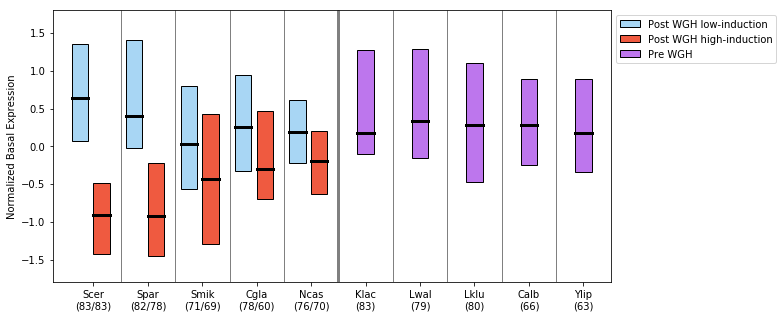

In [90]:
#Plot mean and variance of raw expressionfor each species 
#add text for total number of orthologs? 

fig_raw_exp_summary, ax_raw_exp_summary = plt.subplots(figsize=(10,5))
bw = 0.3
margin = 0.1
spacer = bw/2 + margin
opacity = 0.8

# spec_order_post_WGH = ['Spar','Smik','Sbay', 'Cgla', 'Ncas']
# spec_order_pre_WGH = ['Klac','Lwal','Lklu','Dhan', 'Calb', 'Ylip']

spec_sets = {'Post WGH low' : [seed_spec] + spec_order_post_WGH, 
             'Post WGH high' : [seed_spec] + spec_order_post_WGH, 
             'Pre WGH' : spec_order_pre_WGH} 

colors = {'low': '#a8d6f4', 'high':'#ef5a40', 'Pre WGH': '#bd76ed'}
legend_label_dict = {'low': 'Post WGH low-induction', 
                 'high': 'Post WGH high-induction', 
                 'Pre WGH': 'Pre WGH'}
index = {'low':[],'high':[], 'Pre WGH':[]}
# data_mean = {'low':[],'high':[], 'Pre WGH':[]}
# data_std = {'low':[],'high':[], 'Pre WGH':[]}
data_N = {'low':{},
          'high':{}, 
          'Pre WGH':{}}
data = {'low':[],'high':[], 'Pre WGH':[]}
level_space = {'low':0.0, 'high': 0.5-margin}
label_order = []
label_ind = []

#all_conds = set(expression_data_df_pka_corr.columns)


#Post WGH Species
#assumes the same species sets are in both
jj = 0
for spec in spec_sets['Post WGH high']: 
    for level in ['low','high']:
        data_N[level][spec]=np.inf 
    
    label_ind.append(jj+0.5)    
    
    for level in ['low', 'high']:
        index[level].append(spacer + jj + level_space[level])
        column = raw_expression_data_df[spec + '_' + level]
        data[level].append(column[~column.isna()])
        #data_mean[level].append(column.mean())
        #data_std[level].append(column.std())
        N_spec_cond = sum(~(np.isnan(column)))
        N_spec_old = data_N[level][spec]
        data_N[level][spec] = min(N_spec_old, N_spec_cond)
    
    label_order.append(spec + '\n(' + str(data_N['low'][spec]) + '/' + str(data_N['high'][spec]) + ')')    
    jj = jj+1

#pre WGH Species
for spec in spec_sets['Pre WGH']: 
    label_ind.append(jj+0.5)

             
    index['Pre WGH'].append(jj+spacer+0.25)
    column = raw_expression_data_df[spec]
    data['Pre WGH'].append(column[~column.isna()])
    #data_mean['Pre WGH'].append(column.mean())
    #data_std['Pre WGH'].append(column.std())
    data_N['Pre WGH'][spec] = sum(~(np.isnan(column)))
    label_order.append(spec + '\n(' + str(data_N['Pre WGH'][spec]) + ')') 
    jj = jj+1


legend_handles = []
legend_labels = []
for subset_name, subset_data in data.items(): 
    
    raw_exp_bp = ax_raw_exp_summary.boxplot(subset_data, patch_artist=True, showfliers=False, 
                                          positions = index[subset_name], 
                                          widths = bw, whis = 0.0)
    kk=0
    for patch in raw_exp_bp['boxes']:
        patch.set(facecolor=colors[subset_name])  
        if kk == 0: 
            legend_handles.append(patch)
        kk = kk+1
    
    plt.setp(raw_exp_bp['medians'], color='black', linewidth=3)
    
    legend_labels.append(legend_label_dict[subset_name])


ymax = 1.8
ymin = -1.8
ax_raw_exp_summary.vlines([len(spec_sets['Post WGH high'])], ymin = ymin, ymax = ymax, colors = 'gray',linewidth=3)
ax_raw_exp_summary.vlines(list(range(len(spec_sets['Post WGH high']) + len(spec_sets['Pre WGH'])))[1:], ymin=ymin, ymax = ymax, colors = 'gray', linewidth = 1)
ax_raw_exp_summary.set_xticklabels(label_order)
ax_raw_exp_summary.set_xticks(label_ind)
ax_raw_exp_summary.set_ylim(ymin,ymax)
ax_raw_exp_summary.set_xlim(-0.25, len(label_ind))
ax_raw_exp_summary.set_ylabel('Normalized Basal Expression')
ax_raw_exp_summary.legend(legend_handles, legend_labels, bbox_to_anchor = (1.0,1.0), loc='upper left' )

fig_raw_exp_summary.savefig(os.path.normpath('C:/Users/BMH_work/Google Drive/UCSF/ElSamad_Lab/PKA/Manuscript/conservation_raw_exp_' + seed_spec + '.svg'))